### **SCRAPPING DATA**

**Install Library Scraping untuk Google Play Store dan App Store**

In [ ]:
!pip install app-store-scraper
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requ

**Scraping Data Google Play Store**

In [ ]:
from google_play_scraper import reviews, Sort
import pandas as pd
import csv

# ID aplikasi Midi Kriing di Google Play Store
app_id = 'com.midi.kriing'

# Fungsi untuk mengambil ulasan dari Google Play Store
def get_reviews(app_id, lang='id', count=13000, sort=Sort.NEWEST):
    try:
        result, _ = reviews(
            app_id,
            lang=lang,              # Bahasa ulasan
            country='id',           # Kode negara
            sort=sort,              # Urutan ulasan
            count=count             # Jumlah ulasan yang diambil
        )
        return result
    except Exception as e:
        print("Error:", e)
        return []

# Ambil ulasan aplikasi
reviews_data = get_reviews(app_id, count=13000)

# Ekspor data ulasan ke file CSV
def export_to_csv(reviews, file_name='Ulasan_MIDI_PlayStore.csv'):
    if reviews:
        # Mendefinisikan nama kolom untuk file CSV
        fieldnames = ['Rating', 'Review Text', 'Date']

        # Membuat dan menyimpan file CSV
        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke {file_name}")
    else:
        print("Tidak ada data untuk disimpan.")

# Ekspor ulasan ke CSV
export_to_csv(reviews_data)

Data berhasil diekspor ke Ulasan_MIDI_PlayStore.csv


**Scraping Data App Store**

In [ ]:
from app_store_scraper import AppStore
import pandas as pd

# Inisialisasi aplikasi dengan ID aplikasi dan nama negara
app_id = '1561917110'  # ID aplikasi Midi Kriing di App Store
app = AppStore(country="id", app_name="midi-kriing", app_id=app_id)

# Fungsi untuk mengambil ulasan
def get_reviews(app, num_reviews=200):
    app.review(how_many=num_reviews)
    return app.reviews

# Ambil ulasan aplikasi
reviews = get_reviews(app, num_reviews=13000)  # Sesuaikan jumlah ulasan yang ingin diambil

# Fungsi untuk ekspor ulasan ke CSV
def export_to_csv(reviews, file_name='Ulasan_MIDI_AppStore.csv'):
    if reviews:
        # Konversi ulasan menjadi DataFrame dan sesuaikan kolomnya
        df = pd.DataFrame(reviews)
        df = df[['rating', 'review', 'date']]
        df.columns = ['Rating', 'Review Text', 'Date']
        # Simpan ke CSV
        df.to_csv(file_name, index=False, encoding='utf-8')
        print(f"Data berhasil diekspor ke {file_name}")
    else:
        print("Tidak ada data untuk disimpan.")

# Ekspor ulasan ke file CSV
export_to_csv(reviews)


ERROR:Base:Something went wrong: Expecting value: line 1 column 1 (char 0)


Tidak ada data untuk disimpan.


**Menggabungkan Ulasan Dari Google Play Store & App Store**

In [ ]:
import pandas as pd

# Baca file CSV hasil scraping dari Google Play Store
play_store_reviews = pd.read_csv('Ulasan_MIDI_PlayStore.csv')

# Baca file CSV hasil scraping dari App Store
app_store_reviews = pd.read_csv('Ulasan_MIDI_AppStore.csv')

# Tambahkan kolom baru 'Platform' untuk menunjukkan sumber ulasan
play_store_reviews['Platform'] = 'Google Play Store'
app_store_reviews['Platform'] = 'App Store'

# Gabungkan kedua DataFrame
all_reviews = pd.concat([play_store_reviews, app_store_reviews], ignore_index=True)

# Simpan hasil gabungan ke file CSV baru
all_reviews.to_csv('Ulasan_MIDI_All.csv', index=False, encoding='utf-8')
print("Data gabungan berhasil disimpan ke file 'Ulasan_MIDI_All.csv'")


FileNotFoundError: [Errno 2] No such file or directory: 'Ulasan_MIDI_AppStore.csv'

### **EDA Awal**

**Mengambil Dataset Yang Tersimpan di Drive**

In [ ]:
!pip install gdown
import gdown
# File ID dari Google Drive
file_id = '130mvuof8DIv96ei6z-IqaLGRHsZKlABL'

# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Dataset Ulasan Midi Kriing All.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=130mvuof8DIv96ei6z-IqaLGRHsZKlABL
To: /content/Dataset Ulasan Midi Kriing All.csv
100%|██████████| 697k/697k [00:00<00:00, 34.4MB/s]


'Dataset Ulasan Midi Kriing All.csv'

**Cek Jumlah Total Dataset Kotor**

In [ ]:
import pandas as pd

df = pd.read_csv('Dataset Ulasan Midi Kriing All.csv')

num_rows = len(df)
print(f"Jumlah total dataset: {num_rows}")

Jumlah total dataset: 7158


**Distribusi Data Berdasarkan Rating**

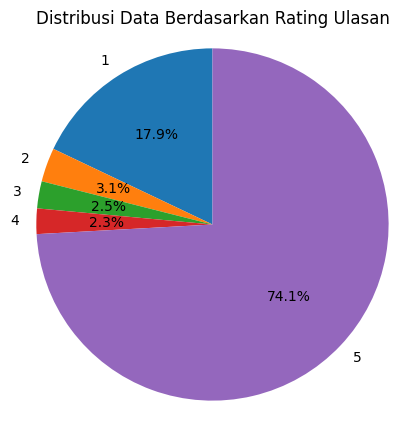

Jumlah Ulasan: 7158 Data


,count
Rating,
1,1284
2,223
3,178
4,167
5,5306


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of reviews for each rating
rating_counts = df['Rating'].value_counts().sort_index()


# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Data Berdasarkan Rating Ulasan')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print the rating counts
print("Jumlah Ulasan:", len(df), "Data")
rating_counts

**Distribusi Data Berdasarkan Platform**

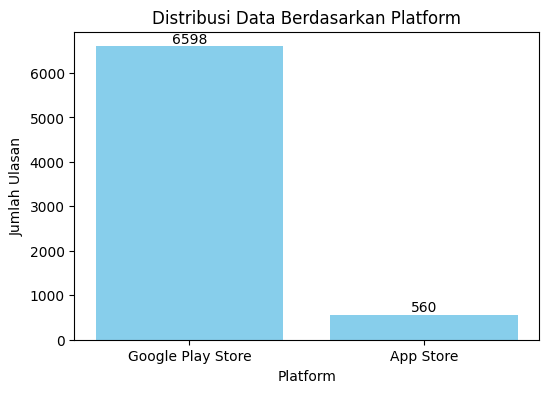

Jumlah Ulasan: 7158 Data


,count
Platform,
Google Play Store,6598
App Store,560


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of reviews for each platform
platform_counts = df['Platform'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(platform_counts.index, platform_counts.values, color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Data Berdasarkan Platform')

# Add value labels on top of the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: tengah batang
        bar.get_height(),                  # Y-coordinate: tinggi batang
        str(bar.get_height()),             # Teks label (jumlah data)
        ha='center', va='bottom',          # Align teks di tengah dan di atas batang
        fontsize=10                        # Ukuran font
    )

# Show the plot
plt.show()

# Print the platform counts
print("Jumlah Ulasan:", len(df), "Data")
platform_counts


**Wordcloud Sebelum Preprocessing Data**

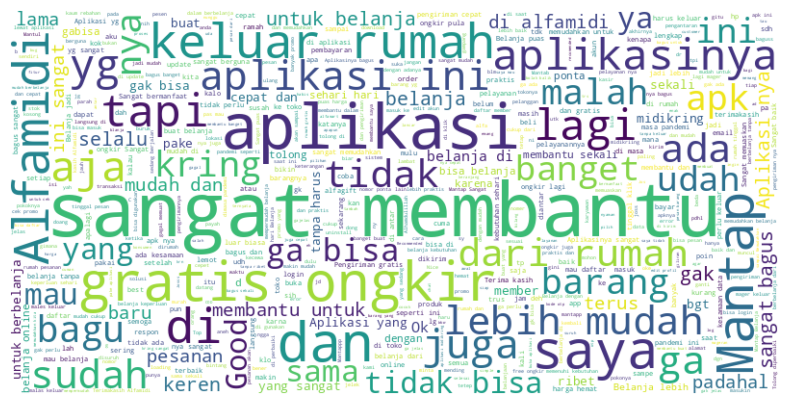

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

#menggabungkan tekx dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['midi', 'kriing', 'midi kriing'])

wc = WordCloud(background_color='white', max_words=2000, width=800, height=400, stopwords=stopwords)
wc.generate(text)

#membuat objek WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Frekuensi Kata**

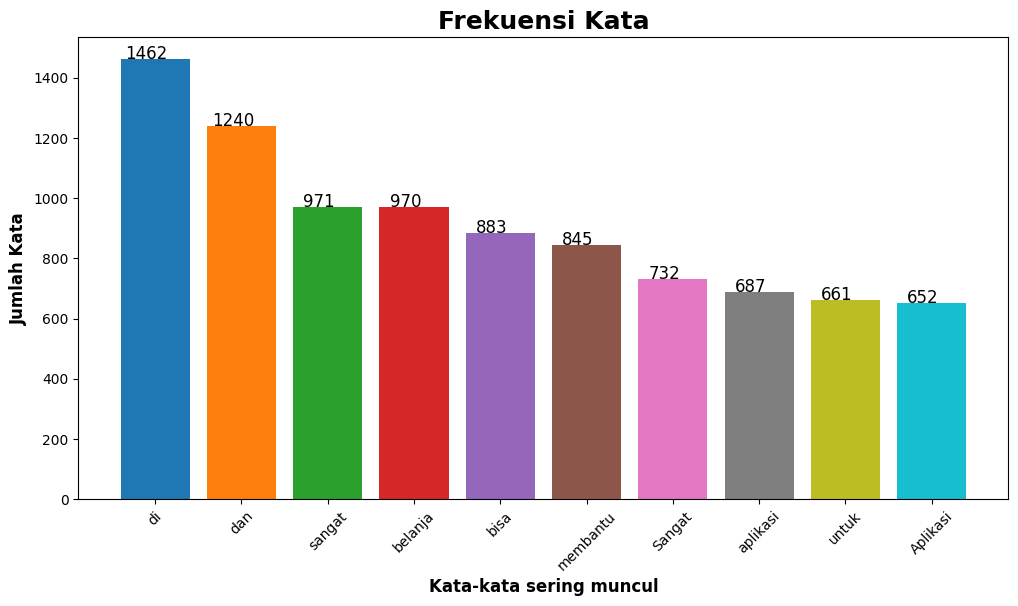

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

#definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata sering muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

### **DATA FILTERING**

**Membaca All Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('Dataset Ulasan Midi Kriing All.csv')
print("Jumlah Ulasan:", len(df), "Data")
print("")
df.head(10)

Jumlah Ulasan: 7158 Data



,Rating,Review Text,Date,Platform
0,1,PENIPUAN !!! Transaksi dibatalkan tapi uang ti...,11/6/2024,Google Play Store
1,5,Mantap,11/5/2024,Google Play Store
2,3,Kalau dah punya akun alfagift gak bisa download,11/5/2024,Google Play Store
3,5,Bingung,11/5/2024,Google Play Store
4,5,"Bagus aplikasinya, tapi sayang sekali di kabup...",11/4/2024,Google Play Store
5,1,saya tunggu barang saya ga di kirim saya chat ...,11/3/2024,Google Play Store
6,3,Tolong diperbaiki bug ketika memasukkan produk...,11/3/2024,Google Play Store
7,1,"sumpah mau daftar aja ribet bgt,ga kyk apk sbl...",11/3/2024,Google Play Store
8,1,Setelah di update bukannya tambah bagus malah ...,11/3/2024,Google Play Store
9,3,Payah lah di-update malah loading terus pas or...,11/2/2024,Google Play Store


**Mensamaratakan Teks**

In [ ]:
df['Review Text'] = df['Review Text'].str.lower()
print("Jumlah Ulasan:", len(df), "Data")

Jumlah Ulasan: 7158 Data


****

**Menghapus Baris Yang Hanya Berisi Emoticon Saja**

In [ ]:
# Kode Menghapus Row yang hanya menampilkan emoticon saja

import pandas as pd
import re

# Hapus baris yang hanya berisi emoticon
def remove_emoji_only_rows(df):
    # Regular expression to match only emojis (adjust if needed)
    emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # Emoticons wajah (smiley, gesture, dll.)
                           u"\U0001F300-\U0001F5FF"  # Simbol & piktograf (cuaca, transport, dll.)
                           u"\U0001F680-\U0001F6FF"  # Transport & simbol peta
                           u"\U0001F1E0-\U0001F1FF"  # Flags (bendera negara, regional)
                           u"\U00002600-\U000026FF"  # Simbol Miscellaneous (bintang, salib, dll.)
                           u"\U00002300-\U000023FF"  # Simbol lainnya (panah, tombol, dll.)
                           u"\U0001F900-\U0001F9FF"  # Ekspresi wajah tambahan (robot, tangan, dll.)
                           u"\U0001FA70-\U0001FAFF"  # Objek (perkakas, peralatan, dll.)
                           u"\U00002700-\U000027BF"  # Dingbats (simbol tambahan seperti tanda centang)
                           u"\U000024C2-\U0001F251"  # Simbol lainnya
                           u"\U0001F000-\U0001F02F"  # Kartu (Mahjong, dll.)
                           u"\U0001F0A0-\U0001F0FF"  # Kartu permainan
                           u"\U0001F300-\U0001F5FA"  # Lanskap, objek
                           u"\U0001F680-\U0001F6C5"  # Transportasi
                           u"\U0001F700-\U0001F773"  # Simbol sains
                           u"\u2764"                 # Hati merah polos (❤)
                           u"\u2708-\u270F"          # Simbol alat tulis
                           u"\U0001F48C-\U0001F48F"  # Hati dan cinta
                           "]+", flags=re.UNICODE)

    # Apply the function to filter rows
    df_filtered = df[~df['Review Text'].astype(str).apply(lambda x: bool(emoji_pattern.fullmatch(x)))]
    return df_filtered


df = remove_emoji_only_rows(df)
print("Jumlah Ulasan setelah menghapus baris yang hanya berisi emoticon:", len(df), "Data")
print("")
df.head(10)

Jumlah Ulasan setelah menghapus baris yang hanya berisi emoticon: 7017 Data



,Rating,Review Text,Date,Platform
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,11/6/2024,Google Play Store
1,5,mantap,11/5/2024,Google Play Store
2,3,kalau dah punya akun alfagift gak bisa download,11/5/2024,Google Play Store
3,5,bingung,11/5/2024,Google Play Store
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",11/4/2024,Google Play Store
5,1,saya tunggu barang saya ga di kirim saya chat ...,11/3/2024,Google Play Store
6,3,tolong diperbaiki bug ketika memasukkan produk...,11/3/2024,Google Play Store
7,1,"sumpah mau daftar aja ribet bgt,ga kyk apk sbl...",11/3/2024,Google Play Store
8,1,setelah di update bukannya tambah bagus malah ...,11/3/2024,Google Play Store
9,3,payah lah di-update malah loading terus pas or...,11/2/2024,Google Play Store


**Menghapus Baris Data Yang Duplikat**

In [ ]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)
print("Jumlah Ulasan:", len(df), "Data")
print("")
df.head(10)

Jumlah Ulasan: 5870 Data



,Rating,Review Text,Date,Platform
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,11/6/2024,Google Play Store
1,5,mantap,11/5/2024,Google Play Store
2,3,kalau dah punya akun alfagift gak bisa download,11/5/2024,Google Play Store
3,5,bingung,11/5/2024,Google Play Store
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",11/4/2024,Google Play Store
5,1,saya tunggu barang saya ga di kirim saya chat ...,11/3/2024,Google Play Store
6,3,tolong diperbaiki bug ketika memasukkan produk...,11/3/2024,Google Play Store
7,1,"sumpah mau daftar aja ribet bgt,ga kyk apk sbl...",11/3/2024,Google Play Store
8,1,setelah di update bukannya tambah bagus malah ...,11/3/2024,Google Play Store
9,3,payah lah di-update malah loading terus pas or...,11/2/2024,Google Play Store


**Menghapus Emoticon Soalnya Masih Ada Yang Tersisa**

In [ ]:
# prompt: hapus emoticon yang ada dalam ulasan, tanpa menghapus ulasannya

import re

# Hapus baris yang hanya berisi emoticon
def remove_emoji_only_rows(df):
    # Regular expression to match only emojis (adjust if needed)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)

    def remove_emojis(text):
        return emoji_pattern.sub(r'', text)

    df['Review Text'] = df['Review Text'].astype(str).apply(remove_emojis)
    # Remove rows where the 'Review Text' column is empty after emoji removal
    df = df[df['Review Text'].astype(str).str.strip() != ""]
    return df

df = remove_emoji_only_rows(df)
print("Jumlah Ulasan setelah menghapus baris yang hanya berisi emoticon:", len(df), "Data")
print("")
df.head(10)

Jumlah Ulasan setelah menghapus baris yang hanya berisi emoticon: 5869 Data



,Rating,Review Text,Date,Platform
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,11/6/2024,Google Play Store
1,5,mantap,11/5/2024,Google Play Store
2,3,kalau dah punya akun alfagift gak bisa download,11/5/2024,Google Play Store
3,5,bingung,11/5/2024,Google Play Store
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",11/4/2024,Google Play Store
5,1,saya tunggu barang saya ga di kirim saya chat ...,11/3/2024,Google Play Store
6,3,tolong diperbaiki bug ketika memasukkan produk...,11/3/2024,Google Play Store
7,1,"sumpah mau daftar aja ribet bgt,ga kyk apk sbl...",11/3/2024,Google Play Store
8,1,setelah di update bukannya tambah bagus malah ...,11/3/2024,Google Play Store
9,3,payah lah di-update malah loading terus pas or...,11/2/2024,Google Play Store


**Menghapus Duplikasi Data Lagi**

In [ ]:
# prompt: hapus duplikat data

# Menghapus Baris Data Yang Duplikat
df.drop_duplicates(subset="Review Text", keep='first', inplace=True)
print("Jumlah Ulasan setelah menghapus duplikat:", len(df), "Data")
print("")
df.head(10)

Jumlah Ulasan setelah menghapus duplikat: 5777 Data



<ipython-input-24-915918d0e260>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset="Review Text", keep='first', inplace=True)


,Rating,Review Text,Date,Platform
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,11/6/2024,Google Play Store
1,5,mantap,11/5/2024,Google Play Store
2,3,kalau dah punya akun alfagift gak bisa download,11/5/2024,Google Play Store
3,5,bingung,11/5/2024,Google Play Store
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",11/4/2024,Google Play Store
5,1,saya tunggu barang saya ga di kirim saya chat ...,11/3/2024,Google Play Store
6,3,tolong diperbaiki bug ketika memasukkan produk...,11/3/2024,Google Play Store
7,1,"sumpah mau daftar aja ribet bgt,ga kyk apk sbl...",11/3/2024,Google Play Store
8,1,setelah di update bukannya tambah bagus malah ...,11/3/2024,Google Play Store
9,3,payah lah di-update malah loading terus pas or...,11/2/2024,Google Play Store


**Menghapus Spasi Berlebihan dan Tanda Titik Lebih Dari 1**

In [ ]:
# prompt: bersihkan ulasan seperti spasi lebih dan tanda titik lebh dari 1

import re

def clean_reviews(text):
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  # Remove multiple dots
  text = re.sub(r'\.+', '.', text)
  return text

df['Review Text'] = df['Review Text'].astype(str).apply(clean_reviews)

**Menghapus Duplikasi Data Lagi**

In [ ]:
# prompt: hapus duplikat data sekarang dan jumlah data sekarang

# Menghapus Baris Data Yang Duplikat
df.drop_duplicates(subset="Review Text", keep='first', inplace=True)
print("Jumlah Ulasan setelah menghapus duplikat:", len(df), "Data")
print("")
df.head(10)

Jumlah Ulasan setelah menghapus duplikat: 5726 Data



,Rating,Review Text,Date,Platform
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,11/6/2024,Google Play Store
1,5,mantap,11/5/2024,Google Play Store
2,3,kalau dah punya akun alfagift gak bisa download,11/5/2024,Google Play Store
3,5,bingung,11/5/2024,Google Play Store
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",11/4/2024,Google Play Store
5,1,saya tunggu barang saya ga di kirim saya chat ...,11/3/2024,Google Play Store
6,3,tolong diperbaiki bug ketika memasukkan produk...,11/3/2024,Google Play Store
7,1,"sumpah mau daftar aja ribet bgt,ga kyk apk sbl...",11/3/2024,Google Play Store
8,1,setelah di update bukannya tambah bagus malah ...,11/3/2024,Google Play Store
9,3,payah lah di-update malah loading terus pas or...,11/2/2024,Google Play Store


**Menyimpan Data Final Dalam Bentuk File CSV**

In [ ]:
# Simpan dataset setelah dibersihkan ke file CSV
df.to_csv('/content/Ulasan Midi Kriing Setelah Filtering.csv', encoding='utf-8-sig', index=False)

# Verifikasi bahwa file telah disimpan
print("File berhasil disimpan di /content/Ulasan Midi Kriing Setelah Filtering.csv")

File berhasil disimpan di /content/Ulasan Midi Kriing Setelah Filtering.csv


### **INPUT DATA HASIL PELABELAN**

**Mengambil Data Ulasan Yang Sudah Dilabeli Secara Manual di Drive**

In [ ]:
!pip install gdown
import gdown
# File ID dari Google Drive
file_id = '1_WfSl2nhutPdtvonstOg3cMytN9ER3vc'

# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Ulasan Midi Kriing Setelah di Labeli.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_WfSl2nhutPdtvonstOg3cMytN9ER3vc
To: /content/Ulasan Midi Kriing Setelah di Labeli.csv
100%|██████████| 954k/954k [00:00<00:00, 93.2MB/s]


'Ulasan Midi Kriing Setelah di Labeli.csv'

**Menampilkan Dataset Ulasan Yang Telah Dilabeli**

In [ ]:
import pandas as pd

df = pd.read_csv('Ulasan Midi Kriing Setelah di Labeli.csv')
print("Jumlah Ulasan setelah menghapus duplikat:", len(df), "Data")
df.head()

Jumlah Ulasan setelah menghapus duplikat: 5724 Data


,No Ulasan,Rating,Review Text,Produk 1,Layanan 1,Fungsional Aplikasi 1,Produk 2,Layanan 2,Fungsional Aplikasi 2,Produk 3,Layanan 3,Fungsional Aplikasi 3
0,1,1,penipuan !!! transaksi dibatalkan tapi uang ti...,Tidak Ada,Negatif,Negatif,Tidak Ada,Negatif,Tidak Ada,Tidak Ada,Negatif,Negatif
1,2,5,mantap,Positif,Positif,Positif,Positif,Positif,Positif,Positif,Positif,Positif
2,3,3,kalau dah punya akun alfagift gak bisa download,Tidak Ada,Tidak Ada,Negatif,Tidak Ada,Tidak Ada,Negatif,Tidak Ada,Tidak Ada,Negatif
3,4,5,bingung,Negatif,Negatif,Negatif,Tidak Ada,Tidak Ada,Negatif,Tidak Ada,Tidak Ada,Negatif
4,5,5,"bagus aplikasinya, tapi sayang sekali di kabup...",Tidak Ada,Negatif,Positif,Tidak Ada,Negatif,Positif,Tidak Ada,Negatif,Negatif


**Grafik Perbandingan Pelabelan Sentimen Oleh 3 Pelabel Pada "Aspek Produk"**

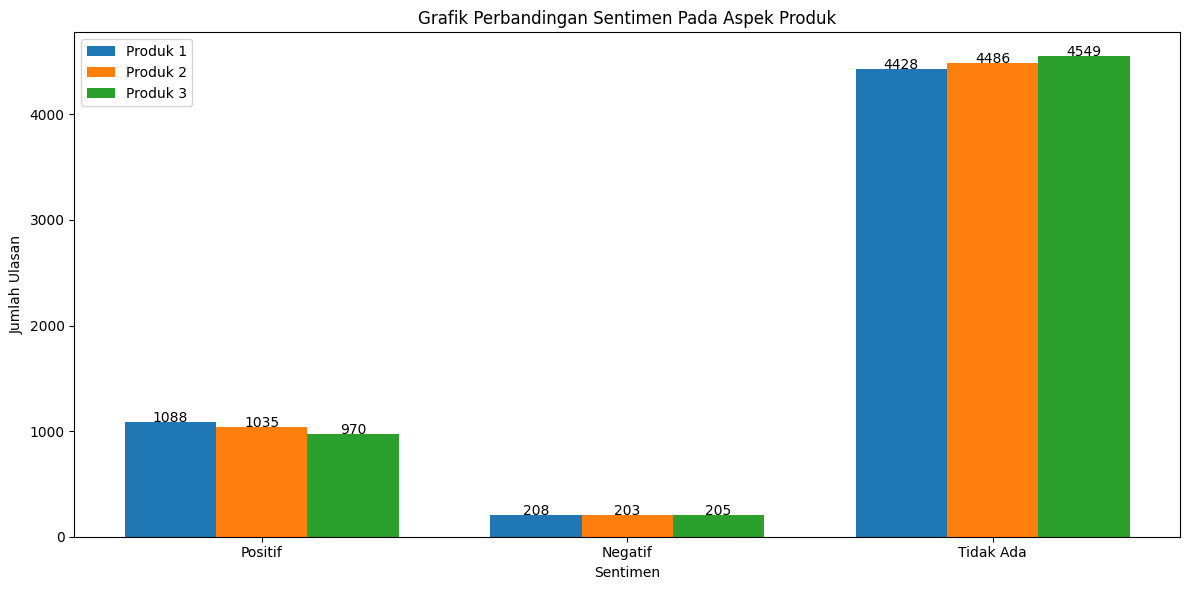

In [ ]:
# prompt: ubah grafik diatas, urut dari kiri ke kanan mulai dari sentimen positif, negatif dan tidak ada

import matplotlib.pyplot as plt
import pandas as pd

# Load the labeled data
df = pd.read_csv('Ulasan Midi Kriing Setelah di Labeli.csv')

# Count occurrences of each sentiment in the 'Produk 1', 'Produk 2', and 'Produk 3' columns
sentiments = ['Positif', 'Negatif', 'Tidak Ada']
product_counts = {}
for col in ['Produk 1', 'Produk 2', 'Produk 3']:
    product_counts[col] = df[col].value_counts().reindex(sentiments, fill_value=0)

# Create the bar chart
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = range(len(sentiments))

for i, col in enumerate(['Produk 1', 'Produk 2', 'Produk 3']):
    plt.bar([x + i * bar_width for x in index], product_counts[col], width=bar_width, label=col)

plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Grafik Perbandingan Sentimen Pada Aspek Produk')
plt.xticks([x + bar_width for x in index], sentiments) # Use sentiments list for xticks
plt.legend()

# Add labels on top of each bar
for col in ['Produk 1', 'Produk 2', 'Produk 3']:
    for i, count in enumerate(product_counts[col]):
        plt.text(i + (list(['Produk 1', 'Produk 2', 'Produk 3']).index(col) * bar_width), count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()

**Grafik Perbandingan Pelabelan Sentimen Oleh 3 Pelabel Pada "Aspek Layanan"**

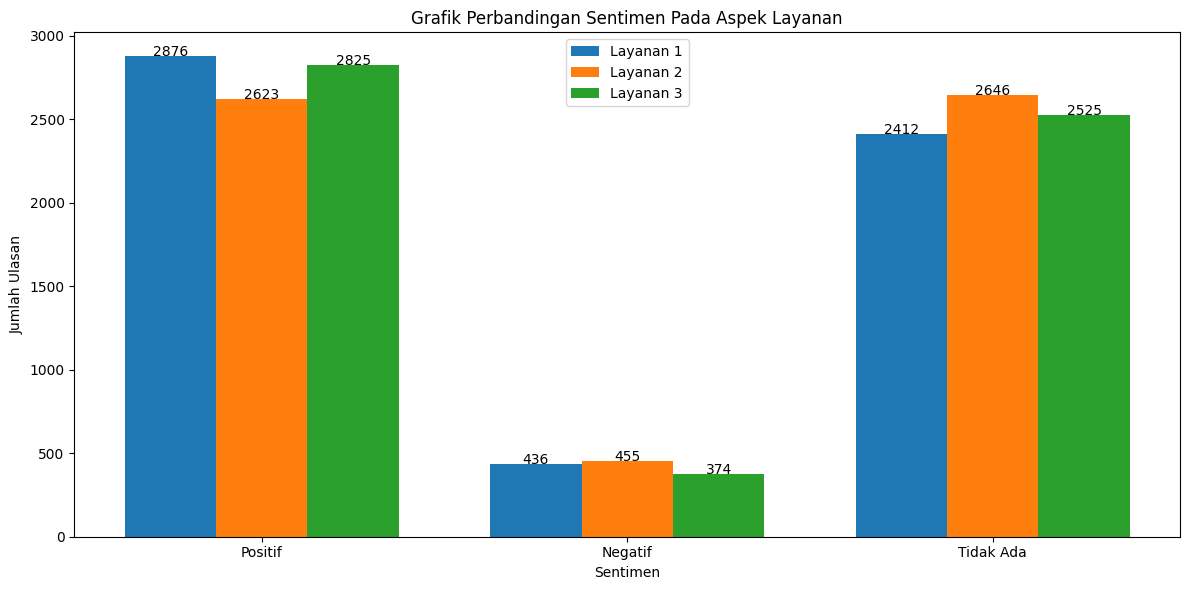

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the labeled data
df = pd.read_csv('Ulasan Midi Kriing Setelah di Labeli.csv')

# Count occurrences of each sentiment in the 'Layanan 1', 'Layanan 2', and 'Layanan 3' columns
sentiments = ['Positif', 'Negatif', 'Tidak Ada']
service_counts = {}
for col in ['Layanan 1', 'Layanan 2', 'Layanan 3']:
    service_counts[col] = df[col].value_counts().reindex(sentiments, fill_value=0)

# Create the bar chart
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = range(len(sentiments))

for i, col in enumerate(['Layanan 1', 'Layanan 2', 'Layanan 3']):
    plt.bar([x + i * bar_width for x in index], service_counts[col], width=bar_width, label=col)

plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Grafik Perbandingan Sentimen Pada Aspek Layanan')
plt.xticks([x + bar_width for x in index], sentiments)  # Use sentiments list for xticks
plt.legend()

# Add labels on top of each bar
for col in ['Layanan 1', 'Layanan 2', 'Layanan 3']:
    for i, count in enumerate(service_counts[col]):
        plt.text(i + (list(['Layanan 1', 'Layanan 2', 'Layanan 3']).index(col) * bar_width), count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()


**Grafik Perbandingan Pelabelan Sentimen Oleh 3 Pelabel Pada "Aspek Fungsional Aplikasi"**

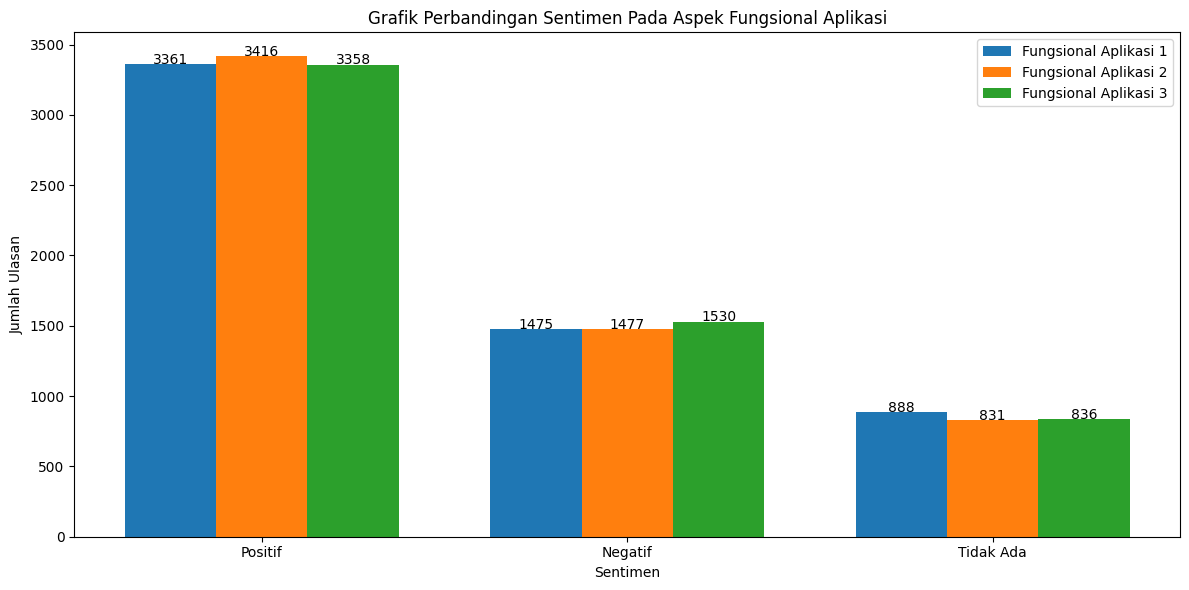

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the labeled data
df = pd.read_csv('Ulasan Midi Kriing Setelah di Labeli.csv')

# Count occurrences of each sentiment in the 'Fungsional Aplikasi 1', 'Fungsional Aplikasi 2', and 'Fungsional Aplikasi 3' columns
sentiments = ['Positif', 'Negatif', 'Tidak Ada']
functional_counts = {}
for col in ['Fungsional Aplikasi 1', 'Fungsional Aplikasi 2', 'Fungsional Aplikasi 3']:
    functional_counts[col] = df[col].value_counts().reindex(sentiments, fill_value=0)

# Create the bar chart
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = range(len(sentiments))

for i, col in enumerate(['Fungsional Aplikasi 1', 'Fungsional Aplikasi 2', 'Fungsional Aplikasi 3']):
    plt.bar([x + i * bar_width for x in index], functional_counts[col], width=bar_width, label=col)

plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Grafik Perbandingan Sentimen Pada Aspek Fungsional Aplikasi')
plt.xticks([x + bar_width for x in index], sentiments)  # Use sentiments list for xticks
plt.legend()

# Add labels on top of each bar
for col in ['Fungsional Aplikasi 1', 'Fungsional Aplikasi 2', 'Fungsional Aplikasi 3']:
    for i, count in enumerate(functional_counts[col]):
        plt.text(i + (list(['Fungsional Aplikasi 1', 'Fungsional Aplikasi 2', 'Fungsional Aplikasi 3']).index(col) * bar_width), count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()


### **FLEISS KAPPA**

**Mengukur Nilai Kesepakatan Antar Pelabel Menggunakan Metode Fleiss Kappa**

In [ ]:
import pandas as pd
from tabulate import tabulate

def fleiss_kappa(data):
    N = len(data)  # Jumlah item
    k = len(data.columns)  # Jumlah penilai
    n = data.nunique().max()  # Jumlah kategori

    # Menghitung P_j (proporsi setiap kategori)
    P_j = [0] * n
    for i in range(N):
        for j in range(n):
            P_j[j] += data.iloc[i, :].value_counts().get(j, 0)
    P_j = [x / (N * k) for x in P_j]

    # Menghitung Pi (kesepakatan untuk setiap item)
    Pi = 0
    for i in range(N):
        sum_nij = sum([data.iloc[i, :].value_counts().get(j, 0)**2 for j in range(n)])
        Pi += (sum_nij - k) / (k * (k - 1))

    P_bar = Pi / N

    # Menghitung Fleiss' Kappa
    kappa = (P_bar - sum([x**2 for x in P_j])) / (1 - sum([x**2 for x in P_j]))

    return kappa

def interpret_kappa(kappa):
    if kappa < 0:
        return "Tidak ada kesepakatan"
    elif 0 <= kappa < 0.20:
        return "Kesepakatan sangat lemah"
    elif 0.20 <= kappa < 0.40:
        return "Kesepakatan lemah"
    elif 0.40 <= kappa < 0.60:
        return "Kesepakatan moderat"
    elif 0.60 <= kappa < 0.80:
        return "Kesepakatan substansial"
    elif 0.80 <= kappa <= 1:
        return "Kesepakatan hampir sempurna"

def calculate_fleiss_kappa_for_aspect(df, columns, label_mapping):
    # Mengambil data untuk aspek tertentu dan memetakan label ke angka
    rater_data = df[columns].copy()
    rater_data = rater_data.applymap(lambda x: label_mapping.get(x, x))

    # Menghitung Fleiss' Kappa dan interpretasi
    kappa = fleiss_kappa(rater_data)
    interpretation = interpret_kappa(kappa)

    return kappa, interpretation

def display_kappa_results(kappas, interpretations):
    """Menampilkan hasil Fleiss' Kappa dan interpretasinya dalam tabel."""
    # Membuat DataFrame untuk hasil Fleiss' Kappa dan interpretasi
    data = {
        "Aspek": ['Produk', 'Layanan', 'Fungsional Aplikasi'],
        "Nilai Kappa": [f"{kappa:.2f}" for kappa in kappas],
        "Interpretasi": interpretations
    }

    df = pd.DataFrame(data)

    # Menampilkan tabel dengan tabulate yang lebih rapi
    print("\nHasil Fleiss' Kappa per Aspek:")
    print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Contoh penggunaan (ganti dengan nilai kappa asli dan interpretasi)
df = pd.read_csv('Ulasan Midi Kriing Setelah di Labeli.csv')
label_mapping = {'Positif': 0, 'Negatif': 1, 'Tidak Ada': 2}

produk_columns = ['Produk 1', 'Produk 2', 'Produk 3']
kappa_produk, interpretation_produk = calculate_fleiss_kappa_for_aspect(df, produk_columns, label_mapping)

layanan_columns = ['Layanan 1', 'Layanan 2', 'Layanan 3']
kappa_layanan, interpretation_layanan = calculate_fleiss_kappa_for_aspect(df, layanan_columns, label_mapping)

aplikasi_columns = ['Fungsional Aplikasi 1', 'Fungsional Aplikasi 2', 'Fungsional Aplikasi 3']
kappa_aplikasi, interpretation_aplikasi = calculate_fleiss_kappa_for_aspect(df, aplikasi_columns, label_mapping)

# Menampilkan hasil Fleiss' Kappa per aspek dalam bentuk tabel
kappas = [kappa_produk, kappa_layanan, kappa_aplikasi]
interpretations = [interpretation_produk, interpretation_layanan, interpretation_aplikasi]
display_kappa_results(kappas, interpretations)


<ipython-input-23-8c033ec284df>:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rater_data = rater_data.applymap(lambda x: label_mapping.get(x, x))
<ipython-input-23-8c033ec284df>:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rater_data = rater_data.applymap(lambda x: label_mapping.get(x, x))
<ipython-input-23-8c033ec284df>:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rater_data = rater_data.applymap(lambda x: label_mapping.get(x, x))



Hasil Fleiss' Kappa per Aspek:
╒═════════════════════╤═══════════════╤═════════════════════════════╕
│ Aspek               │   Nilai Kappa │ Interpretasi                │
╞═════════════════════╪═══════════════╪═════════════════════════════╡
│ Produk              │          0.79 │ Kesepakatan substansial     │
├─────────────────────┼───────────────┼─────────────────────────────┤
│ Layanan             │          0.8  │ Kesepakatan substansial     │
├─────────────────────┼───────────────┼─────────────────────────────┤
│ Fungsional Aplikasi │          0.88 │ Kesepakatan hampir sempurna │
╘═════════════════════╧═══════════════╧═════════════════════════════╛


### **INPUT PELABELAN FINAL**

**Ambil Dataset Yang Telah Dilabeli Dari Drive**

In [ ]:
!pip install gdown
import gdown
# File ID dari Google Drive
file_id = '1e2SEfy91xlvHg0PTPOWoGORx_MM8tMX1'

# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Ulasan Pelabelan Final.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e2SEfy91xlvHg0PTPOWoGORx_MM8tMX1
To: /content/Ulasan Pelabelan Final.csv
100%|██████████| 620k/620k [00:00<00:00, 89.6MB/s]


'Ulasan Pelabelan Final.csv'

**Akses Dataset Ulasan Yang Sudah Dilabeli**

In [ ]:
import pandas as pd

df = pd.read_csv('Ulasan Pelabelan Final.csv')
print("Jumlah Ulasan:", len(df), "Data")
df.head()

Jumlah Ulasan: 5724 Data


,Rating,Review Text,Produk,Layanan,Fungsional Aplikasi
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,Tidak Ada,Negatif,Negatif
1,5,mantap,Positif,Positif,Positif
2,3,kalau dah punya akun alfagift gak bisa download,Tidak Ada,Tidak Ada,Negatif
3,5,bingung,Tidak Ada,Tidak Ada,Negatif
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",Tidak Ada,Negatif,Positif


In [ ]:
# prompt: jumlah data ulasan

df = pd.read_csv('Ulasan Pelabelan Final.csv')
print("Jumlah data ulasan:", len(df))


Jumlah data ulasan: 5724


**Distribusi Sentimen Pada Masing" Aspek**

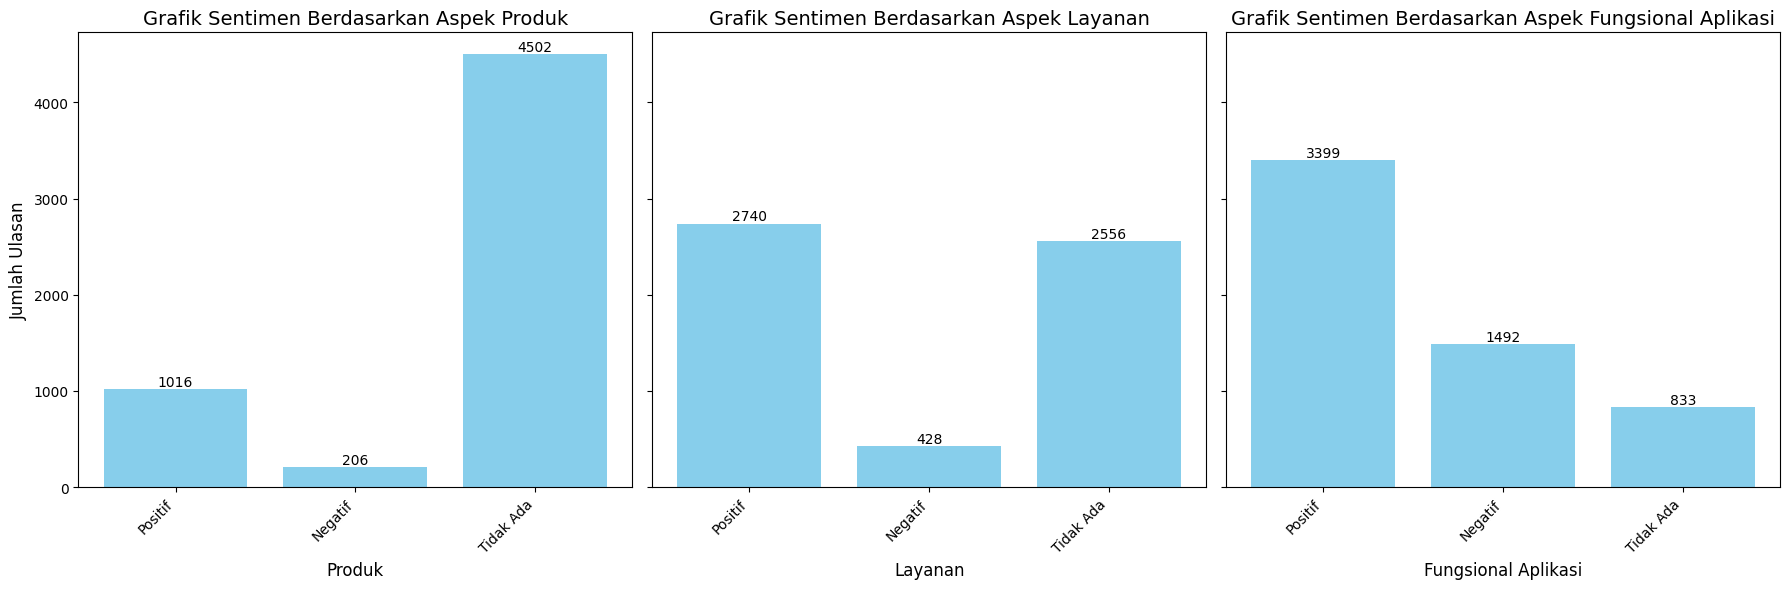

In [ ]:
import matplotlib.pyplot as plt

# Asumsikan DataFrame `df` sudah terdefinisi dan memiliki kolom `Produk`, `Layanan`, dan `Fungsional Aplikasi`
columns = ['Produk', 'Layanan', 'Fungsional Aplikasi']

# Kategori sentimen yang diinginkan dalam urutan tertentu
categories = ['Positif', 'Negatif', 'Tidak Ada']

# Membuat figure dengan subplot untuk setiap kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, column in enumerate(columns):
    if column in df.columns:
        # Hitung distribusi nilai dalam kolom
        value_counts = df[column].value_counts()

        # Pastikan kategori diurutkan sesuai dengan urutan `categories`
        value_counts = value_counts.reindex(categories, fill_value=0)

        # Plot batang
        bars = axes[idx].bar(value_counts.index, value_counts.values, color='skyblue')
        axes[idx].set_xlabel(column, fontsize=12)
        axes[idx].set_title(f"Grafik Sentimen Berdasarkan Aspek {column}", fontsize=14)
        axes[idx].set_xticks(range(len(value_counts.index)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha="right")

        # Tambahkan label nilai di atas batang
        for bar in bars:
            yval = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                           ha='center', va='bottom', fontsize=10)
    else:
        axes[idx].set_title(f"Kolom {column} tidak ditemukan", fontsize=14)

# Tambahkan label sumbu Y yang sama untuk semua subplot
axes[0].set_ylabel("Jumlah Ulasan", fontsize=12)

plt.tight_layout()  # Menyesuaikan tata letak
plt.show()









































### **DATA PREPROCESSING**

**Data Cleaning**

In [ ]:
import pandas as pd
import re

# Load the cleaned reviews dataset
df = pd.read_csv('/content/Ulasan Pelabelan Final.csv')

# Fungsi untuk menghapus emoticon
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Fungsi untuk menghapus tanda baca (.,;!?)
def remove_punctuation(text):
    punctuation_pattern = re.compile(r'[.,;!?]')
    return punctuation_pattern.sub(r'', text)

# Fungsi untuk menghapus tanda kurung ()[]{} dan angka 0-9
def remove_brackets_and_numbers(text):
    brackets_numbers_pattern = re.compile(r'[\(\)\[\]\{\}0-9]')
    return brackets_numbers_pattern.sub(r'', text)

# Fungsi untuk menghapus petik
def remove_double_quotes(text):
    return text.replace('"', '')

# Fungsi untuk menghapus karakter tambahan seperti - ' ² * dan lainnya
def remove_special_characters(text):
    special_chars_pattern = re.compile(r"[-'²*#:+/“”–_…½~¡¡¡⁰⁰`><…‘’&]")
    return special_chars_pattern.sub(r'', text)

# Simpan salinan kolom 'Review Text' sebelum pembersihan untuk perbandingan
df['Review Text'] = df['Review Text']

# Terapkan fungsi pembersihan secara berurutan pada kolom 'Review Text'
df['Cleaning Text'] = (
    df['Review Text']
    .astype(str)
    .apply(remove_emojis)
    .apply(remove_punctuation)
    .apply(remove_brackets_and_numbers)
    .apply(remove_double_quotes)
    .apply(remove_special_characters)  # Hapus karakter tambahan
)

# Simpan hasil data cleaning ke file CSV baru
df.to_csv('/content/Output_Cleaning.csv', index=False)

# Menampilkan beberapa contoh ulasan sebelum dan setelah pembersihan
df[['Review Text', 'Cleaning Text']].head()


,Review Text,Cleaning Text
0,penipuan !!! transaksi dibatalkan tapi uang ti...,penipuan transaksi dibatalkan tapi uang tidak...
1,mantap,mantap
2,kalau dah punya akun alfagift gak bisa download,kalau dah punya akun alfagift gak bisa download
3,bingung,bingung
4,"bagus aplikasinya, tapi sayang sekali di kabup...",bagus aplikasinya tapi sayang sekali di kabupa...


**Normalisasi**

In [ ]:
import gdown
import pandas as pd

# File ID dari Google Drive
file_id = '1r-uJx9ZosLLj5EL4gspr53yUai-jpKJ0'
# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Kamus Normalisasi.csv'
gdown.download(download_url, output, quiet=False)

# Membaca kamus normalisasi
normalizad_word = pd.read_csv('Kamus Normalisasi.csv')

# Membuat dictionary untuk normalisasi
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

# Fungsi normalisasi untuk seluruh teks
def normalized_term(document):
    words = document.split()  # Memisahkan teks menjadi kata-kata
    normalized_words = [normalizad_word_dict[word] if word in normalizad_word_dict else word for word in words]
    return " ".join(normalized_words)  # Menggabungkan kembali kata-kata menjadi string

# Terapkan normalisasi ke kolom Cleaning Text
df['Normalisasi Text'] = df['Cleaning Text'].apply(normalized_term)

# Simpan hasil normalisasi ke file CSV baru
df.to_csv('Output_Normalisasi.csv', index=False)

# Tampilkan hasil
df[['Cleaning Text', 'Normalisasi Text']].head()



Downloading...
From: https://drive.google.com/uc?id=1r-uJx9ZosLLj5EL4gspr53yUai-jpKJ0
To: /content/Kamus Normalisasi.csv
100%|██████████| 24.9k/24.9k [00:00<00:00, 37.3MB/s]
<ipython-input-39-d84cf743cc68>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-39-d84cf743cc68>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,Cleaning Text,Normalisasi Text
0,penipuan transaksi dibatalkan tapi uang tidak...,penipuan transaksi dibatalkan tapi uang tidak ...
1,mantap,bagus sekali
2,kalau dah punya akun alfagift gak bisa download,kalau sudah punya akun alfagift tidak bisa dow...
3,bingung,kebingungan
4,bagus aplikasinya tapi sayang sekali di kabupa...,bagus aplikasinya tapi sayang sekali di kabupa...


**Tokenization**

In [ ]:
import nltk

# Download the 'punkt_tab' data
nltk.download('punkt_tab')

# Rest of your code remains the same
from nltk.tokenize import word_tokenize

def tokenize_reviews(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'Normalisasi Text' column
df['Tokenisasi Text'] = df['Normalisasi Text'].apply(tokenize_reviews)

# Simpan hasil tokenization ke file CSV baru
df.to_csv('Output_Tokenization.csv', index=False)

# Display the results
df[['Normalisasi Text', 'Tokenisasi Text']].head(10)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Normalisasi Text,Tokenisasi Text
0,penipuan transaksi dibatalkan tapi uang tidak ...,"[penipuan, transaksi, dibatalkan, tapi, uang, ..."
1,bagus sekali,"[bagus, sekali]"
2,kalau sudah punya akun alfagift tidak bisa dow...,"[kalau, sudah, punya, akun, alfagift, tidak, b..."
3,kebingungan,[kebingungan]
4,bagus aplikasinya tapi sayang sekali di kabupa...,"[bagus, aplikasinya, tapi, sayang, sekali, di,..."
5,saya tunggu barang saya tidak di kirim saya pe...,"[saya, tunggu, barang, saya, tidak, di, kirim,..."
6,tolong diperbaiki bug ketika memasukkan produk...,"[tolong, diperbaiki, bug, ketika, memasukkan, ..."
7,sumpah mau daftar saja rumit banget seperti ap...,"[sumpah, mau, daftar, saja, rumit, banget, sep..."
8,setelah di update bukannya tambah bagus malah ...,"[setelah, di, update, bukannya, tambah, bagus,..."
9,payah saja diperbarui malah loading selanjutny...,"[payah, saja, diperbarui, malah, loading, sela..."


**20 Frekuensi Kata Sebelum Stopwords Removal**

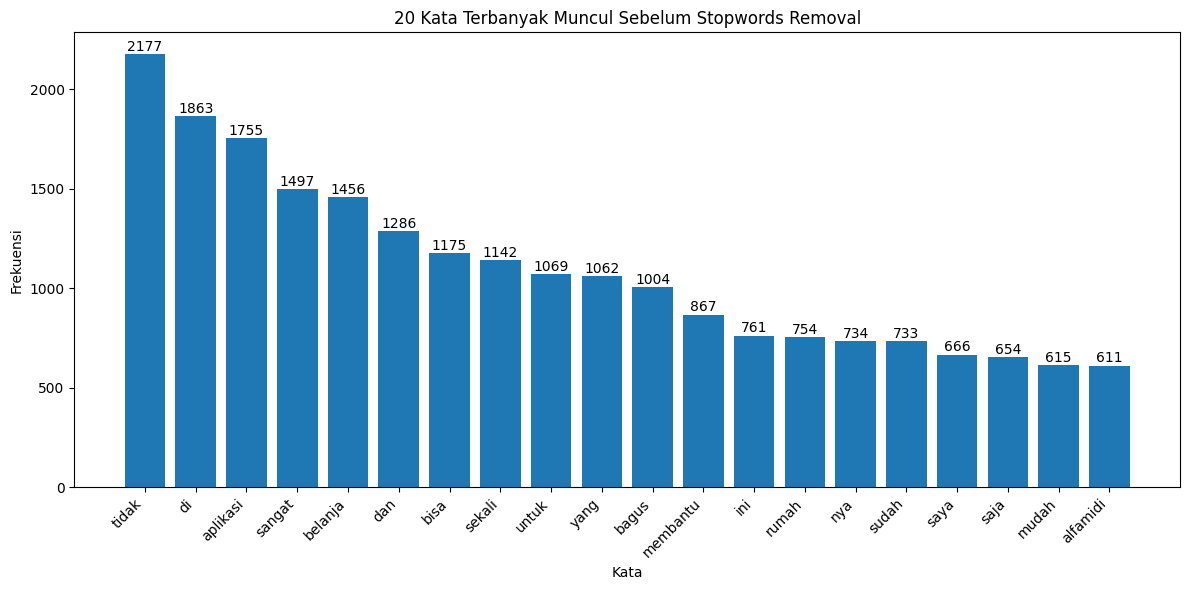

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the dataset
df = pd.read_csv('/content/Output_Tokenization.csv')

# Combine all reviews into a single string
all_reviews = ' '.join(df['Tokenisasi Text'].astype(str))

# Tokenize the reviews (split into words)
words = all_reviews.lower().split()

# Remove punctuation and special characters (optional, but recommended)
words = [re.sub(r'[^\w\s]', '', word) for word in words if word]  # Remove punctuation

# Count word frequencies
word_counts = Counter(words)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Extract words and counts for plotting
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts)

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom')

plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('20 Kata Terbanyak Muncul Sebelum Stopwords Removal')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


**Stopwords Removal**

In [ ]:

!pip install Sastrawi
import pandas as pd
import re
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
import nltk

# Unduh stopwords NLTK (jalankan sekali jika belum ada)
nltk.download('stopwords')

# Stopwords dari berbagai sumber
stopword_factory = StopWordRemoverFactory()
sastrawi_stopwords = set(stopword_factory.get_stop_words())
nltk_stopwords = set(stopwords.words('indonesian'))

# Stopwords tambahan khusus untuk ulasan Midi Kriing
custom_stopwords = {
    "midi", "kriing", "nya", "alfamidi", "banget"
}

# Gabungkan semua stopwords ke dalam satu set
all_stopwords = sastrawi_stopwords | nltk_stopwords | custom_stopwords

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text, stopwords):
    # Bersihkan teks dari karakter non-alfabet menggunakan regular expression
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya menyisakan huruf dan spasi
    # Tokenize the text into words (memisahkan per kata)
    words = text.split()  # Memisahkan teks menjadi kata-kata
    filtered_words = [word for word in words if word.lower() not in stopwords]  # Menghapus stopwords
    return filtered_words  # Kembalikan hasil sebagai list kata

# Terapkan fungsi remove_stopwords ke kolom 'Tokenisasi Text'
df['Stopword Removal Text'] = df['Tokenisasi Text'].apply(lambda x: remove_stopwords(x, all_stopwords))

# Simpan hasil stopwords ke file CSV baru
df.to_csv('Output_Stopwords.csv', index=False)

# Tampilkan hasil (contoh: 10 baris pertama)
df[['Tokenisasi Text', 'Stopword Removal Text']].head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tokenisasi Text,Stopword Removal Text
0,"['penipuan', 'transaksi', 'dibatalkan', 'tapi'...","[penipuan, transaksi, dibatalkan, uang]"
1,"['bagus', 'sekali']",[bagus]
2,"['kalau', 'sudah', 'punya', 'akun', 'alfagift'...","[akun, alfagift, download]"
3,['kebingungan'],[kebingungan]
4,"['bagus', 'aplikasinya', 'tapi', 'sayang', 'se...","[bagus, aplikasinya, sayang, kabupaten, pengir..."
5,"['saya', 'tunggu', 'barang', 'saya', 'tidak', ...","[tunggu, barang, kirim, percakapan, toko, resp..."
6,"['tolong', 'diperbaiki', 'bug', 'ketika', 'mem...","[diperbaiki, bug, memasukkan, produk, keranjan..."
7,"['sumpah', 'mau', 'daftar', 'saja', 'rumit', '...","[sumpah, daftar, rumit, aplikasi, sebelah, blj..."
8,"['setelah', 'di', 'update', 'bukannya', 'tamba...","[update, bagus, parah, membuka, aplikasi, jari..."
9,"['payah', 'saja', 'diperbarui', 'malah', 'load...","[payah, diperbarui, loading, order, pakai, cep..."


**20 Frekuensi Kata Setelah Stopwords Removal**

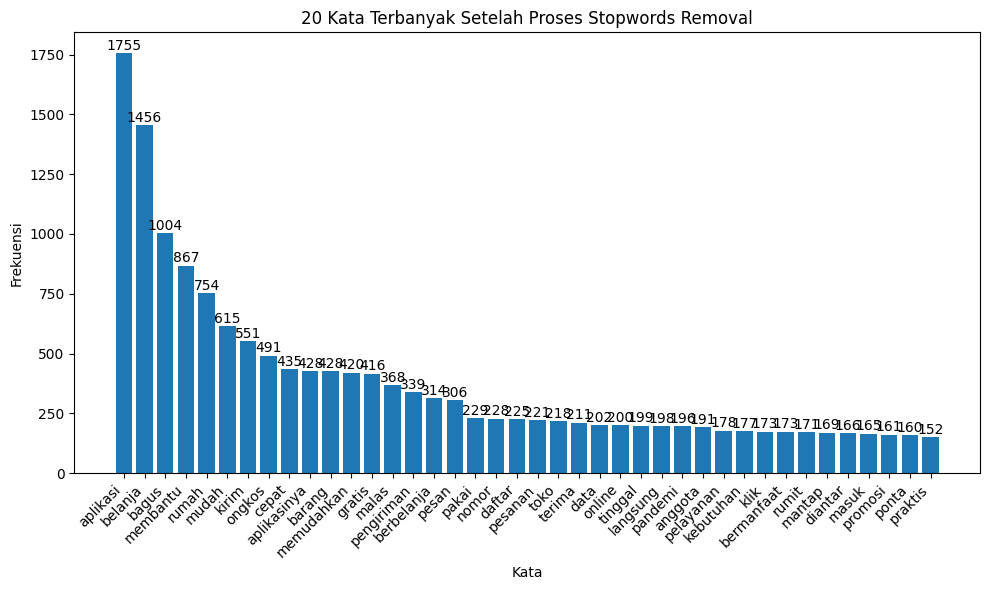

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all tokens into a single list
all_tokens = []
for tokens in df['Stopword Removal Text']:
    all_tokens.extend(tokens)

# Count word frequencies
word_counts = Counter(all_tokens)

# Get the 20 most common words
most_common_words = word_counts.most_common(40)

# Extract words and counts for plotting
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  # Positioning the text above the bar
             str(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("20 Kata Terbanyak Setelah Proses Stopwords Removal")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**Stemming**

In [ ]:
# prompt: buatkan kode proses stemming4

!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming to the 'Stopword Removal Text' column
def stemming_text(text):
    stemmed_tokens = [stemmer.stem(word) for word in text]
    return stemmed_tokens

df['Stemming Text'] = df['Stopword Removal Text'].apply(stemming_text)

# Simpan hasil stemming ke file CSV baru
df.to_csv('Output_Stemming.csv', index=False)

df[['Stopword Removal Text', 'Stemming Text']].head(10)

df2 = pd.read_csv('Output_Stemming.csv', encoding='latin1')
df2.head()

,Rating,Review Text,Produk,Layanan,Fungsional Aplikasi,Cleaning Text,Normalisasi Text,Tokenisasi Text,Stopword Removal Text,Stemming Text
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,Tidak Ada,Negatif,Negatif,penipuan transaksi dibatalkan tapi uang tidak...,penipuan transaksi dibatalkan tapi uang tidak ...,"['penipuan', 'transaksi', 'dibatalkan', 'tapi'...","['penipuan', 'transaksi', 'dibatalkan', 'uang']","['tipu', 'transaksi', 'batal', 'uang']"
1,5,mantap,Positif,Positif,Positif,mantap,bagus sekali,"['bagus', 'sekali']",['bagus'],['bagus']
2,3,kalau dah punya akun alfagift gak bisa download,Tidak Ada,Tidak Ada,Negatif,kalau dah punya akun alfagift gak bisa download,kalau sudah punya akun alfagift tidak bisa dow...,"['kalau', 'sudah', 'punya', 'akun', 'alfagift'...","['akun', 'alfagift', 'download']","['akun', 'alfagift', 'download']"
3,5,bingung,Tidak Ada,Tidak Ada,Negatif,bingung,kebingungan,['kebingungan'],['kebingungan'],['bingung']
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",Tidak Ada,Negatif,Positif,bagus aplikasinya tapi sayang sekali di kabupa...,bagus aplikasinya tapi sayang sekali di kabupa...,"['bagus', 'aplikasinya', 'tapi', 'sayang', 'se...","['bagus', 'aplikasinya', 'sayang', 'kabupaten'...","['bagus', 'aplikasi', 'sayang', 'kabupaten', '..."


### **PEMBAGIAN DATA**

**Pembagian Dataset Menjadi 2 yaitu :**

1.   Dataset Model = 90% dari Dataset Keseluruhan
2.   Dataset Validasi = 10% dari Dataset Keseluruhan

**Menggunakan Metode "Stratifikasi" Agar Sentimen Pada Masing-Masing Aspek Seimbang**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Membaca dataset dari file CSV
df2 = pd.read_csv('Output_Stemming.csv', encoding='latin1')

# Menggabungkan kolom sentimen (Produk, Layanan, Fungsional Aplikasi) menjadi satu kolom untuk stratifikasi
df2['Sentiment_Combined'] = df2['Produk'].astype(str) + '_' + df2['Layanan'].astype(str) + '_' + df2['Fungsional Aplikasi'].astype(str)

# Menghitung jumlah kemunculan setiap kombinasi sentimen
sentiment_counts = df2['Sentiment_Combined'].value_counts()

# Menghapus kombinasi sentimen yang hanya muncul sekali
df2 = df2[df2['Sentiment_Combined'].isin(sentiment_counts[sentiment_counts > 1].index)]

# Membagi data menjadi data pelatihan dan data validasi dengan stratifikasi pada kolom Sentiment_Combined
X = df2['Stemming Text']  # Fitur teks yang telah distemming
y = df2['Sentiment_Combined']  # Kolom sentimen yang digabungkan untuk stratifikasi

# Pembagian data dengan rasio 90% untuk pelatihan dan 10% untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Membuat dataframe untuk data pelatihan dan data validasi, termasuk kolom-kolom asli
train_df = pd.DataFrame({'Stemming Text': X_train})  # Membuat dataframe pelatihan hanya dengan teks
train_df = pd.concat([train_df, df2.loc[X_train.index, ['Rating', 'Review Text', 'Produk', 'Layanan', 'Fungsional Aplikasi', 'Sentiment_Combined']]], axis=1)

val_df = pd.DataFrame({'Stemming Text': X_val})  # Membuat dataframe validasi hanya dengan teks
val_df = pd.concat([val_df, df2.loc[X_val.index, ['Rating', 'Review Text', 'Produk', 'Layanan', 'Fungsional Aplikasi', 'Sentiment_Combined']]], axis=1)

# Menyimpan data pelatihan dan data validasi ke dalam file CSV
train_df.to_csv('Dataset_Model.csv', index=False)  # Menyimpan data pelatihan ke file CSV
val_df.to_csv('Dataset_Validasi.csv', index=False)  # Menyimpan data validasi ke file CSV

# Menampilkan jumlah data untuk model dan validasi
print(f"Jumlah data untuk model: {train_df.shape[0]}")  # Menampilkan jumlah data untuk pelatihan
print(f"Jumlah data untuk validasi: {val_df.shape[0]}")  # Menampilkan jumlah data untuk validasi


Jumlah data untuk model: 5149
Jumlah data untuk validasi: 573


Distribusi Sentimen Pada Masing-Masing Aspek **"DATASET KESELURUHAN"**

Jumlah data: 5724


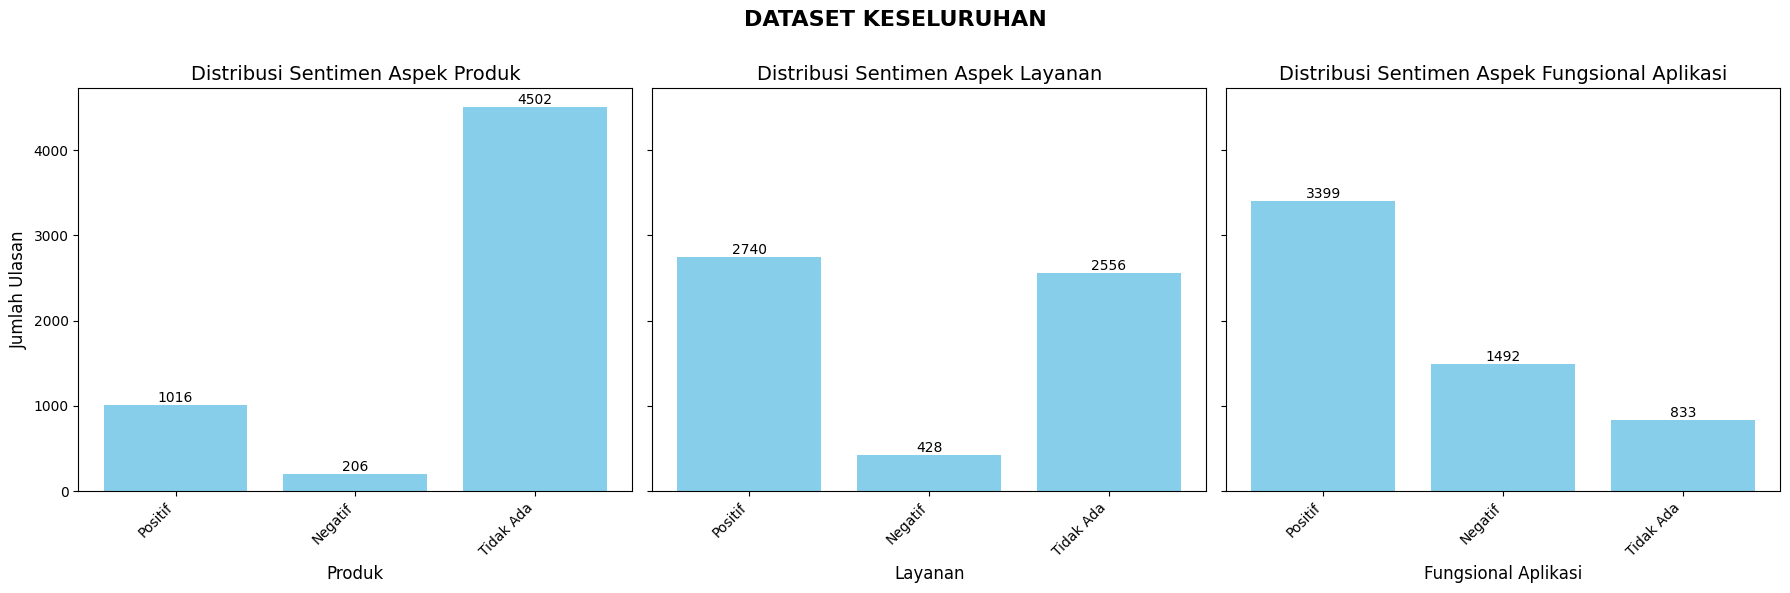

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Output_Stemming.csv', encoding='latin1')

# Define the columns and sentiment categories
columns = ['Produk', 'Layanan', 'Fungsional Aplikasi']
categories = ['Positif', 'Negatif', 'Tidak Ada']

# Create the bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, column in enumerate(columns):
    value_counts = df[column].value_counts().reindex(categories, fill_value=0)
    bars = axes[idx].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_title(f"Distribusi Sentimen Aspek {column}", fontsize=14)
    axes[idx].set_xticks(range(len(categories)))
    axes[idx].set_xticklabels(categories, rotation=45, ha="right")

    for bar in bars:
        yval = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

axes[0].set_ylabel("Jumlah Ulasan", fontsize=12)

# Add the overall title for the entire dataset
plt.suptitle("DATASET KESELURUHAN", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position to avoid overlap

# Menampilkan jumlah data
print("Jumlah data:", df.shape[0])  # Menampilkan jumlah baris (data)

plt.show()


Distribusi Sentimen Pada Masing-Masing Aspek **"DATASET MODEL"**

Jumlah data: 5149


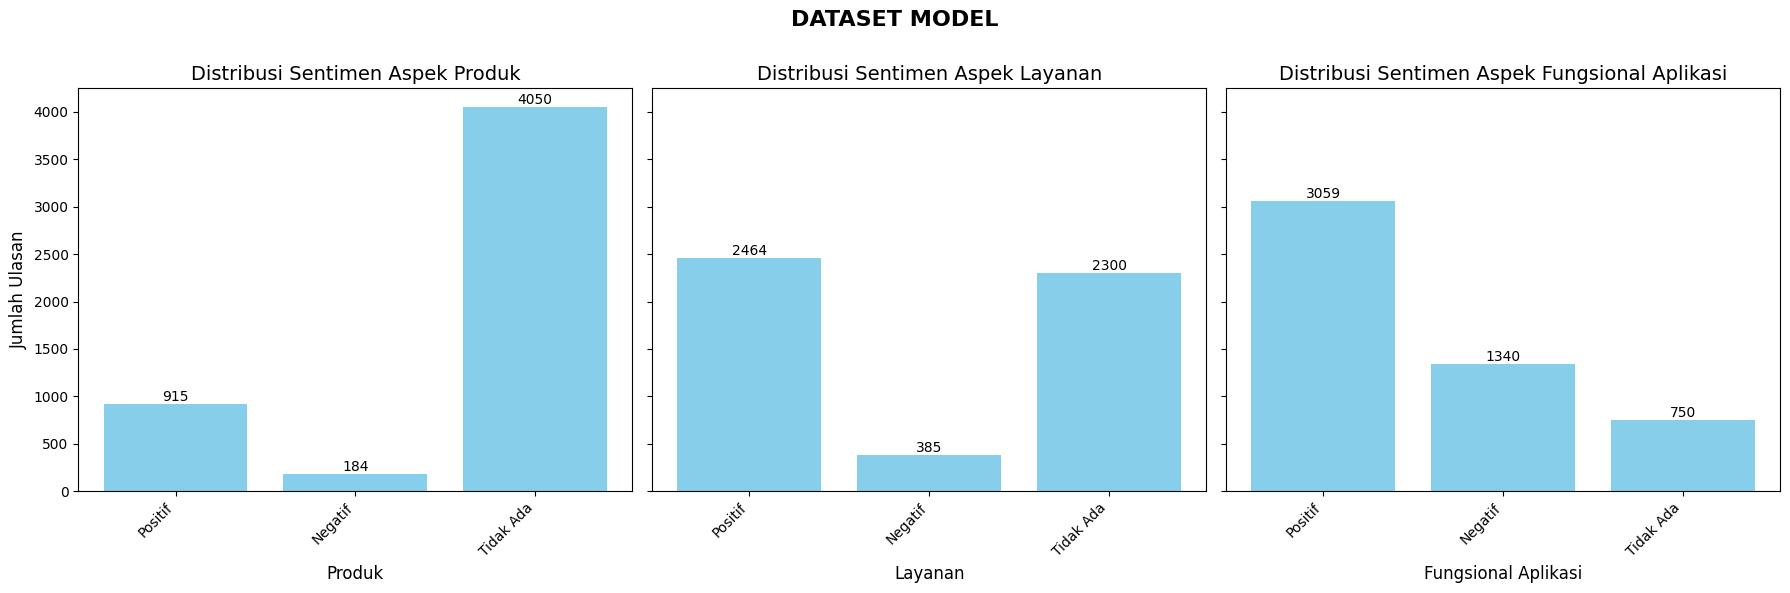

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset_Model.csv', encoding='latin1')

# Define the columns and sentiment categories
columns = ['Produk', 'Layanan', 'Fungsional Aplikasi']
categories = ['Positif', 'Negatif', 'Tidak Ada']

# Create the bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, column in enumerate(columns):
    value_counts = df[column].value_counts().reindex(categories, fill_value=0)
    bars = axes[idx].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_title(f"Distribusi Sentimen Aspek {column}", fontsize=14)
    axes[idx].set_xticks(range(len(categories)))
    axes[idx].set_xticklabels(categories, rotation=45, ha="right")

    for bar in bars:
        yval = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

axes[0].set_ylabel("Jumlah Ulasan", fontsize=12)

# Add the overall title for the entire dataset
plt.suptitle("DATASET MODEL", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position to avoid overlap

# Menampilkan jumlah data
print("Jumlah data:", df.shape[0])  # Menampilkan jumlah baris (data)

plt.show()


Distribusi Sentimen Pada Masing--Masing Aspek **"DATASET VALIDASI"**

Jumlah data: 573


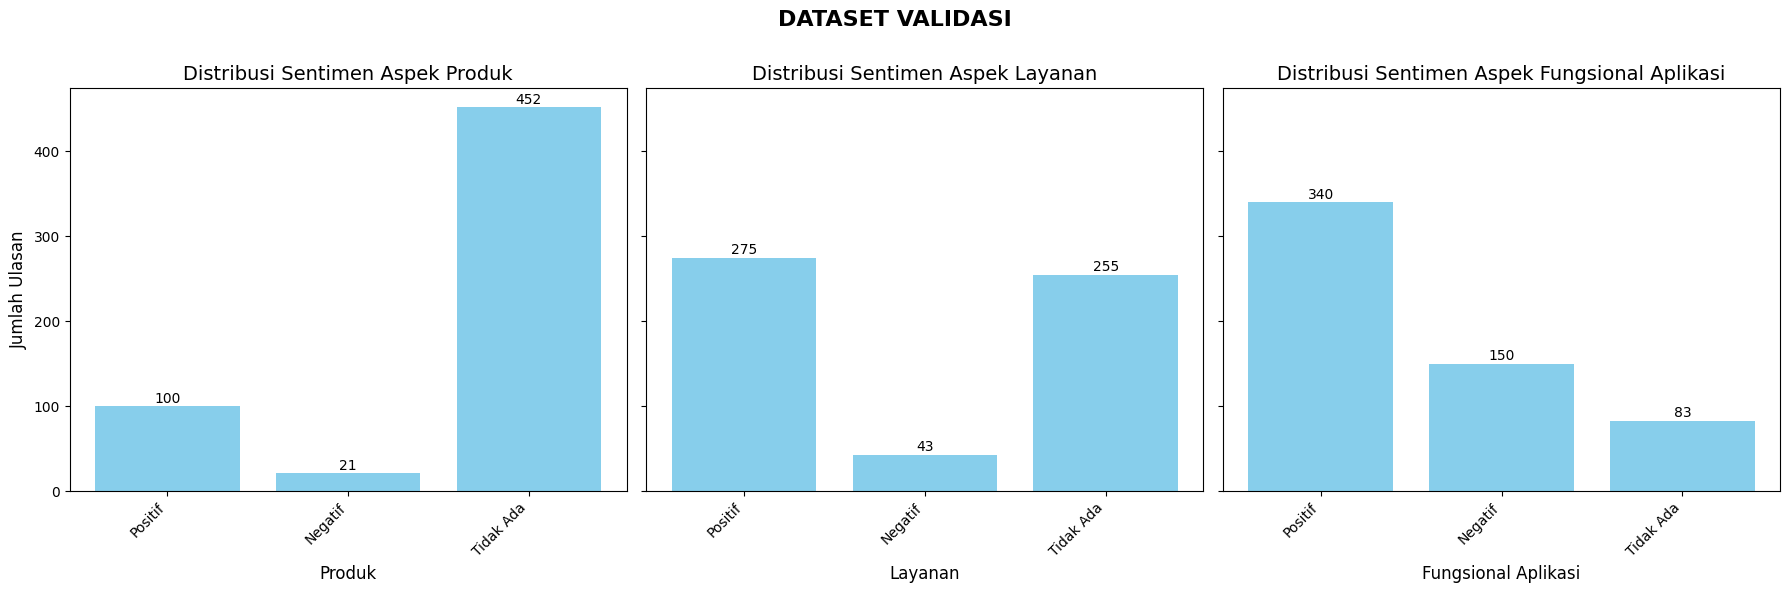

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset_Validasi.csv', encoding='latin1')

# Define the columns and sentiment categories
columns = ['Produk', 'Layanan', 'Fungsional Aplikasi']
categories = ['Positif', 'Negatif', 'Tidak Ada']

# Create the bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, column in enumerate(columns):
    value_counts = df[column].value_counts().reindex(categories, fill_value=0)
    bars = axes[idx].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_title(f"Distribusi Sentimen Aspek {column}", fontsize=14)
    axes[idx].set_xticks(range(len(categories)))
    axes[idx].set_xticklabels(categories, rotation=45, ha="right")

    for bar in bars:
        yval = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

axes[0].set_ylabel("Jumlah Ulasan", fontsize=12)

# Add the overall title for the entire dataset
plt.suptitle("DATASET VALIDASI", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position to avoid overlap

# Menampilkan jumlah data
print("Jumlah data:", df.shape[0])  # Menampilkan jumlah baris (data)

plt.show()


### **TRANSFORMASI DATA**

**Mengambil Dataset Model Yang Disimpan di Drive**

In [ ]:
!pip install gdown
import gdown
# File ID dari Google Drive
file_id = '1VlD4HgClOveuwYti5Dprg50DzbmVZU4C'

# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Dataset_Model_Fix.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C
To: /content/Dataset_Model_Fix.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 78.9MB/s]


'Dataset_Model_Fix.csv'

**Cek Jumlah Dataset Model**

In [ ]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('Dataset_Model_Fix.csv', encoding='latin1')

# Cek jumlah data (baris dan kolom)
print(f"Jumlah data (baris, kolom): {df.shape}")  # Menampilkan jumlah baris dan kolom

df.head()


Jumlah data (baris, kolom): (5149, 7)


,Stemming Text,Rating,Review Text,Produk,Layanan,Fungsional Aplikasi,Sentiment_Combined
0,['manfaat'],5,"sangat bermanfaat,,",Tidak Ada,Tidak Ada,Positif,Tidak Ada_Tidak Ada_Positif
1,"['bantu', 'produk', 'produk', 'promosi', 'bela...",5,sangat membantu untuk melihat produk produk ya...,Tidak Ada,Positif,Positif,Tidak Ada_Positif_Positif
2,"['alamat', 'toko', 'guna', 'aplikasi', 'layan'...",1,di alamat sy tdk bisa di gunakan krn tdk ada t...,Tidak Ada,Tidak Ada,Negatif,Tidak Ada_Tidak Ada_Negatif
3,"['belanja', 'pakai', 'jempol', 'doang', 'pesan...",5,"belanja pake jempol doang, bisa pesen apa aja ...",Tidak Ada,Tidak Ada,Positif,Tidak Ada_Tidak Ada_Positif
4,"['ngantar', 'pesan', 'cepat', 'rumit']",5,ngantar pesanan cepat dan gak ribet,Tidak Ada,Positif,Positif,Tidak Ada_Positif_Positif


**Pemilahan Data Pada DataFrame**

In [ ]:
y_produk = df['Produk']
X_produk = df['Stemming Text']

y_layanan = df['Layanan']
X_layanan = df['Stemming Text']

y_fungsional = df['Fungsional Aplikasi']
X_fungsional = df['Stemming Text']

**Pembagian Data Training dan Data Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji untuk 80:20
X_train_prod_80, X_test_prod_80, y_train_prod_80, y_test_prod_80 = train_test_split(X_produk, y_produk, test_size=0.2, random_state=42)
X_train_lay_80, X_test_lay_80, y_train_lay_80, y_test_lay_80 = train_test_split(X_layanan, y_layanan, test_size=0.2, random_state=42)
X_train_fung_80, X_test_fung_80, y_train_fung_80, y_test_fung_80 = train_test_split(X_fungsional, y_fungsional, test_size=0.2, random_state=42)

# Pisahkan data menjadi data latih dan data uji untuk 75:25
X_train_prod_75, X_test_prod_75, y_train_prod_75, y_test_prod_75 = train_test_split(X_produk, y_produk, test_size=0.25, random_state=42)
X_train_lay_75, X_test_lay_75, y_train_lay_75, y_test_lay_75 = train_test_split(X_layanan, y_layanan, test_size=0.25, random_state=42)
X_train_fung_75, X_test_fung_75, y_train_fung_75, y_test_fung_75 = train_test_split(X_fungsional, y_fungsional, test_size=0.25, random_state=42)


**Transformasi Data TF IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Untuk skenario 80:20
X_train_prod_vec_80 = vectorizer.fit_transform(X_train_prod_80)
X_test_prod_vec_80 = vectorizer.transform(X_test_prod_80)

X_train_lay_vec_80 = vectorizer.fit_transform(X_train_lay_80)
X_test_lay_vec_80 = vectorizer.transform(X_test_lay_80)

X_train_fung_vec_80 = vectorizer.fit_transform(X_train_fung_80)
X_test_fung_vec_80 = vectorizer.transform(X_test_fung_80)

# Untuk skenario 75:25
X_train_prod_vec_75 = vectorizer.fit_transform(X_train_prod_75)
X_test_prod_vec_75 = vectorizer.transform(X_test_prod_75)

X_train_lay_vec_75 = vectorizer.fit_transform(X_train_lay_75)
X_test_lay_vec_75 = vectorizer.transform(X_test_lay_75)

X_train_fung_vec_75 = vectorizer.fit_transform(X_train_fung_75)
X_test_fung_vec_75 = vectorizer.transform(X_test_fung_75)


# **PEMBUATAN MODEL SVM**


### **Model SVM 80 : 20**

In [ ]:
from sklearn.svm import SVC

# -------------------------- PRODUK --------------------------

# Kernel Linear dan C = 0.1
svm_model_prod_80_linear_0_1 = SVC(kernel='linear', C=0.1)
svm_model_prod_80_linear_0_1.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel Linear dan C = 1.0
svm_model_prod_80_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_prod_80_linear_1_0.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel Linear dan C = 10
svm_model_prod_80_linear_10 = SVC(kernel='linear', C=10)
svm_model_prod_80_linear_10.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel Polynomial dan C = 0.1
svm_model_prod_80_poly_0_1 = SVC(kernel='poly', C=0.1)
svm_model_prod_80_poly_0_1.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel Polynomial dan C = 1.0
svm_model_prod_80_poly_1_0 = SVC(kernel='poly', C=1.0)
svm_model_prod_80_poly_1_0.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel Polynomial dan C = 10
svm_model_prod_80_poly_10 = SVC(kernel='poly', C=10)
svm_model_prod_80_poly_10.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel RBF dan C = 0.1
svm_model_prod_80_rbf_0_1 = SVC(kernel='rbf', C=0.1)
svm_model_prod_80_rbf_0_1.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel RBF dan C = 1.0
svm_model_prod_80_rbf_1_0 = SVC(kernel='rbf', C=1.0)
svm_model_prod_80_rbf_1_0.fit(X_train_prod_vec_80, y_train_prod_80)

# Kernel RBF dan C = 10
svm_model_prod_80_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_prod_80_rbf_10.fit(X_train_prod_vec_80, y_train_prod_80)


# -------------------------- LAYANAN --------------------------

# Kernel Linear dan C = 0.1
svm_model_lay_80_linear_0_1 = SVC(kernel='linear', C=0.1)
svm_model_lay_80_linear_0_1.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel Linear dan C = 1.0
svm_model_lay_80_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_lay_80_linear_1_0.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel Linear dan C = 10
svm_model_lay_80_linear_10 = SVC(kernel='linear', C=10)
svm_model_lay_80_linear_10.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel Polynomial dan C = 0.1
svm_model_lay_80_poly_0_1 = SVC(kernel='poly', C=0.1)
svm_model_lay_80_poly_0_1.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel Polynomial dan C = 1.0
svm_model_lay_80_poly_1_0 = SVC(kernel='poly', C=1.0)
svm_model_lay_80_poly_1_0.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel Polynomial dan C = 10
svm_model_lay_80_poly_10 = SVC(kernel='poly', C=10)
svm_model_lay_80_poly_10.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel RBF dan C = 0.1
svm_model_lay_80_rbf_0_1 = SVC(kernel='rbf', C=0.1)
svm_model_lay_80_rbf_0_1.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel RBF dan C = 1.0
svm_model_lay_80_rbf_1_0 = SVC(kernel='rbf', C=1.0)
svm_model_lay_80_rbf_1_0.fit(X_train_lay_vec_80, y_train_lay_80)

# Kernel RBF dan C = 10
svm_model_lay_80_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_lay_80_rbf_10.fit(X_train_lay_vec_80, y_train_lay_80)


# -------------------------- FUNGIONAL --------------------------

# Kernel Linear dan C = 0.1
svm_model_fung_80_linear_0_1 = SVC(kernel='linear', C=0.1)
svm_model_fung_80_linear_0_1.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel Linear dan C = 1.0
svm_model_fung_80_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_fung_80_linear_1_0.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel Linear dan C = 10
svm_model_fung_80_linear_10 = SVC(kernel='linear', C=10)
svm_model_fung_80_linear_10.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel Polynomial dan C = 0.1
svm_model_fung_80_poly_0_1 = SVC(kernel='poly', C=0.1)
svm_model_fung_80_poly_0_1.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel Polynomial dan C = 1.0
svm_model_fung_80_poly_1_0 = SVC(kernel='poly', C=1.0)
svm_model_fung_80_poly_1_0.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel Polynomial dan C = 10
svm_model_fung_80_poly_10 = SVC(kernel='poly', C=10)
svm_model_fung_80_poly_10.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel RBF dan C = 0.1
svm_model_fung_80_rbf_0_1 = SVC(kernel='rbf', C=0.1)
svm_model_fung_80_rbf_0_1.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel RBF dan C = 1.0
svm_model_fung_80_rbf_1_0 = SVC(kernel='rbf', C=1.0)
svm_model_fung_80_rbf_1_0.fit(X_train_fung_vec_80, y_train_fung_80)

# Kernel RBF dan C = 10
svm_model_fung_80_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_fung_80_rbf_10.fit(X_train_fung_vec_80, y_train_fung_80)


SVC(C=10)

### **Model SVM 75 : 25**

In [ ]:
from sklearn.svm import SVC

# -------------------------- PRODUK --------------------------

# Kernel Linear dan C = 0.1
svm_model_prod_75_linear_0_1 = SVC(kernel='linear', C=0.1)
svm_model_prod_75_linear_0_1.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel Linear dan C = 1.0
svm_model_prod_75_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel Linear dan C = 10
svm_model_prod_75_linear_10 = SVC(kernel='linear', C=10)
svm_model_prod_75_linear_10.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel Polynomial dan C = 0.1
svm_model_prod_75_poly_0_1 = SVC(kernel='poly', C=0.1)
svm_model_prod_75_poly_0_1.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel Polynomial dan C = 1.0
svm_model_prod_75_poly_1_0 = SVC(kernel='poly', C=1.0)
svm_model_prod_75_poly_1_0.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel Polynomial dan C = 10
svm_model_prod_75_poly_10 = SVC(kernel='poly', C=10)
svm_model_prod_75_poly_10.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel RBF dan C = 0.1
svm_model_prod_75_rbf_0_1 = SVC(kernel='rbf', C=0.1)
svm_model_prod_75_rbf_0_1.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel RBF dan C = 1.0
svm_model_prod_75_rbf_1_0 = SVC(kernel='rbf', C=1.0)
svm_model_prod_75_rbf_1_0.fit(X_train_prod_vec_75, y_train_prod_75)

# Kernel RBF dan C = 10
svm_model_prod_75_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_prod_75_rbf_10.fit(X_train_prod_vec_75, y_train_prod_75)


# -------------------------- LAYANAN --------------------------

# Kernel Linear dan C = 0.1
svm_model_lay_75_linear_0_1 = SVC(kernel='linear', C=0.1)
svm_model_lay_75_linear_0_1.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel Linear dan C = 1.0
svm_model_lay_75_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_lay_75_linear_1_0.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel Linear dan C = 10
svm_model_lay_75_linear_10 = SVC(kernel='linear', C=10)
svm_model_lay_75_linear_10.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel Polynomial dan C = 0.1
svm_model_lay_75_poly_0_1 = SVC(kernel='poly', C=0.1)
svm_model_lay_75_poly_0_1.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel Polynomial dan C = 1.0
svm_model_lay_75_poly_1_0 = SVC(kernel='poly', C=1.0)
svm_model_lay_75_poly_1_0.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel Polynomial dan C = 10
svm_model_lay_75_poly_10 = SVC(kernel='poly', C=10)
svm_model_lay_75_poly_10.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel RBF dan C = 0.1
svm_model_lay_75_rbf_0_1 = SVC(kernel='rbf', C=0.1)
svm_model_lay_75_rbf_0_1.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel RBF dan C = 1.0
svm_model_lay_75_rbf_1_0 = SVC(kernel='rbf', C=1.0)
svm_model_lay_75_rbf_1_0.fit(X_train_lay_vec_75, y_train_lay_75)

# Kernel RBF dan C = 10
svm_model_lay_75_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_lay_75_rbf_10.fit(X_train_lay_vec_75, y_train_lay_75)


# -------------------------- FUNGIONAL --------------------------

# Kernel Linear dan C = 0.1
svm_model_fung_75_linear_0_1 = SVC(kernel='linear', C=0.1)
svm_model_fung_75_linear_0_1.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel Linear dan C = 1.0
svm_model_fung_75_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_fung_75_linear_1_0.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel Linear dan C = 10
svm_model_fung_75_linear_10 = SVC(kernel='linear', C=10)
svm_model_fung_75_linear_10.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel Polynomial dan C = 0.1
svm_model_fung_75_poly_0_1 = SVC(kernel='poly', C=0.1)
svm_model_fung_75_poly_0_1.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel Polynomial dan C = 1.0
svm_model_fung_75_poly_1_0 = SVC(kernel='poly', C=1.0)
svm_model_fung_75_poly_1_0.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel Polynomial dan C = 10
svm_model_fung_75_poly_10 = SVC(kernel='poly', C=10)
svm_model_fung_75_poly_10.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel RBF dan C = 0.1
svm_model_fung_75_rbf_0_1 = SVC(kernel='rbf', C=0.1)
svm_model_fung_75_rbf_0_1.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel RBF dan C = 1.0
svm_model_fung_75_rbf_1_0 = SVC(kernel='rbf', C=1.0)
svm_model_fung_75_rbf_1_0.fit(X_train_fung_vec_75, y_train_fung_75)

# Kernel RBF dan C = 10
svm_model_fung_75_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_fung_75_rbf_10.fit(X_train_fung_vec_75, y_train_fung_75)


SVC(C=10)

### **Model SVM SMOTE 80 : 20**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# -------------------------- PRODUK --------------------------

# Oversampling using SMOTE for 'Produk' aspect
smote_prod = SMOTE(random_state=42)
X_train_prod_resampled, y_train_prod_resampled = smote_prod.fit_resample(X_train_prod_vec_80, y_train_prod_80)

# Kernel Linear dan C = 0.1
svm_model_prod_80_linear_0_1_smote = SVC(kernel='linear', C=0.1)
svm_model_prod_80_linear_0_1_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Linear dan C = 1.0
svm_model_prod_80_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_prod_80_linear_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Linear dan C = 10
svm_model_prod_80_linear_10_smote = SVC(kernel='linear', C=10)
svm_model_prod_80_linear_10_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Polynomial dan C = 0.1
svm_model_prod_80_poly_0_1_smote = SVC(kernel='poly', C=0.1)
svm_model_prod_80_poly_0_1_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Polynomial dan C = 1.0
svm_model_prod_80_poly_1_0_smote = SVC(kernel='poly', C=1.0)
svm_model_prod_80_poly_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Polynomial dan C = 10
svm_model_prod_80_poly_10_smote = SVC(kernel='poly', C=10)
svm_model_prod_80_poly_10_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel RBF dan C = 0.1
svm_model_prod_80_rbf_0_1_smote = SVC(kernel='rbf', C=0.1)
svm_model_prod_80_rbf_0_1_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel RBF dan C = 1.0
svm_model_prod_80_rbf_1_0_smote = SVC(kernel='rbf', C=1.0)
svm_model_prod_80_rbf_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel RBF dan C = 10
svm_model_prod_80_rbf_10_smote = SVC(kernel='rbf', C=10)
svm_model_prod_80_rbf_10_smote.fit(X_train_prod_resampled, y_train_prod_resampled)


# -------------------------- LAYANAN --------------------------

# Oversampling using SMOTE for 'Layanan' aspect
smote_lay = SMOTE(random_state=42)
X_train_lay_resampled, y_train_lay_resampled = smote_lay.fit_resample(X_train_lay_vec_80, y_train_lay_80)

# Kernel Linear dan C = 0.1
svm_model_lay_80_linear_0_1_smote = SVC(kernel='linear', C=0.1)
svm_model_lay_80_linear_0_1_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Linear dan C = 1.0
svm_model_lay_80_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_lay_80_linear_1_0_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Linear dan C = 10
svm_model_lay_80_linear_10_smote = SVC(kernel='linear', C=10)
svm_model_lay_80_linear_10_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Polynomial dan C = 0.1
svm_model_lay_80_poly_0_1_smote = SVC(kernel='poly', C=0.1)
svm_model_lay_80_poly_0_1_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Polynomial dan C = 1.0
svm_model_lay_80_poly_1_0_smote = SVC(kernel='poly', C=1.0)
svm_model_lay_80_poly_1_0_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Polynomial dan C = 10
svm_model_lay_80_poly_10_smote = SVC(kernel='poly', C=10)
svm_model_lay_80_poly_10_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel RBF dan C = 0.1
svm_model_lay_80_rbf_0_1_smote = SVC(kernel='rbf', C=0.1)
svm_model_lay_80_rbf_0_1_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel RBF dan C = 1.0
svm_model_lay_80_rbf_1_0_smote = SVC(kernel='rbf', C=1.0)
svm_model_lay_80_rbf_1_0_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel RBF dan C = 10
svm_model_lay_80_rbf_10_smote = SVC(kernel='rbf', C=10)
svm_model_lay_80_rbf_10_smote.fit(X_train_lay_resampled, y_train_lay_resampled)


# -------------------------- FUNGIONAL --------------------------

# Oversampling using SMOTE for 'Fungsional Aplikasi' aspect
smote_fung = SMOTE(random_state=42)
X_train_fung_resampled, y_train_fung_resampled = smote_fung.fit_resample(X_train_fung_vec_80, y_train_fung_80)

# Kernel Linear dan C = 0.1
svm_model_fung_80_linear_0_1_smote = SVC(kernel='linear', C=0.1)
svm_model_fung_80_linear_0_1_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Linear dan C = 1.0
svm_model_fung_80_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_fung_80_linear_1_0_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Linear dan C = 10
svm_model_fung_80_linear_10_smote = SVC(kernel='linear', C=10)
svm_model_fung_80_linear_10_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Polynomial dan C = 0.1
svm_model_fung_80_poly_0_1_smote = SVC(kernel='poly', C=0.1)
svm_model_fung_80_poly_0_1_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Polynomial dan C = 1.0
svm_model_fung_80_poly_1_0_smote = SVC(kernel='poly', C=1.0)
svm_model_fung_80_poly_1_0_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Polynomial dan C = 10
svm_model_fung_80_poly_10_smote = SVC(kernel='poly', C=10)
svm_model_fung_80_poly_10_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel RBF dan C = 0.1
svm_model_fung_80_rbf_0_1_smote = SVC(kernel='rbf', C=0.1)
svm_model_fung_80_rbf_0_1_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel RBF dan C = 1.0
svm_model_fung_80_rbf_1_0_smote = SVC(kernel='rbf', C=1.0)
svm_model_fung_80_rbf_1_0_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel RBF dan C = 10
svm_model_fung_80_rbf_10_smote = SVC(kernel='rbf', C=10)
svm_model_fung_80_rbf_10_smote.fit(X_train_fung_resampled, y_train_fung_resampled)


SVC(C=10)

### **Model SVM SMOTE 75 : 25**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# -------------------------- PRODUK --------------------------

# Oversampling using SMOTE for 'Produk' aspect (75:25)
smote_prod = SMOTE(random_state=42)
X_train_prod_resampled, y_train_prod_resampled = smote_prod.fit_resample(X_train_prod_vec_75, y_train_prod_75)

# Kernel Linear dan C = 0.1
svm_model_prod_75_linear_0_1_smote = SVC(kernel='linear', C=0.1)
svm_model_prod_75_linear_0_1_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Linear dan C = 1.0
svm_model_prod_75_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Linear dan C = 10
svm_model_prod_75_linear_10_smote = SVC(kernel='linear', C=10)
svm_model_prod_75_linear_10_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Polynomial dan C = 0.1
svm_model_prod_75_poly_0_1_smote = SVC(kernel='poly', C=0.1)
svm_model_prod_75_poly_0_1_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Polynomial dan C = 1.0
svm_model_prod_75_poly_1_0_smote = SVC(kernel='poly', C=1.0)
svm_model_prod_75_poly_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel Polynomial dan C = 10
svm_model_prod_75_poly_10_smote = SVC(kernel='poly', C=10)
svm_model_prod_75_poly_10_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel RBF dan C = 0.1
svm_model_prod_75_rbf_0_1_smote = SVC(kernel='rbf', C=0.1)
svm_model_prod_75_rbf_0_1_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel RBF dan C = 1.0
svm_model_prod_75_rbf_1_0_smote = SVC(kernel='rbf', C=1.0)
svm_model_prod_75_rbf_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Kernel RBF dan C = 10
svm_model_prod_75_rbf_10_smote = SVC(kernel='rbf', C=10)
svm_model_prod_75_rbf_10_smote.fit(X_train_prod_resampled, y_train_prod_resampled)


# -------------------------- LAYANAN --------------------------

# Oversampling using SMOTE for 'Layanan' aspect (75:25)
smote_lay = SMOTE(random_state=42)
X_train_lay_resampled, y_train_lay_resampled = smote_lay.fit_resample(X_train_lay_vec_75, y_train_lay_75)

# Kernel Linear dan C = 0.1
svm_model_lay_75_linear_0_1_smote = SVC(kernel='linear', C=0.1)
svm_model_lay_75_linear_0_1_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Linear dan C = 1.0
svm_model_lay_75_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_lay_75_linear_1_0_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Linear dan C = 10
svm_model_lay_75_linear_10_smote = SVC(kernel='linear', C=10)
svm_model_lay_75_linear_10_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Polynomial dan C = 0.1
svm_model_lay_75_poly_0_1_smote = SVC(kernel='poly', C=0.1)
svm_model_lay_75_poly_0_1_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Polynomial dan C = 1.0
svm_model_lay_75_poly_1_0_smote = SVC(kernel='poly', C=1.0)
svm_model_lay_75_poly_1_0_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel Polynomial dan C = 10
svm_model_lay_75_poly_10_smote = SVC(kernel='poly', C=10)
svm_model_lay_75_poly_10_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel RBF dan C = 0.1
svm_model_lay_75_rbf_0_1_smote = SVC(kernel='rbf', C=0.1)
svm_model_lay_75_rbf_0_1_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel RBF dan C = 1.0
svm_model_lay_75_rbf_1_0_smote = SVC(kernel='rbf', C=1.0)
svm_model_lay_75_rbf_1_0_smote.fit(X_train_lay_resampled, y_train_lay_resampled)

# Kernel RBF dan C = 10
svm_model_lay_75_rbf_10_smote = SVC(kernel='rbf', C=10)
svm_model_lay_75_rbf_10_smote.fit(X_train_lay_resampled, y_train_lay_resampled)


# -------------------------- FUNGIONAL --------------------------

# Oversampling using SMOTE for 'Fungsional Aplikasi' aspect (75:25)
smote_fung = SMOTE(random_state=42)
X_train_fung_resampled, y_train_fung_resampled = smote_fung.fit_resample(X_train_fung_vec_75, y_train_fung_75)

# Kernel Linear dan C = 0.1
svm_model_fung_75_linear_0_1_smote = SVC(kernel='linear', C=0.1)
svm_model_fung_75_linear_0_1_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Linear dan C = 1.0
svm_model_fung_75_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_fung_75_linear_1_0_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Linear dan C = 10
svm_model_fung_75_linear_10_smote = SVC(kernel='linear', C=10)
svm_model_fung_75_linear_10_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Polynomial dan C = 0.1
svm_model_fung_75_poly_0_1_smote = SVC(kernel='poly', C=0.1)
svm_model_fung_75_poly_0_1_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Polynomial dan C = 1.0
svm_model_fung_75_poly_1_0_smote = SVC(kernel='poly', C=1.0)
svm_model_fung_75_poly_1_0_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel Polynomial dan C = 10
svm_model_fung_75_poly_10_smote = SVC(kernel='poly', C=10)
svm_model_fung_75_poly_10_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel RBF dan C = 0.1
svm_model_fung_75_rbf_0_1_smote = SVC(kernel='rbf', C=0.1)
svm_model_fung_75_rbf_0_1_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel RBF dan C = 1.0
svm_model_fung_75_rbf_1_0_smote = SVC(kernel='rbf', C=1.0)
svm_model_fung_75_rbf_1_0_smote.fit(X_train_fung_resampled, y_train_fung_resampled)

# Kernel RBF dan C = 10
svm_model_fung_75_rbf_10_smote = SVC(kernel='rbf', C=10)
svm_model_fung_75_rbf_10_smote.fit(X_train_fung_resampled, y_train_fung_resampled)


SVC(C=10)

# **EVALUASI**

### **Data Biasa 80 : 20**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# -------------------------- PRODUK --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1
y_pred_prod_80_linear_0_1 = svm_model_prod_80_linear_0_1.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Linear C=0.1):")
print(classification_report(y_test_prod_80, y_pred_prod_80_linear_0_1))
print("Accuracy for Produk (Linear C=0.1):", accuracy_score(y_test_prod_80, y_pred_prod_80_linear_0_1))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
y_pred_prod_80_linear_1_0 = svm_model_prod_80_linear_1_0.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Linear C=1.0):")
print(classification_report(y_test_prod_80, y_pred_prod_80_linear_1_0))
print("Accuracy for Produk (Linear C=1.0):", accuracy_score(y_test_prod_80, y_pred_prod_80_linear_1_0))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10
y_pred_prod_80_linear_10 = svm_model_prod_80_linear_10.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Linear C=10):")
print(classification_report(y_test_prod_80, y_pred_prod_80_linear_10))
print("Accuracy for Produk (Linear C=10):", accuracy_score(y_test_prod_80, y_pred_prod_80_linear_10))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1
y_pred_prod_80_poly_0_1 = svm_model_prod_80_poly_0_1.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Polynomial C=0.1):")
print(classification_report(y_test_prod_80, y_pred_prod_80_poly_0_1))
print("Accuracy for Produk (Polynomial C=0.1):", accuracy_score(y_test_prod_80, y_pred_prod_80_poly_0_1))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0
y_pred_prod_80_poly_1_0 = svm_model_prod_80_poly_1_0.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Polynomial C=1.0):")
print(classification_report(y_test_prod_80, y_pred_prod_80_poly_1_0))
print("Accuracy for Produk (Polynomial C=1.0):", accuracy_score(y_test_prod_80, y_pred_prod_80_poly_1_0))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10
y_pred_prod_80_poly_10 = svm_model_prod_80_poly_10.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Polynomial C=10):")
print(classification_report(y_test_prod_80, y_pred_prod_80_poly_10))
print("Accuracy for Produk (Polynomial C=10):", accuracy_score(y_test_prod_80, y_pred_prod_80_poly_10))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1
y_pred_prod_80_rbf_0_1 = svm_model_prod_80_rbf_0_1.predict(X_test_prod_vec_80)
print("Classification Report for Produk (RBF C=0.1):")
print(classification_report(y_test_prod_80, y_pred_prod_80_rbf_0_1))
print("Accuracy for Produk (RBF C=0.1):", accuracy_score(y_test_prod_80, y_pred_prod_80_rbf_0_1))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0
y_pred_prod_80_rbf_1_0 = svm_model_prod_80_rbf_1_0.predict(X_test_prod_vec_80)
print("Classification Report for Produk (RBF C=1.0):")
print(classification_report(y_test_prod_80, y_pred_prod_80_rbf_1_0))
print("Accuracy for Produk (RBF C=1.0):", accuracy_score(y_test_prod_80, y_pred_prod_80_rbf_1_0))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10
y_pred_prod_80_rbf_10 = svm_model_prod_80_rbf_10.predict(X_test_prod_vec_80)
print("Classification Report for Produk (RBF C=10):")
print(classification_report(y_test_prod_80, y_pred_prod_80_rbf_10))
print("Accuracy for Produk (RBF C=10):", accuracy_score(y_test_prod_80, y_pred_prod_80_rbf_10))


# -------------------------- LAYANAN --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1
y_pred_lay_80_linear_0_1 = svm_model_lay_80_linear_0_1.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Linear C=0.1):")
print(classification_report(y_test_lay_80, y_pred_lay_80_linear_0_1))
print("Accuracy for Layanan (Linear C=0.1):", accuracy_score(y_test_lay_80, y_pred_lay_80_linear_0_1))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
y_pred_lay_80_linear_1_0 = svm_model_lay_80_linear_1_0.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Linear C=1.0):")
print(classification_report(y_test_lay_80, y_pred_lay_80_linear_1_0))
print("Accuracy for Layanan (Linear C=1.0):", accuracy_score(y_test_lay_80, y_pred_lay_80_linear_1_0))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10
y_pred_lay_80_linear_10 = svm_model_lay_80_linear_10.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Linear C=10):")
print(classification_report(y_test_lay_80, y_pred_lay_80_linear_10))
print("Accuracy for Layanan (Linear C=10):", accuracy_score(y_test_lay_80, y_pred_lay_80_linear_10))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1
y_pred_lay_80_poly_0_1 = svm_model_lay_80_poly_0_1.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Polynomial C=0.1):")
print(classification_report(y_test_lay_80, y_pred_lay_80_poly_0_1))
print("Accuracy for Layanan (Polynomial C=0.1):", accuracy_score(y_test_lay_80, y_pred_lay_80_poly_0_1))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0
y_pred_lay_80_poly_1_0 = svm_model_lay_80_poly_1_0.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Polynomial C=1.0):")
print(classification_report(y_test_lay_80, y_pred_lay_80_poly_1_0))
print("Accuracy for Layanan (Polynomial C=1.0):", accuracy_score(y_test_lay_80, y_pred_lay_80_poly_1_0))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10
y_pred_lay_80_poly_10 = svm_model_lay_80_poly_10.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Polynomial C=10):")
print(classification_report(y_test_lay_80, y_pred_lay_80_poly_10))
print("Accuracy for Layanan (Polynomial C=10):", accuracy_score(y_test_lay_80, y_pred_lay_80_poly_10))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1
y_pred_lay_80_rbf_0_1 = svm_model_lay_80_rbf_0_1.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (RBF C=0.1):")
print(classification_report(y_test_lay_80, y_pred_lay_80_rbf_0_1))
print("Accuracy for Layanan (RBF C=0.1):", accuracy_score(y_test_lay_80, y_pred_lay_80_rbf_0_1))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0
y_pred_lay_80_rbf_1_0 = svm_model_lay_80_rbf_1_0.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (RBF C=1.0):")
print(classification_report(y_test_lay_80, y_pred_lay_80_rbf_1_0))
print("Accuracy for Layanan (RBF C=1.0):", accuracy_score(y_test_lay_80, y_pred_lay_80_rbf_1_0))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10
y_pred_lay_80_rbf_10 = svm_model_lay_80_rbf_10.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (RBF C=10):")
print(classification_report(y_test_lay_80, y_pred_lay_80_rbf_10))
print("Accuracy for Layanan (RBF C=10):", accuracy_score(y_test_lay_80, y_pred_lay_80_rbf_10))


# -------------------------- FUNGIONAL --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1
y_pred_fung_80_linear_0_1 = svm_model_fung_80_linear_0_1.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Linear C=0.1):")
print(classification_report(y_test_fung_80, y_pred_fung_80_linear_0_1))
print("Accuracy for Fungsional Aplikasi (Linear C=0.1):", accuracy_score(y_test_fung_80, y_pred_fung_80_linear_0_1))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
y_pred_fung_80_linear_1_0 = svm_model_fung_80_linear_1_0.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Linear C=1.0):")
print(classification_report(y_test_fung_80, y_pred_fung_80_linear_1_0))
print("Accuracy for Fungsional Aplikasi (Linear C=1.0):", accuracy_score(y_test_fung_80, y_pred_fung_80_linear_1_0))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10
y_pred_fung_80_linear_10 = svm_model_fung_80_linear_10.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Linear C=10):")
print(classification_report(y_test_fung_80, y_pred_fung_80_linear_10))
print("Accuracy for Fungsional Aplikasi (Linear C=10):", accuracy_score(y_test_fung_80, y_pred_fung_80_linear_10))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1
y_pred_fung_80_poly_0_1 = svm_model_fung_80_poly_0_1.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Polynomial C=0.1):")
print(classification_report(y_test_fung_80, y_pred_fung_80_poly_0_1))
print("Accuracy for Fungsional Aplikasi (Polynomial C=0.1):", accuracy_score(y_test_fung_80, y_pred_fung_80_poly_0_1))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0
y_pred_fung_80_poly_1_0 = svm_model_fung_80_poly_1_0.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Polynomial C=1.0):")
print(classification_report(y_test_fung_80, y_pred_fung_80_poly_1_0))
print("Accuracy for Fungsional Aplikasi (Polynomial C=1.0):", accuracy_score(y_test_fung_80, y_pred_fung_80_poly_1_0))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10
y_pred_fung_80_poly_10 = svm_model_fung_80_poly_10.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Polynomial C=10):")
print(classification_report(y_test_fung_80, y_pred_fung_80_poly_10))
print("Accuracy for Fungsional Aplikasi (Polynomial C=10):", accuracy_score(y_test_fung_80, y_pred_fung_80_poly_10))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1
y_pred_fung_80_rbf_0_1 = svm_model_fung_80_rbf_0_1.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (RBF C=0.1):")
print(classification_report(y_test_fung_80, y_pred_fung_80_rbf_0_1))
print("Accuracy for Fungsional Aplikasi (RBF C=0.1):", accuracy_score(y_test_fung_80, y_pred_fung_80_rbf_0_1))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0
y_pred_fung_80_rbf_1_0 = svm_model_fung_80_rbf_1_0.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (RBF C=1.0):")
print(classification_report(y_test_fung_80, y_pred_fung_80_rbf_1_0))
print("Accuracy for Fungsional Aplikasi (RBF C=1.0):", accuracy_score(y_test_fung_80, y_pred_fung_80_rbf_1_0))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10
y_pred_fung_80_rbf_10 = svm_model_fung_80_rbf_10.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (RBF C=10):")
print(classification_report(y_test_fung_80, y_pred_fung_80_rbf_10))
print("Accuracy for Fungsional Aplikasi (RBF C=10):", accuracy_score(y_test_fung_80, y_pred_fung_80_rbf_10))


Classification Report for Produk (Linear C=0.1):
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        45
     Positif       0.84      0.22      0.35       186
   Tidak Ada       0.81      1.00      0.90       799

    accuracy                           0.81      1030
   macro avg       0.55      0.41      0.41      1030
weighted avg       0.78      0.81      0.76      1030

Accuracy for Produk (Linear C=0.1): 0.8135922330097087
Classification Report for Produk (Linear C=1.0):
              precision    recall  f1-score   support

     Negatif       0.71      0.38      0.49        45
     Positif       0.79      0.62      0.69       186
   Tidak Ada       0.90      0.97      0.93       799

    accuracy                           0.88      1030
   macro avg       0.80      0.65      0.71      1030
weighted avg       0.87      0.88      0.87      1030

Accuracy for Produk (Linear C=1.0): 0.8796116504854369


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Produk (Linear C=10):
              precision    recall  f1-score   support

     Negatif       0.54      0.58      0.56        45
     Positif       0.66      0.78      0.72       186
   Tidak Ada       0.95      0.90      0.92       799

    accuracy                           0.87      1030
   macro avg       0.72      0.75      0.73      1030
weighted avg       0.88      0.87      0.87      1030

Accuracy for Produk (Linear C=10): 0.8669902912621359
Classification Report for Produk (Polynomial C=0.1):
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        45
     Positif       0.94      0.18      0.31       186
   Tidak Ada       0.80      1.00      0.89       799

    accuracy                           0.81      1030
   macro avg       0.58      0.39      0.40      1030
weighted avg       0.79      0.81      0.74      1030

Accuracy for Produk (Polynomial C=0.1): 0.8067961165048544


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Produk (Polynomial C=1.0):
              precision    recall  f1-score   support

     Negatif       0.56      0.11      0.19        45
     Positif       0.78      0.47      0.59       186
   Tidak Ada       0.85      0.97      0.91       799

    accuracy                           0.84      1030
   macro avg       0.73      0.52      0.56      1030
weighted avg       0.83      0.84      0.82      1030

Accuracy for Produk (Polynomial C=1.0): 0.8436893203883495
Classification Report for Produk (Polynomial C=10):
              precision    recall  f1-score   support

     Negatif       0.67      0.18      0.28        45
     Positif       0.72      0.55      0.62       186
   Tidak Ada       0.87      0.95      0.91       799

    accuracy                           0.85      1030
   macro avg       0.75      0.56      0.60      1030
weighted avg       0.83      0.85      0.83      1030

Accuracy for Produk (Polynomial C=10): 0.8466019417475729
Classification R

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Produk (RBF C=1.0):
              precision    recall  f1-score   support

     Negatif       0.78      0.31      0.44        45
     Positif       0.72      0.65      0.68       186
   Tidak Ada       0.90      0.95      0.92       799

    accuracy                           0.87      1030
   macro avg       0.80      0.64      0.68      1030
weighted avg       0.86      0.87      0.86      1030

Accuracy for Produk (RBF C=1.0): 0.8679611650485437
Classification Report for Produk (RBF C=10):
              precision    recall  f1-score   support

     Negatif       0.69      0.44      0.54        45
     Positif       0.69      0.71      0.70       186
   Tidak Ada       0.92      0.93      0.92       799

    accuracy                           0.87      1030
   macro avg       0.77      0.70      0.72      1030
weighted avg       0.87      0.87      0.87      1030

Accuracy for Produk (RBF C=10): 0.8699029126213592
Classification Report for Layanan (Linear C=

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Layanan (Polynomial C=1.0):
              precision    recall  f1-score   support

     Negatif       0.90      0.12      0.21        74
     Positif       0.88      0.82      0.85       477
   Tidak Ada       0.75      0.91      0.82       479

    accuracy                           0.81      1030
   macro avg       0.84      0.61      0.63      1030
weighted avg       0.82      0.81      0.79      1030

Accuracy for Layanan (Polynomial C=1.0): 0.8077669902912621
Classification Report for Layanan (Polynomial C=10):
              precision    recall  f1-score   support

     Negatif       0.81      0.18      0.29        74
     Positif       0.84      0.83      0.84       477
   Tidak Ada       0.78      0.89      0.83       479

    accuracy                           0.81      1030
   macro avg       0.81      0.63      0.65      1030
weighted avg       0.81      0.81      0.79      1030

Accuracy for Layanan (Polynomial C=10): 0.8087378640776699
Classificati

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Layanan (RBF C=1.0):
              precision    recall  f1-score   support

     Negatif       0.85      0.64      0.73        74
     Positif       0.86      0.88      0.87       477
   Tidak Ada       0.86      0.86      0.86       479

    accuracy                           0.86      1030
   macro avg       0.86      0.79      0.82      1030
weighted avg       0.86      0.86      0.86      1030

Accuracy for Layanan (RBF C=1.0): 0.8563106796116505
Classification Report for Layanan (RBF C=10):
              precision    recall  f1-score   support

     Negatif       0.84      0.73      0.78        74
     Positif       0.86      0.88      0.87       477
   Tidak Ada       0.86      0.86      0.86       479

    accuracy                           0.86      1030
   macro avg       0.85      0.82      0.84      1030
weighted avg       0.86      0.86      0.86      1030

Accuracy for Layanan (RBF C=10): 0.858252427184466
Classification Report for Fungsional Apli

### **Data Biasa 75 : 25**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# -------------------------- PRODUK --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1
y_pred_prod_75_linear_0_1 = svm_model_prod_75_linear_0_1.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Linear C=0.1):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_0_1))
print("Accuracy for Produk (Linear C=0.1):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_0_1))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
y_pred_prod_75_linear_1_0 = svm_model_prod_75_linear_1_0.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Linear C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0))
print("Accuracy for Produk (Linear C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10
y_pred_prod_75_linear_10 = svm_model_prod_75_linear_10.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Linear C=10):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_10))
print("Accuracy for Produk (Linear C=10):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_10))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1
y_pred_prod_75_poly_0_1 = svm_model_prod_75_poly_0_1.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Polynomial C=0.1):")
print(classification_report(y_test_prod_75, y_pred_prod_75_poly_0_1))
print("Accuracy for Produk (Polynomial C=0.1):", accuracy_score(y_test_prod_75, y_pred_prod_75_poly_0_1))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0
y_pred_prod_75_poly_1_0 = svm_model_prod_75_poly_1_0.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Polynomial C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_poly_1_0))
print("Accuracy for Produk (Polynomial C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_poly_1_0))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10
y_pred_prod_75_poly_10 = svm_model_prod_75_poly_10.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Polynomial C=10):")
print(classification_report(y_test_prod_75, y_pred_prod_75_poly_10))
print("Accuracy for Produk (Polynomial C=10):", accuracy_score(y_test_prod_75, y_pred_prod_75_poly_10))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1
y_pred_prod_75_rbf_0_1 = svm_model_prod_75_rbf_0_1.predict(X_test_prod_vec_75)
print("Classification Report for Produk (RBF C=0.1):")
print(classification_report(y_test_prod_75, y_pred_prod_75_rbf_0_1))
print("Accuracy for Produk (RBF C=0.1):", accuracy_score(y_test_prod_75, y_pred_prod_75_rbf_0_1))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0
y_pred_prod_75_rbf_1_0 = svm_model_prod_75_rbf_1_0.predict(X_test_prod_vec_75)
print("Classification Report for Produk (RBF C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_rbf_1_0))
print("Accuracy for Produk (RBF C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_rbf_1_0))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10
y_pred_prod_75_rbf_10 = svm_model_prod_75_rbf_10.predict(X_test_prod_vec_75)
print("Classification Report for Produk (RBF C=10):")
print(classification_report(y_test_prod_75, y_pred_prod_75_rbf_10))
print("Accuracy for Produk (RBF C=10):", accuracy_score(y_test_prod_75, y_pred_prod_75_rbf_10))


# -------------------------- LAYANAN --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1
y_pred_lay_75_linear_0_1 = svm_model_lay_75_linear_0_1.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Linear C=0.1):")
print(classification_report(y_test_lay_75, y_pred_lay_75_linear_0_1))
print("Accuracy for Layanan (Linear C=0.1):", accuracy_score(y_test_lay_75, y_pred_lay_75_linear_0_1))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
y_pred_lay_75_linear_1_0 = svm_model_lay_75_linear_1_0.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Linear C=1.0):")
print(classification_report(y_test_lay_75, y_pred_lay_75_linear_1_0))
print("Accuracy for Layanan (Linear C=1.0):", accuracy_score(y_test_lay_75, y_pred_lay_75_linear_1_0))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10
y_pred_lay_75_linear_10 = svm_model_lay_75_linear_10.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Linear C=10):")
print(classification_report(y_test_lay_75, y_pred_lay_75_linear_10))
print("Accuracy for Layanan (Linear C=10):", accuracy_score(y_test_lay_75, y_pred_lay_75_linear_10))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1
y_pred_lay_75_poly_0_1 = svm_model_lay_75_poly_0_1.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Polynomial C=0.1):")
print(classification_report(y_test_lay_75, y_pred_lay_75_poly_0_1))
print("Accuracy for Layanan (Polynomial C=0.1):", accuracy_score(y_test_lay_75, y_pred_lay_75_poly_0_1))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0
y_pred_lay_75_poly_1_0 = svm_model_lay_75_poly_1_0.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Polynomial C=1.0):")
print(classification_report(y_test_lay_75, y_pred_lay_75_poly_1_0))
print("Accuracy for Layanan (Polynomial C=1.0):", accuracy_score(y_test_lay_75, y_pred_lay_75_poly_1_0))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10
y_pred_lay_75_poly_10 = svm_model_lay_75_poly_10.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Polynomial C=10):")
print(classification_report(y_test_lay_75, y_pred_lay_75_poly_10))
print("Accuracy for Layanan (Polynomial C=10):", accuracy_score(y_test_lay_75, y_pred_lay_75_poly_10))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1
y_pred_lay_75_rbf_0_1 = svm_model_lay_75_rbf_0_1.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (RBF C=0.1):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_0_1))
print("Accuracy for Layanan (RBF C=0.1):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_0_1))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0
y_pred_lay_75_rbf_1_0 = svm_model_lay_75_rbf_1_0.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (RBF C=1.0):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_1_0))
print("Accuracy for Layanan (RBF C=1.0):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_1_0))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10
y_pred_lay_75_rbf_10 = svm_model_lay_75_rbf_10.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (RBF C=10):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_10))
print("Accuracy for Layanan (RBF C=10):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_10))


# -------------------------- FUNGIONAL APLIKASI --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1
y_pred_fung_75_linear_0_1 = svm_model_fung_75_linear_0_1.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Linear C=0.1):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_0_1))
print("Accuracy for Fungsional Aplikasi (Linear C=0.1):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_0_1))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
y_pred_fung_75_linear_1_0 = svm_model_fung_75_linear_1_0.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Linear C=1.0):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_1_0))
print("Accuracy for Fungsional Aplikasi (Linear C=1.0):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_1_0))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10
y_pred_fung_75_linear_10 = svm_model_fung_75_linear_10.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Linear C=10):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_10))
print("Accuracy for Fungsional Aplikasi (Linear C=10):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_10))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1
y_pred_fung_75_poly_0_1 = svm_model_fung_75_poly_0_1.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Polynomial C=0.1):")
print(classification_report(y_test_fung_75, y_pred_fung_75_poly_0_1))
print("Accuracy for Fungsional Aplikasi (Polynomial C=0.1):", accuracy_score(y_test_fung_75, y_pred_fung_75_poly_0_1))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0
y_pred_fung_75_poly_1_0 = svm_model_fung_75_poly_1_0.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Polynomial C=1.0):")
print(classification_report(y_test_fung_75, y_pred_fung_75_poly_1_0))
print("Accuracy for Fungsional Aplikasi (Polynomial C=1.0):", accuracy_score(y_test_fung_75, y_pred_fung_75_poly_1_0))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10
y_pred_fung_75_poly_10 = svm_model_fung_75_poly_10.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Polynomial C=10):")
print(classification_report(y_test_fung_75, y_pred_fung_75_poly_10))
print("Accuracy for Fungsional Aplikasi (Polynomial C=10):", accuracy_score(y_test_fung_75, y_pred_fung_75_poly_10))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1
y_pred_fung_75_rbf_0_1 = svm_model_fung_75_rbf_0_1.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (RBF C=0.1):")
print(classification_report(y_test_fung_75, y_pred_fung_75_rbf_0_1))
print("Accuracy for Fungsional Aplikasi (RBF C=0.1):", accuracy_score(y_test_fung_75, y_pred_fung_75_rbf_0_1))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0
y_pred_fung_75_rbf_1_0 = svm_model_fung_75_rbf_1_0.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (RBF C=1.0):")
print(classification_report(y_test_fung_75, y_pred_fung_75_rbf_1_0))
print("Accuracy for Fungsional Aplikasi (RBF C=1.0):", accuracy_score(y_test_fung_75, y_pred_fung_75_rbf_1_0))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10
y_pred_fung_75_rbf_10 = svm_model_fung_75_rbf_10.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (RBF C=10):")
print(classification_report(y_test_fung_75, y_pred_fung_75_rbf_10))
print("Accuracy for Fungsional Aplikasi (RBF C=10):", accuracy_score(y_test_fung_75, y_pred_fung_75_rbf_10))


Classification Report for Produk (Linear C=0.1):
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        50
     Positif       0.84      0.20      0.33       235
   Tidak Ada       0.81      1.00      0.90      1003

    accuracy                           0.81      1288
   macro avg       0.55      0.40      0.41      1288
weighted avg       0.79      0.81      0.76      1288

Accuracy for Produk (Linear C=0.1): 0.8144409937888198
Classification Report for Produk (Linear C=1.0):
              precision    recall  f1-score   support

     Negatif       0.70      0.38      0.49        50
     Positif       0.80      0.62      0.70       235
   Tidak Ada       0.90      0.97      0.93      1003

    accuracy                           0.88      1288
   macro avg       0.80      0.66      0.71      1288
weighted avg       0.87      0.88      0.87      1288

Accuracy for Produk (Linear C=1.0): 0.8812111801242236


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Produk (Linear C=10):
              precision    recall  f1-score   support

     Negatif       0.49      0.60      0.54        50
     Positif       0.66      0.78      0.72       235
   Tidak Ada       0.95      0.90      0.92      1003

    accuracy                           0.86      1288
   macro avg       0.70      0.76      0.73      1288
weighted avg       0.88      0.86      0.87      1288

Accuracy for Produk (Linear C=10): 0.8641304347826086
Classification Report for Produk (Polynomial C=0.1):
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        50
     Positif       0.96      0.19      0.31       235
   Tidak Ada       0.81      1.00      0.89      1003

    accuracy                           0.81      1288
   macro avg       0.59      0.40      0.40      1288
weighted avg       0.80      0.81      0.75      1288

Accuracy for Produk (Polynomial C=0.1): 0.8113354037267081


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Produk (Polynomial C=1.0):
              precision    recall  f1-score   support

     Negatif       0.70      0.14      0.23        50
     Positif       0.82      0.47      0.60       235
   Tidak Ada       0.86      0.98      0.91      1003

    accuracy                           0.85      1288
   macro avg       0.79      0.53      0.58      1288
weighted avg       0.84      0.85      0.83      1288

Accuracy for Produk (Polynomial C=1.0): 0.8524844720496895
Classification Report for Produk (Polynomial C=10):
              precision    recall  f1-score   support

     Negatif       0.67      0.20      0.31        50
     Positif       0.75      0.54      0.63       235
   Tidak Ada       0.87      0.96      0.91      1003

    accuracy                           0.85      1288
   macro avg       0.76      0.57      0.62      1288
weighted avg       0.84      0.85      0.84      1288

Accuracy for Produk (Polynomial C=10): 0.8532608695652174
Classification R

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Produk (RBF C=1.0):
              precision    recall  f1-score   support

     Negatif       0.74      0.34      0.47        50
     Positif       0.73      0.65      0.69       235
   Tidak Ada       0.90      0.95      0.93      1003

    accuracy                           0.87      1288
   macro avg       0.79      0.65      0.69      1288
weighted avg       0.87      0.87      0.87      1288

Accuracy for Produk (RBF C=1.0): 0.8726708074534162
Classification Report for Produk (RBF C=10):
              precision    recall  f1-score   support

     Negatif       0.66      0.42      0.51        50
     Positif       0.70      0.73      0.72       235
   Tidak Ada       0.92      0.93      0.93      1003

    accuracy                           0.88      1288
   macro avg       0.76      0.69      0.72      1288
weighted avg       0.87      0.88      0.87      1288

Accuracy for Produk (RBF C=10): 0.875
Classification Report for Layanan (Linear C=0.1):
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Layanan (Polynomial C=1.0):
              precision    recall  f1-score   support

     Negatif       0.92      0.14      0.24        88
     Positif       0.88      0.82      0.85       606
   Tidak Ada       0.75      0.90      0.82       594

    accuracy                           0.81      1288
   macro avg       0.85      0.62      0.64      1288
weighted avg       0.82      0.81      0.79      1288

Accuracy for Layanan (Polynomial C=1.0): 0.8097826086956522
Classification Report for Layanan (Polynomial C=10):
              precision    recall  f1-score   support

     Negatif       0.84      0.18      0.30        88
     Positif       0.85      0.83      0.84       606
   Tidak Ada       0.78      0.89      0.83       594

    accuracy                           0.81      1288
   macro avg       0.82      0.63      0.66      1288
weighted avg       0.82      0.81      0.80      1288

Accuracy for Layanan (Polynomial C=10): 0.812111801242236
Classificatio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Layanan (RBF C=1.0):
              precision    recall  f1-score   support

     Negatif       0.89      0.65      0.75        88
     Positif       0.86      0.88      0.87       606
   Tidak Ada       0.85      0.87      0.86       594

    accuracy                           0.86      1288
   macro avg       0.87      0.80      0.83      1288
weighted avg       0.86      0.86      0.86      1288

Accuracy for Layanan (RBF C=1.0): 0.859472049689441
Classification Report for Layanan (RBF C=10):
              precision    recall  f1-score   support

     Negatif       0.86      0.75      0.80        88
     Positif       0.86      0.89      0.87       606
   Tidak Ada       0.86      0.86      0.86       594

    accuracy                           0.86      1288
   macro avg       0.86      0.83      0.84      1288
weighted avg       0.86      0.86      0.86      1288

Accuracy for Layanan (RBF C=10): 0.8625776397515528
Classification Report for Fungsional Apli

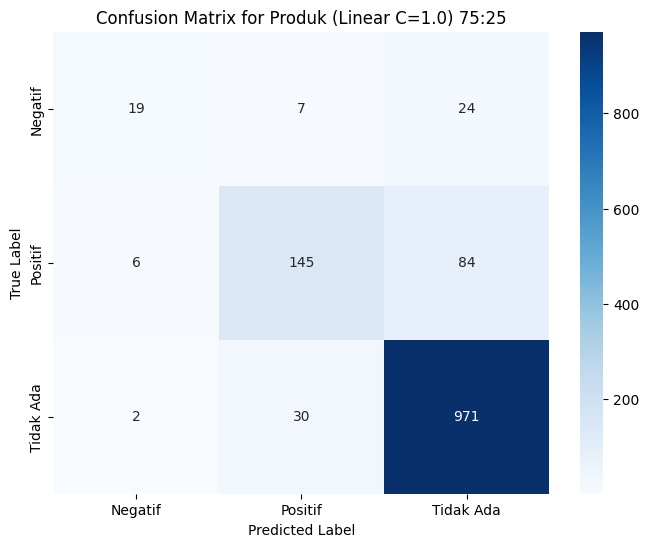

In [ ]:
# prompt: evaluasi grafik confusion matrix pada skenario # Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0
# y_pred_prod_75_linear_1_0 = svm_model_prod_75_linear_1_0.predict(X_test_prod_vec_75)
# print("Classification Report for Produk (Linear C=1.0):")
# print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0))
# print("Accuracy for Produk (Linear C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for Produk (Linear C=1.0) 75:25
cm_prod_75_linear_1_0 = confusion_matrix(y_test_prod_75, y_pred_prod_75_linear_1_0)

# Define class labels (assuming they are 'Negatif', 'Positif', 'Tidak Ada')
class_labels = sorted(y_test_prod_75.unique())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_prod_75_linear_1_0, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Produk (Linear C=1.0) 75:25')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **Data Smote 80 : 20**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# -------------------------- PRODUK --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1 setelah SMOTE
y_pred_prod_80_linear_0_1_smote = svm_model_prod_80_linear_0_1_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Linear C=0.1 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_linear_0_1_smote))
print("Accuracy for Produk (Linear C=0.1 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_linear_0_1_smote))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0 setelah SMOTE
y_pred_prod_80_linear_1_0_smote = svm_model_prod_80_linear_1_0_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Linear C=1.0 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_linear_1_0_smote))
print("Accuracy for Produk (Linear C=1.0 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_linear_1_0_smote))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10 setelah SMOTE
y_pred_prod_80_linear_10_smote = svm_model_prod_80_linear_10_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Linear C=10 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_linear_10_smote))
print("Accuracy for Produk (Linear C=10 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_linear_10_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1 setelah SMOTE
y_pred_prod_80_poly_0_1_smote = svm_model_prod_80_poly_0_1_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Polynomial C=0.1 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_poly_0_1_smote))
print("Accuracy for Produk (Polynomial C=0.1 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_poly_0_1_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0 setelah SMOTE
y_pred_prod_80_poly_1_0_smote = svm_model_prod_80_poly_1_0_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Polynomial C=1.0 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_poly_1_0_smote))
print("Accuracy for Produk (Polynomial C=1.0 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_poly_1_0_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10 setelah SMOTE
y_pred_prod_80_poly_10_smote = svm_model_prod_80_poly_10_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (Polynomial C=10 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_poly_10_smote))
print("Accuracy for Produk (Polynomial C=10 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_poly_10_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1 setelah SMOTE
y_pred_prod_80_rbf_0_1_smote = svm_model_prod_80_rbf_0_1_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (RBF C=0.1 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_rbf_0_1_smote))
print("Accuracy for Produk (RBF C=0.1 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_rbf_0_1_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0 setelah SMOTE
y_pred_prod_80_rbf_1_0_smote = svm_model_prod_80_rbf_1_0_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (RBF C=1.0 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_rbf_1_0_smote))
print("Accuracy for Produk (RBF C=1.0 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_rbf_1_0_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10 setelah SMOTE
y_pred_prod_80_rbf_10_smote = svm_model_prod_80_rbf_10_smote.predict(X_test_prod_vec_80)
print("Classification Report for Produk (RBF C=10 after SMOTE):")
print(classification_report(y_test_prod_80, y_pred_prod_80_rbf_10_smote))
print("Accuracy for Produk (RBF C=10 after SMOTE):", accuracy_score(y_test_prod_80, y_pred_prod_80_rbf_10_smote))

# -------------------------- LAYANAN --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1 setelah SMOTE
y_pred_lay_80_linear_0_1_smote = svm_model_lay_80_linear_0_1_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Linear C=0.1 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_linear_0_1_smote))
print("Accuracy for Layanan (Linear C=0.1 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_linear_0_1_smote))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0 setelah SMOTE
y_pred_lay_80_linear_1_0_smote = svm_model_lay_80_linear_1_0_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Linear C=1.0 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_linear_1_0_smote))
print("Accuracy for Layanan (Linear C=1.0 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_linear_1_0_smote))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10 setelah SMOTE
y_pred_lay_80_linear_10_smote = svm_model_lay_80_linear_10_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Linear C=10 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_linear_10_smote))
print("Accuracy for Layanan (Linear C=10 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_linear_10_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1 setelah SMOTE
y_pred_lay_80_poly_0_1_smote = svm_model_lay_80_poly_0_1_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Polynomial C=0.1 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_poly_0_1_smote))
print("Accuracy for Layanan (Polynomial C=0.1 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_poly_0_1_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0 setelah SMOTE
y_pred_lay_80_poly_1_0_smote = svm_model_lay_80_poly_1_0_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Polynomial C=1.0 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_poly_1_0_smote))
print("Accuracy for Layanan (Polynomial C=1.0 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_poly_1_0_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10 setelah SMOTE
y_pred_lay_80_poly_10_smote = svm_model_lay_80_poly_10_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (Polynomial C=10 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_poly_10_smote))
print("Accuracy for Layanan (Polynomial C=10 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_poly_10_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1 setelah SMOTE
y_pred_lay_80_rbf_0_1_smote = svm_model_lay_80_rbf_0_1_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (RBF C=0.1 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_rbf_0_1_smote))
print("Accuracy for Layanan (RBF C=0.1 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_rbf_0_1_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0 setelah SMOTE
y_pred_lay_80_rbf_1_0_smote = svm_model_lay_80_rbf_1_0_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (RBF C=1.0 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_rbf_1_0_smote))
print("Accuracy for Layanan (RBF C=1.0 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_rbf_1_0_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10 setelah SMOTE
y_pred_lay_80_rbf_10_smote = svm_model_lay_80_rbf_10_smote.predict(X_test_lay_vec_80)
print("Classification Report for Layanan (RBF C=10 after SMOTE):")
print(classification_report(y_test_lay_80, y_pred_lay_80_rbf_10_smote))
print("Accuracy for Layanan (RBF C=10 after SMOTE):", accuracy_score(y_test_lay_80, y_pred_lay_80_rbf_10_smote))

# -------------------------- FUNGIONAL APLIKASI --------------------------

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 0.1 setelah SMOTE
y_pred_fung_80_linear_0_1_smote = svm_model_fung_80_linear_0_1_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Linear C=0.1 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_linear_0_1_smote))
print("Accuracy for Fungsional Aplikasi (Linear C=0.1 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_linear_0_1_smote))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 1.0 setelah SMOTE
y_pred_fung_80_linear_1_0_smote = svm_model_fung_80_linear_1_0_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Linear C=1.0 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_linear_1_0_smote))
print("Accuracy for Fungsional Aplikasi (Linear C=1.0 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_linear_1_0_smote))

# Prediksi dan Classification Report untuk Kernel Linear dengan C = 10 setelah SMOTE
y_pred_fung_80_linear_10_smote = svm_model_fung_80_linear_10_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Linear C=10 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_linear_10_smote))
print("Accuracy for Fungsional Aplikasi (Linear C=10 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_linear_10_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 0.1 setelah SMOTE
y_pred_fung_80_poly_0_1_smote = svm_model_fung_80_poly_0_1_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Polynomial C=0.1 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_poly_0_1_smote))
print("Accuracy for Fungsional Aplikasi (Polynomial C=0.1 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_poly_0_1_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 1.0 setelah SMOTE
y_pred_fung_80_poly_1_0_smote = svm_model_fung_80_poly_1_0_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Polynomial C=1.0 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_poly_1_0_smote))
print("Accuracy for Fungsional Aplikasi (Polynomial C=1.0 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_poly_1_0_smote))

# Prediksi dan Classification Report untuk Kernel Polynomial dengan C = 10 setelah SMOTE
y_pred_fung_80_poly_10_smote = svm_model_fung_80_poly_10_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (Polynomial C=10 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_poly_10_smote))
print("Accuracy for Fungsional Aplikasi (Polynomial C=10 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_poly_10_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 0.1 setelah SMOTE
y_pred_fung_80_rbf_0_1_smote = svm_model_fung_80_rbf_0_1_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (RBF C=0.1 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_rbf_0_1_smote))
print("Accuracy for Fungsional Aplikasi (RBF C=0.1 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_rbf_0_1_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 1.0 setelah SMOTE
y_pred_fung_80_rbf_1_0_smote = svm_model_fung_80_rbf_1_0_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (RBF C=1.0 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_rbf_1_0_smote))
print("Accuracy for Fungsional Aplikasi (RBF C=1.0 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_rbf_1_0_smote))

# Prediksi dan Classification Report untuk Kernel RBF dengan C = 10 setelah SMOTE
y_pred_fung_80_rbf_10_smote = svm_model_fung_80_rbf_10_smote.predict(X_test_fung_vec_80)
print("Classification Report for Fungsional Aplikasi (RBF C=10 after SMOTE):")
print(classification_report(y_test_fung_80, y_pred_fung_80_rbf_10_smote))
print("Accuracy for Fungsional Aplikasi (RBF C=10 after SMOTE):", accuracy_score(y_test_fung_80, y_pred_fung_80_rbf_10_smote))


Classification Report for Produk (Linear C=0.1 after SMOTE):
              precision    recall  f1-score   support

     Negatif       0.47      0.82      0.60        45
     Positif       0.53      0.80      0.63       186
   Tidak Ada       0.96      0.81      0.88       799

    accuracy                           0.81      1030
   macro avg       0.65      0.81      0.70      1030
weighted avg       0.86      0.81      0.82      1030

Accuracy for Produk (Linear C=0.1 after SMOTE): 0.8058252427184466
Classification Report for Produk (Linear C=1.0 after SMOTE):
              precision    recall  f1-score   support

     Negatif       0.51      0.78      0.62        45
     Positif       0.62      0.82      0.71       186
   Tidak Ada       0.96      0.86      0.91       799

    accuracy                           0.85      1030
   macro avg       0.70      0.82      0.75      1030
weighted avg       0.88      0.85      0.86      1030

Accuracy for Produk (Linear C=1.0 after SMOTE): 0

### **Data Smote 75 : 25**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# ------------------ Produk ------------------

# Kernel Linear dengan C = 0.1 setelah SMOTE
y_pred_prod_75_linear_0_1_smote = svm_model_prod_75_linear_0_1_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Linear C=0.1 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_0_1_smote))
print("Accuracy for Produk (Linear C=0.1 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_0_1_smote))

# Kernel Linear dengan C = 1.0 setelah SMOTE
y_pred_prod_75_linear_1_0_smote = svm_model_prod_75_linear_1_0_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Linear C=1.0 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))
print("Accuracy for Produk (Linear C=1.0 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))

# Kernel Linear dengan C = 10 setelah SMOTE
y_pred_prod_75_linear_10_smote = svm_model_prod_75_linear_10_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Linear C=10 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_10_smote))
print("Accuracy for Produk (Linear C=10 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_10_smote))

# Kernel Polynomial dengan C = 0.1 setelah SMOTE
y_pred_prod_75_poly_0_1_smote = svm_model_prod_75_poly_0_1_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Polynomial C=0.1 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_poly_0_1_smote))
print("Accuracy for Produk (Polynomial C=0.1 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_poly_0_1_smote))

# Kernel Polynomial dengan C = 1.0 setelah SMOTE
y_pred_prod_75_poly_1_0_smote = svm_model_prod_75_poly_1_0_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Polynomial C=1.0 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_poly_1_0_smote))
print("Accuracy for Produk (Polynomial C=1.0 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_poly_1_0_smote))

# Kernel Polynomial dengan C = 10 setelah SMOTE
y_pred_prod_75_poly_10_smote = svm_model_prod_75_poly_10_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (Polynomial C=10 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_poly_10_smote))
print("Accuracy for Produk (Polynomial C=10 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_poly_10_smote))

# Kernel RBF dengan C = 0.1 setelah SMOTE
y_pred_prod_75_rbf_0_1_smote = svm_model_prod_75_rbf_0_1_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (RBF C=0.1 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_rbf_0_1_smote))
print("Accuracy for Produk (RBF C=0.1 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_rbf_0_1_smote))

# Kernel RBF dengan C = 1.0 setelah SMOTE
y_pred_prod_75_rbf_1_0_smote = svm_model_prod_75_rbf_1_0_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (RBF C=1.0 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_rbf_1_0_smote))
print("Accuracy for Produk (RBF C=1.0 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_rbf_1_0_smote))

# Kernel RBF dengan C = 10 setelah SMOTE
y_pred_prod_75_rbf_10_smote = svm_model_prod_75_rbf_10_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (RBF C=10 after SMOTE):")
print(classification_report(y_test_prod_75, y_pred_prod_75_rbf_10_smote))
print("Accuracy for Produk (RBF C=10 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_rbf_10_smote))

# ------------------ Layanan ------------------

# Kernel Linear dengan C = 0.1 setelah SMOTE
y_pred_lay_75_linear_0_1_smote = svm_model_lay_75_linear_0_1_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Linear C=0.1 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_linear_0_1_smote))
print("Accuracy for Layanan (Linear C=0.1 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_linear_0_1_smote))

# Kernel Linear dengan C = 1.0 setelah SMOTE
y_pred_lay_75_linear_1_0_smote = svm_model_lay_75_linear_1_0_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Linear C=1.0 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_linear_1_0_smote))
print("Accuracy for Layanan (Linear C=1.0 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_linear_1_0_smote))

# Kernel Linear dengan C = 10 setelah SMOTE
y_pred_lay_75_linear_10_smote = svm_model_lay_75_linear_10_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Linear C=10 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_linear_10_smote))
print("Accuracy for Layanan (Linear C=10 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_linear_10_smote))

# Kernel Polynomial dengan C = 0.1 setelah SMOTE
y_pred_lay_75_poly_0_1_smote = svm_model_lay_75_poly_0_1_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Polynomial C=0.1 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_poly_0_1_smote))
print("Accuracy for Layanan (Polynomial C=0.1 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_poly_0_1_smote))

# Kernel Polynomial dengan C = 1.0 setelah SMOTE
y_pred_lay_75_poly_1_0_smote = svm_model_lay_75_poly_1_0_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Polynomial C=1.0 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_poly_1_0_smote))
print("Accuracy for Layanan (Polynomial C=1.0 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_poly_1_0_smote))

# Kernel Polynomial dengan C = 10 setelah SMOTE
y_pred_lay_75_poly_10_smote = svm_model_lay_75_poly_10_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (Polynomial C=10 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_poly_10_smote))
print("Accuracy for Layanan (Polynomial C=10 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_poly_10_smote))

# Kernel RBF dengan C = 0.1 setelah SMOTE
y_pred_lay_75_rbf_0_1_smote = svm_model_lay_75_rbf_0_1_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (RBF C=0.1 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_0_1_smote))
print("Accuracy for Layanan (RBF C=0.1 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_0_1_smote))

# Kernel RBF dengan C = 1.0 setelah SMOTE
y_pred_lay_75_rbf_1_0_smote = svm_model_lay_75_rbf_1_0_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (RBF C=1.0 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_1_0_smote))
print("Accuracy for Layanan (RBF C=1.0 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_1_0_smote))

# Kernel RBF dengan C = 10 setelah SMOTE
y_pred_lay_75_rbf_10_smote = svm_model_lay_75_rbf_10_smote.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (RBF C=10 after SMOTE):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_10_smote))
print("Accuracy for Layanan (RBF C=10 after SMOTE):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_10_smote))

# ------------------ Fungsional Aplikasi ------------------

# Kernel Linear dengan C = 0.1 setelah SMOTE
y_pred_fung_75_linear_0_1_smote = svm_model_fung_75_linear_0_1_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Linear C=0.1 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_0_1_smote))
print("Accuracy for Fungsional Aplikasi (Linear C=0.1 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_0_1_smote))

# Kernel Linear dengan C = 1.0 setelah SMOTE
y_pred_fung_75_linear_1_0_smote = svm_model_fung_75_linear_1_0_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Linear C=1.0 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_1_0_smote))
print("Accuracy for Fungsional Aplikasi (Linear C=1.0 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_1_0_smote))

# Kernel Linear dengan C = 10 setelah SMOTE
y_pred_fung_75_linear_10_smote = svm_model_fung_75_linear_10_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Linear C=10 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_10_smote))
print("Accuracy for Fungsional Aplikasi (Linear C=10 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_10_smote))

# Kernel Polynomial dengan C = 0.1 setelah SMOTE
y_pred_fung_75_poly_0_1_smote = svm_model_fung_75_poly_0_1_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Polynomial C=0.1 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_poly_0_1_smote))
print("Accuracy for Fungsional Aplikasi (Polynomial C=0.1 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_poly_0_1_smote))

# Kernel Polynomial dengan C = 1.0 setelah SMOTE
y_pred_fung_75_poly_1_0_smote = svm_model_fung_75_poly_1_0_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Polynomial C=1.0 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_poly_1_0_smote))
print("Accuracy for Fungsional Aplikasi (Polynomial C=1.0 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_poly_1_0_smote))

# Kernel Polynomial dengan C = 10 setelah SMOTE
y_pred_fung_75_poly_10_smote = svm_model_fung_75_poly_10_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (Polynomial C=10 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_poly_10_smote))
print("Accuracy for Fungsional Aplikasi (Polynomial C=10 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_poly_10_smote))

# Kernel RBF dengan C = 0.1 setelah SMOTE
y_pred_fung_75_rbf_0_1_smote = svm_model_fung_75_rbf_0_1_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (RBF C=0.1 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_rbf_0_1_smote))
print("Accuracy for Fungsional Aplikasi (RBF C=0.1 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_rbf_0_1_smote))

# Kernel RBF dengan C = 1.0 setelah SMOTE
y_pred_fung_75_rbf_1_0_smote = svm_model_fung_75_rbf_1_0_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (RBF C=1.0 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_rbf_1_0_smote))
print("Accuracy for Fungsional Aplikasi (RBF C=1.0 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_rbf_1_0_smote))

# Kernel RBF dengan C = 10 setelah SMOTE
y_pred_fung_75_rbf_10_smote = svm_model_fung_75_rbf_10_smote.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (RBF C=10 after SMOTE):")
print(classification_report(y_test_fung_75, y_pred_fung_75_rbf_10_smote))
print("Accuracy for Fungsional Aplikasi (RBF C=10 after SMOTE):", accuracy_score(y_test_fung_75, y_pred_fung_75_rbf_10_smote))


Classification Report for Produk (Linear C=0.1 after SMOTE):
              precision    recall  f1-score   support

     Negatif       0.43      0.84      0.57        50
     Positif       0.54      0.80      0.65       235
   Tidak Ada       0.96      0.81      0.88      1003

    accuracy                           0.81      1288
   macro avg       0.65      0.82      0.70      1288
weighted avg       0.87      0.81      0.83      1288

Accuracy for Produk (Linear C=0.1 after SMOTE): 0.8105590062111802
Classification Report for Produk (Linear C=1.0 after SMOTE):
              precision    recall  f1-score   support

     Negatif       0.48      0.78      0.59        50
     Positif       0.64      0.84      0.73       235
   Tidak Ada       0.97      0.87      0.91      1003

    accuracy                           0.86      1288
   macro avg       0.70      0.83      0.75      1288
weighted avg       0.89      0.86      0.87      1288

Accuracy for Produk (Linear C=1.0 after SMOTE): 0

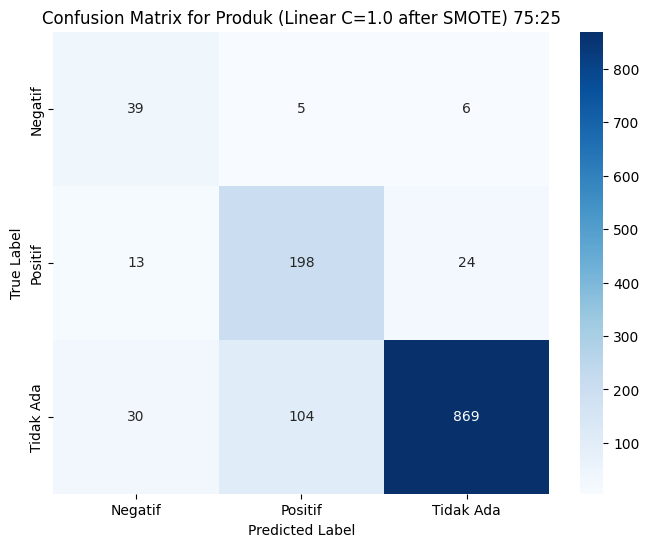

In [ ]:
# prompt: buat grafik confusion matrix pada skenario
# # Kernel Linear dengan C = 1.0 setelah SMOTE
# y_pred_prod_75_linear_1_0_smote = svm_model_prod_75_linear_1_0_smote.predict(X_test_prod_vec_75)
# print("Classification Report for Produk (Linear C=1.0 after SMOTE):")
# print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))
# print("Accuracy for Produk (Linear C=1.0 after SMOTE):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))

# Generate confusion matrix for Produk (Linear C=1.0 after SMOTE) 75:25
cm_prod_75_linear_1_0_smote = confusion_matrix(y_test_prod_75, y_pred_prod_75_linear_1_0_smote)

# Define class labels (assuming they are 'Negatif', 'Positif', 'Tidak Ada')
# It's safer to get the unique labels from both the true and predicted values
all_labels = sorted(list(set(y_test_prod_75.unique()) | set(y_pred_prod_75_linear_1_0_smote)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_prod_75_linear_1_0_smote, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix for Produk (Linear C=1.0 after SMOTE) 75:25')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **MODEL TERBAIK**

**Mengambil Dataset Model Untuk Pelatihan Model Terbaik**

In [ ]:
!pip install gdown
import gdown
# File ID dari Google Drive
file_id = '1VlD4HgClOveuwYti5Dprg50DzbmVZU4C'

# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Dataset_Model_Fix.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C
To: /content/Dataset_Model_Fix.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 54.0MB/s]


'Dataset_Model_Fix.csv'

**Eksplorasi Dataset Model**

In [ ]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('Dataset_Model_Fix.csv', encoding='latin1')

# Cek jumlah data (baris dan kolom)
print(f"Jumlah data (baris, kolom): {df.shape}")  # Menampilkan jumlah baris dan kolom

df.head()

Jumlah data (baris, kolom): (5149, 7)


,Stemming Text,Rating,Review Text,Produk,Layanan,Fungsional Aplikasi,Sentiment_Combined
0,['manfaat'],5,"sangat bermanfaat,,",Tidak Ada,Tidak Ada,Positif,Tidak Ada_Tidak Ada_Positif
1,"['bantu', 'produk', 'produk', 'promosi', 'bela...",5,sangat membantu untuk melihat produk produk ya...,Tidak Ada,Positif,Positif,Tidak Ada_Positif_Positif
2,"['alamat', 'toko', 'guna', 'aplikasi', 'layan'...",1,di alamat sy tdk bisa di gunakan krn tdk ada t...,Tidak Ada,Tidak Ada,Negatif,Tidak Ada_Tidak Ada_Negatif
3,"['belanja', 'pakai', 'jempol', 'doang', 'pesan...",5,"belanja pake jempol doang, bisa pesen apa aja ...",Tidak Ada,Tidak Ada,Positif,Tidak Ada_Tidak Ada_Positif
4,"['ngantar', 'pesan', 'cepat', 'rumit']",5,ngantar pesanan cepat dan gak ribet,Tidak Ada,Positif,Positif,Tidak Ada_Positif_Positif


**Pemisahan Fitur dan Target untuk Klasifikasi Teks**

In [ ]:
y_produk = df['Produk']
X_produk = df['Stemming Text']

y_layanan = df['Layanan']
X_layanan = df['Stemming Text']

y_fungsional = df['Fungsional Aplikasi']
X_fungsional = df['Stemming Text']

**Pembagian Data Latih dan Uji untuk Klasifikasi Teks**

**-- Model Terbaik Pada Masing-Masing Aspek --**
1. Model Aspek Produk --> Pembagian Data 75:25 Menggunakan SMOTE Kernel Linear C = 1
2. Model Aspek Layanan = Pembagian Data 75:25 Data Normal Kernel RBF C = 10
3. Mode Aspek Fungsional Aplikasi = Pembagian Data 75:25 Data Normal Kernel Linear C = 1


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji untuk 75:25
X_train_prod_75, X_test_prod_75, y_train_prod_75, y_test_prod_75 = train_test_split(X_produk, y_produk, test_size=0.25, random_state=42)
X_train_lay_75, X_test_lay_75, y_train_lay_75, y_test_lay_75 = train_test_split(X_layanan, y_layanan, test_size=0.25, random_state=42)
X_train_fung_75, X_test_fung_75, y_train_fung_75, y_test_fung_75 = train_test_split(X_fungsional, y_fungsional, test_size=0.25, random_state=42)


**Tranformasi Data Menggunakan TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
vectorizer = TfidfVectorizer()

# TF-IDF Produk
X_train_prod_vec_75 = vectorizer.fit_transform(X_train_prod_75)
X_test_prod_vec_75 = vectorizer.transform(X_test_prod_75)

smote_prod = SMOTE(random_state=42)
X_train_prod_resampled, y_train_prod_resampled = smote_prod.fit_resample(X_train_prod_vec_75, y_train_prod_75)

# TF-IDF Layanan
X_train_lay_vec_75 = vectorizer.fit_transform(X_train_lay_75)
X_test_lay_vec_75 = vectorizer.transform(X_test_lay_75)

# TF-IDF Fungsional Aplikasi
X_train_fung_vec_75 = vectorizer.fit_transform(X_train_fung_75)
X_test_fung_vec_75 = vectorizer.transform(X_test_fung_75)


**Pembuatan Model Menggunakan Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

# Model Produk 75:25 Kernel Linear dan C = 1.0
svm_model_prod_75_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Model Layanan 75:25 Kernel RBF dan C = 10
svm_model_lay_75_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_lay_75_rbf_10.fit(X_train_lay_vec_75, y_train_lay_75)

# Model Fungsional Aplikasi 75:25 Kernel Linear dan C = 1.0
svm_model_fung_75_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_fung_75_linear_1_0.fit(X_train_fung_vec_75, y_train_fung_75)


SVC(kernel='linear')

**Evaluasi Classification Report**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi Model Produk (75:25, SMOTE, Kernel Linear, C=1.0)
y_pred_prod_75_linear_1_0_smote = svm_model_prod_75_linear_1_0_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (75:25, SMOTE, Linear, C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))
print("Accuracy for Produk (75:25, SMOTE, Linear, C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))


# Evaluasi Model Layanan (75:25, Kernel RBF, C=10)
y_pred_lay_75_rbf_10 = svm_model_lay_75_rbf_10.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (75:25, RBF, C=10):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_10))
print("Accuracy for Layanan (75:25, RBF, C=10):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_10))


# Evaluasi Model Fungsional Aplikasi (75:25, Kernel Linear, C=1.0)
y_pred_fung_75_linear_1_0 = svm_model_fung_75_linear_1_0.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (75:25, Linear, C=1.0):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_1_0))
print("Accuracy for Fungsional Aplikasi (75:25, Linear, C=1.0):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_1_0))


Classification Report for Produk (75:25, SMOTE, Linear, C=1.0):
              precision    recall  f1-score   support

     Negatif       0.48      0.78      0.59        50
     Positif       0.64      0.84      0.73       235
   Tidak Ada       0.97      0.87      0.91      1003

    accuracy                           0.86      1288
   macro avg       0.70      0.83      0.75      1288
weighted avg       0.89      0.86      0.87      1288

Accuracy for Produk (75:25, SMOTE, Linear, C=1.0): 0.8586956521739131
Classification Report for Layanan (75:25, RBF, C=10):
              precision    recall  f1-score   support

     Negatif       0.86      0.75      0.80        88
     Positif       0.86      0.89      0.87       606
   Tidak Ada       0.86      0.86      0.86       594

    accuracy                           0.86      1288
   macro avg       0.86      0.83      0.84      1288
weighted avg       0.86      0.86      0.86      1288

Accuracy for Layanan (75:25, RBF, C=10): 0.8625776

**Evaluasi Confusion Matrix**

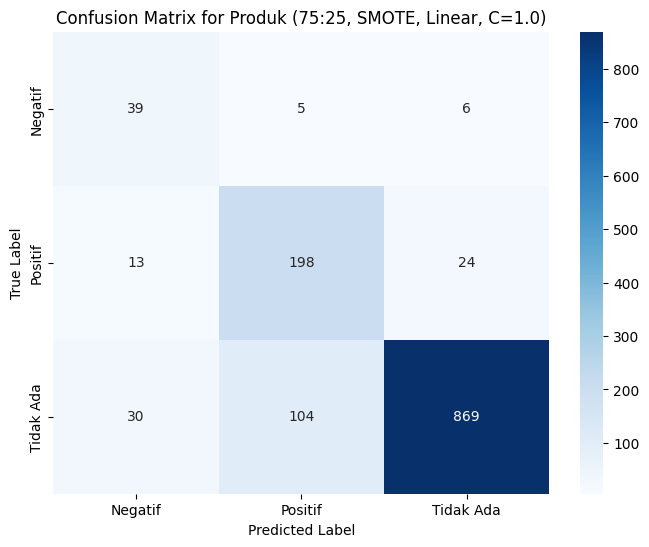

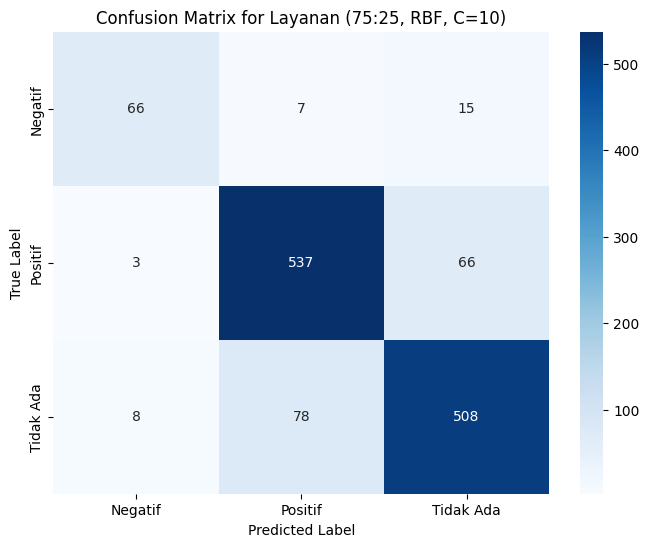

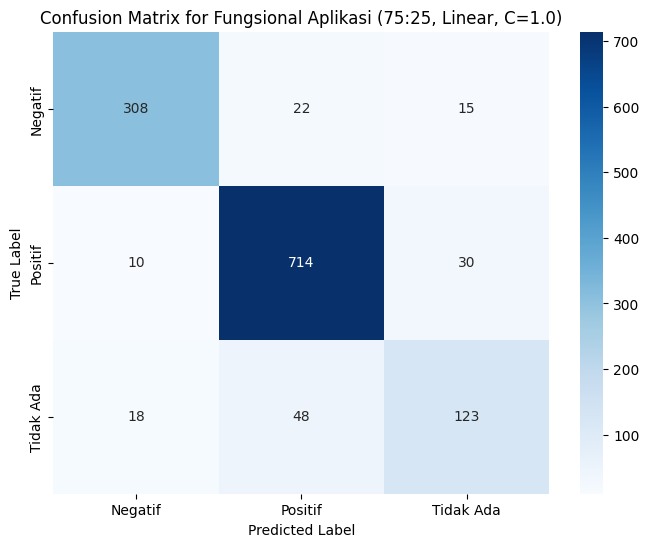

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisi label sentimen
sentiment_labels = ['Negatif', 'Positif', 'Tidak Ada']

# Confusion Matrix for Produk (75:25, SMOTE, Linear, C=1.0)
cm_prod = confusion_matrix(y_test_prod_75, y_pred_prod_75_linear_1_0_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_prod, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix for Produk (75:25, SMOTE, Linear, C=1.0)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Layanan (75:25, RBF, C=10)
cm_lay = confusion_matrix(y_test_lay_75, y_pred_lay_75_rbf_10)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lay, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix for Layanan (75:25, RBF, C=10)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Fungsional Aplikasi (75:25, Linear, C=1.0)
cm_fung = confusion_matrix(y_test_fung_75, y_pred_fung_75_linear_1_0)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_fung, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix for Fungsional Aplikasi (75:25, Linear, C=1.0)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Cek Resampling ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN

# Resampling menggunakan ADASYN
adasyn_prod = ADASYN(random_state=42)

# Melakukan resampling pada data pelatihan
X_train_prod_resampled_adasyn, y_train_prod_resampled_adasyn = adasyn_prod.fit_resample(X_train_prod_vec_75, y_train_prod_75)

# Model Produk 75:25 Kernel Linear dan C = 1.0 dengan ADASYN
svm_model_prod_75_linear_1_0_adasyn = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0_adasyn.fit(X_train_prod_resampled_adasyn, y_train_prod_resampled_adasyn)

# Evaluasi Model Produk (75:25, ADASYN, Kernel Linear, C=1.0)
y_pred_prod_75_linear_1_0_adasyn = svm_model_prod_75_linear_1_0_adasyn.predict(X_test_prod_vec_75)
print("Classification Report for Produk (75:25, ADASYN, Linear, C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_adasyn))
print("Accuracy for Produk (75:25, ADASYN, Linear, C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_adasyn))


Classification Report for Produk (75:25, ADASYN, Linear, C=1.0):
              precision    recall  f1-score   support

     Negatif       0.47      0.74      0.58        50
     Positif       0.62      0.84      0.71       235
   Tidak Ada       0.97      0.86      0.91      1003

    accuracy                           0.85      1288
   macro avg       0.69      0.81      0.73      1288
weighted avg       0.88      0.85      0.86      1288

Accuracy for Produk (75:25, ADASYN, Linear, C=1.0): 0.8486024844720497


**Cek Resampling TomekLinks**

In [ ]:
from imblearn.under_sampling import TomekLinks

# Resampling menggunakan Tomek Links
tomek_links_prod = TomekLinks()

# Melakukan under-sampling pada data pelatihan
X_train_prod_resampled_tl, y_train_prod_resampled_tl = tomek_links_prod.fit_resample(X_train_prod_vec_75, y_train_prod_75)

# Model Produk 75:25 Kernel Linear dan C = 1.0 dengan Tomek Links
svm_model_prod_75_linear_1_0_tl = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0_tl.fit(X_train_prod_resampled_tl, y_train_prod_resampled_tl)

# Evaluasi Model Produk (75:25, Tomek Links, Kernel Linear, C=1.0)
y_pred_prod_75_linear_1_0_tl = svm_model_prod_75_linear_1_0_tl.predict(X_test_prod_vec_75)
print("Classification Report for Produk (75:25, Tomek Links, Linear, C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_tl))
print("Accuracy for Produk (75:25, Tomek Links, Linear, C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_tl))


Classification Report for Produk (75:25, Tomek Links, Linear, C=1.0):
              precision    recall  f1-score   support

     Negatif       0.62      0.42      0.50        50
     Positif       0.78      0.60      0.68       235
   Tidak Ada       0.90      0.96      0.93      1003

    accuracy                           0.88      1288
   macro avg       0.77      0.66      0.70      1288
weighted avg       0.87      0.88      0.87      1288

Accuracy for Produk (75:25, Tomek Links, Linear, C=1.0): 0.8773291925465838


**Cek Resampling RandomOverSampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Resampling menggunakan Random Over-sampling
random_oversampler_prod = RandomOverSampler(random_state=42)

# Melakukan resampling pada data pelatihan
X_train_prod_resampled_ro, y_train_prod_resampled_ro = random_oversampler_prod.fit_resample(X_train_prod_vec_75, y_train_prod_75)

# Model Produk 75:25 Kernel Linear dan C = 1.0 dengan Random Over-sampling
svm_model_prod_75_linear_1_0_ro = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0_ro.fit(X_train_prod_resampled_ro, y_train_prod_resampled_ro)

# Evaluasi Model Produk (75:25, Random Over-sampling, Kernel Linear, C=1.0)
y_pred_prod_75_linear_1_0_ro = svm_model_prod_75_linear_1_0_ro.predict(X_test_prod_vec_75)
print("Classification Report for Produk (75:25, Random Over-sampling, Linear, C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_ro))
print("Accuracy for Produk (75:25, Random Over-sampling, Linear, C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_ro))


Classification Report for Produk (75:25, Random Over-sampling, Linear, C=1.0):
              precision    recall  f1-score   support

     Negatif       0.52      0.74      0.61        50
     Positif       0.67      0.72      0.70       235
   Tidak Ada       0.94      0.90      0.92      1003

    accuracy                           0.86      1288
   macro avg       0.71      0.79      0.74      1288
weighted avg       0.87      0.86      0.87      1288

Accuracy for Produk (75:25, Random Over-sampling, Linear, C=1.0): 0.8625776397515528


# **MEMBANDINGKAN DATASET MODEL & VALIDASI**

In [ ]:
!pip install gdown
import gdown

# Download dataset model
gdown.download('https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C', 'Dataset_Model_Cek.csv', quiet=False)

# Load dataset
import pandas as pd
df = pd.read_csv('Dataset_Model_Cek.csv', encoding='latin1')

Downloading...
From: https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C
To: /content/Dataset_Model_Cek.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 73.0MB/s]


**Melatih Mode Terbaik**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Ambil label Produk
X_produk = df['Stemming Text']
y_produk = df['Produk']

y_layanan = df['Layanan']
X_layanan = df['Stemming Text']

y_fungsional = df['Fungsional Aplikasi']
X_fungsional = df['Stemming Text']

# Split 75:25
X_train_prod_75, X_test_prod_75, y_train_prod_75, y_test_prod_75 = train_test_split(X_produk, y_produk, test_size=0.25, random_state=42)
X_train_lay_75, X_test_lay_75, y_train_lay_75, y_test_lay_75 = train_test_split(X_layanan, y_layanan, test_size=0.25, random_state=42)
X_train_fung_75, X_test_fung_75, y_train_fung_75, y_test_fung_75 = train_test_split(X_fungsional, y_fungsional, test_size=0.25, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer()

# TF-IDF Produk
X_train_prod_vec_75 = vectorizer.fit_transform(X_train_prod_75)
X_test_prod_vec_75 = vectorizer.transform(X_test_prod_75)

smote_prod = SMOTE(random_state=42)
X_train_prod_resampled, y_train_prod_resampled = smote_prod.fit_resample(X_train_prod_vec_75, y_train_prod_75)

# TF-IDF Layanan
X_train_lay_vec_75 = vectorizer.fit_transform(X_train_lay_75)
X_test_lay_vec_75 = vectorizer.transform(X_test_lay_75)

# TF-IDF Fungsional Aplikasi
X_train_fung_vec_75 = vectorizer.fit_transform(X_train_fung_75)
X_test_fung_vec_75 = vectorizer.transform(X_test_fung_75)

In [ ]:
from sklearn.svm import SVC

# Model Produk 75:25 Kernel Linear dan C = 1.0
svm_model_prod_75_linear_1_0_smote = SVC(kernel='linear', C=1.0)
svm_model_prod_75_linear_1_0_smote.fit(X_train_prod_resampled, y_train_prod_resampled)

# Model Layanan 75:25 Kernel RBF dan C = 10
svm_model_lay_75_rbf_10 = SVC(kernel='rbf', C=10)
svm_model_lay_75_rbf_10.fit(X_train_lay_vec_75, y_train_lay_75)

# Model Fungsional Aplikasi 75:25 Kernel Linear dan C = 1.0
svm_model_fung_75_linear_1_0 = SVC(kernel='linear', C=1.0)
svm_model_fung_75_linear_1_0.fit(X_train_fung_vec_75, y_train_fung_75)

SVC(kernel='linear')

**Cek F1 Score Model**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi Model Produk (75:25, SMOTE, Kernel Linear, C=1.0)
y_pred_prod_75_linear_1_0_smote = svm_model_prod_75_linear_1_0_smote.predict(X_test_prod_vec_75)
print("Classification Report for Produk (75:25, SMOTE, Linear, C=1.0):")
print(classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))
print("Accuracy for Produk (75:25, SMOTE, Linear, C=1.0):", accuracy_score(y_test_prod_75, y_pred_prod_75_linear_1_0_smote))


# Evaluasi Model Layanan (75:25, Kernel RBF, C=10)
y_pred_lay_75_rbf_10 = svm_model_lay_75_rbf_10.predict(X_test_lay_vec_75)
print("Classification Report for Layanan (75:25, RBF, C=10):")
print(classification_report(y_test_lay_75, y_pred_lay_75_rbf_10))
print("Accuracy for Layanan (75:25, RBF, C=10):", accuracy_score(y_test_lay_75, y_pred_lay_75_rbf_10))


# Evaluasi Model Fungsional Aplikasi (75:25, Kernel Linear, C=1.0)
y_pred_fung_75_linear_1_0 = svm_model_fung_75_linear_1_0.predict(X_test_fung_vec_75)
print("Classification Report for Fungsional Aplikasi (75:25, Linear, C=1.0):")
print(classification_report(y_test_fung_75, y_pred_fung_75_linear_1_0))
print("Accuracy for Fungsional Aplikasi (75:25, Linear, C=1.0):", accuracy_score(y_test_fung_75, y_pred_fung_75_linear_1_0))

Classification Report for Produk (75:25, SMOTE, Linear, C=1.0):
              precision    recall  f1-score   support

     Negatif       0.48      0.78      0.59        50
     Positif       0.64      0.84      0.73       235
   Tidak Ada       0.97      0.87      0.91      1003

    accuracy                           0.86      1288
   macro avg       0.70      0.83      0.75      1288
weighted avg       0.89      0.86      0.87      1288

Accuracy for Produk (75:25, SMOTE, Linear, C=1.0): 0.8586956521739131
Classification Report for Layanan (75:25, RBF, C=10):
              precision    recall  f1-score   support

     Negatif       0.86      0.75      0.80        88
     Positif       0.86      0.89      0.87       606
   Tidak Ada       0.86      0.86      0.86       594

    accuracy                           0.86      1288
   macro avg       0.86      0.83      0.84      1288
weighted avg       0.86      0.86      0.86      1288

Accuracy for Layanan (75:25, RBF, C=10): 0.8625776

**Cek F1 Score Validasi**

In [ ]:
# Download dataset validasi
gdown.download('https://drive.google.com/uc?id=1swPjVmrzTeeMRRNxRNCNa78zSBjhhKsH', 'Dataset_Validasi_Cek.csv', quiet=False)

# Load dataset validasi
df_val = pd.read_csv('Dataset_Validasi_Cek.csv', encoding='latin1')

X_val_produk = df_val['Stemming Text']
y_val_produk = df_val['Produk']

y_val_layanan = df_val['Layanan']
X_val_layanan = df_val['Stemming Text']

y_val_fungsional = df_val['Fungsional Aplikasi']
X_val_fungsional = df_val['Stemming Text']

# TF-IDF Produk
X_val_prod_vec_75 = vectorizer.transform(X_val_produk)

# TF-IDF Layanan
X_val_lay_vec_75 = vectorizer.transform(X_val_layanan)

# TF-IDF Fungsional Aplikasi
X_val_fung_vec_75 = vectorizer.transform(X_val_fungsional)

# === PRODUK ===
y_pred_val_produk = svm_model_prod_75_linear_1_0_smote.predict(X_val_prod_vec_75)
print("\nEvaluasi Dataset Validasi - Produk:")
print(classification_report(y_val_produk, y_pred_val_produk))
print("Accuracy:", accuracy_score(y_val_produk, y_pred_val_produk))

# === LAYANAN ===
y_pred_val_layanan = svm_model_lay_75_rbf_10.predict(X_val_lay_vec_75)
print("\nEvaluasi Dataset Validasi - Layanan:")
print(classification_report(y_val_layanan, y_pred_val_layanan))
print("Accuracy:", accuracy_score(y_val_layanan, y_pred_val_layanan))

# === FUNGSIONAL APLIKASI ===
y_pred_val_fungsional = svm_model_fung_75_linear_1_0.predict(X_val_fung_vec_75)
print("\nEvaluasi Dataset Validasi - Fungsional Aplikasi:")
print(classification_report(y_val_fungsional, y_pred_val_fungsional))
print("Accuracy:", accuracy_score(y_val_fungsional, y_pred_val_fungsional))


Downloading...
From: https://drive.google.com/uc?id=1swPjVmrzTeeMRRNxRNCNa78zSBjhhKsH
To: /content/Dataset_Validasi_Cek.csv
100%|██████████| 111k/111k [00:00<00:00, 58.5MB/s]



Evaluasi Dataset Validasi - Produk:
              precision    recall  f1-score   support

     Negatif       0.44      0.81      0.57        21
     Positif       0.67      0.82      0.74       100
   Tidak Ada       0.97      0.88      0.92       452

    accuracy                           0.87       573
   macro avg       0.69      0.84      0.74       573
weighted avg       0.90      0.87      0.88       573

Accuracy: 0.8673647469458988

Evaluasi Dataset Validasi - Layanan:
              precision    recall  f1-score   support

     Negatif       0.72      0.60      0.66        43
     Positif       0.87      0.87      0.87       275
   Tidak Ada       0.83      0.85      0.84       255

    accuracy                           0.84       573
   macro avg       0.81      0.78      0.79       573
weighted avg       0.84      0.84      0.84       573

Accuracy: 0.8429319371727748

Evaluasi Dataset Validasi - Fungsional Aplikasi:
              precision    recall  f1-score   support



**Cek Overfitting**

In [ ]:
from sklearn.metrics import classification_report

# Fungsi untuk menganalisis overfitting berdasarkan F1-Score (macro avg)
def analyze_overfitting(train_report, val_report, threshold=0.05):
    # Ekstrak F1-Score (macro avg) dari laporan
    train_f1 = float([line for line in train_report.split('\n') if 'macro avg' in line][0].split()[-2])
    val_f1 = float([line for line in val_report.split('\n') if 'macro avg' in line][0].split()[-2])

    # Hitung perbedaan absolut antara F1-Score pelatihan dan validasi
    f1_diff = abs(train_f1 - val_f1)

    # Tentukan status overfitting
    if f1_diff > 0.1:
        return f"Overfitting terdeteksi! Perbedaan F1-Score: {f1_diff:.4f} (Pelatihan: {train_f1:.4f}, Validasi: {val_f1:.4f})"
    elif f1_diff > threshold:
        return f"Kekhawatiran moderat. Perbedaan F1-Score: {f1_diff:.4f} (Pelatihan: {train_f1:.4f}, Validasi: {val_f1:.4f})"
    else:
        return f"Tidak ada overfitting. Perbedaan F1-Score: {f1_diff:.4f} (Pelatihan: {train_f1:.4f}, Validasi: {val_f1:.4f})"

# Contoh penggunaan untuk Produk
train_report_prod = classification_report(y_test_prod_75, y_pred_prod_75_linear_1_0_smote)
val_report_prod = classification_report(y_val_produk, y_pred_val_produk)
print(analyze_overfitting(train_report_prod, val_report_prod))

# Contoh penggunaan untuk Layanan
train_report_lay = classification_report(y_test_lay_75, y_pred_lay_75_rbf_10)
val_report_lay = classification_report(y_val_layanan, y_pred_val_layanan)
print(analyze_overfitting(train_report_lay, val_report_lay))

# Contoh penggunaan untuk Fungsional Aplikasi
train_report_fung = classification_report(y_test_fung_75, y_pred_fung_75_linear_1_0)
val_report_fung = classification_report(y_val_fungsional, y_pred_val_fungsional)
print(analyze_overfitting(train_report_fung, val_report_fung))


Tidak ada overfitting. Perbedaan F1-Score: 0.0100 (Pelatihan: 0.7500, Validasi: 0.7400)
Tidak ada overfitting. Perbedaan F1-Score: 0.0500 (Pelatihan: 0.8400, Validasi: 0.7900)
Tidak ada overfitting. Perbedaan F1-Score: 0.0100 (Pelatihan: 0.8400, Validasi: 0.8500)


**Grafik Perbandingan F1 Score Model VS Validasi**

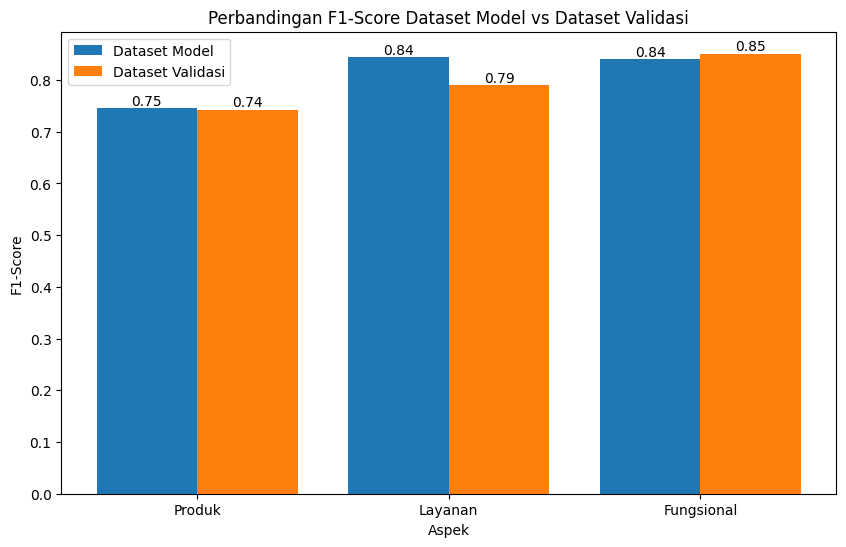

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Calculate F1-scores (assuming actual data is provided)
f1_model_prod = f1_score(y_test_prod_75, y_pred_prod_75_linear_1_0_smote, average='macro')
f1_val_prod = f1_score(y_val_produk, y_pred_val_produk, average='macro')

f1_model_lay = f1_score(y_test_lay_75, y_pred_lay_75_rbf_10, average='macro')
f1_val_lay = f1_score(y_val_layanan, y_pred_val_layanan, average='macro')

f1_model_fung = f1_score(y_test_fung_75, y_pred_fung_75_linear_1_0, average='macro')
f1_val_fung = f1_score(y_val_fungsional, y_pred_val_fungsional, average='macro')

# Data for plotting
aspek = ['Produk', 'Layanan', 'Fungsional']
f1_model = [f1_model_prod, f1_model_lay, f1_model_fung]
f1_validasi = [f1_val_prod, f1_val_lay, f1_val_fung]

X_axis = np.arange(len(aspek))

plt.figure(figsize=(10, 6))

# Create bars
bars_model = plt.bar(X_axis - 0.2, f1_model, 0.4, label='Dataset Model')
bars_validasi = plt.bar(X_axis + 0.2, f1_validasi, 0.4, label='Dataset Validasi')

# Add labels on top of the bars
for bar in bars_model:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_validasi:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Final plot adjustments
plt.xticks(X_axis, aspek)
plt.xlabel("Aspek")
plt.ylabel("F1-Score")
plt.title("Perbandingan F1-Score Dataset Model vs Dataset Validasi")
plt.legend()
plt.show()


**Model Produk VS Validasi Produk**

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

# === PRODUK ===
y_pred_val_produk = svm_model_prod_75_linear_1_0_smote.predict(X_val_prod_vec_75)
print("\nEvaluasi Dataset Validasi - Produk:")
print(classification_report(y_val_produk, y_pred_val_produk))
print("Accuracy:", accuracy_score(y_val_produk, y_pred_val_produk))

# Count sentiments for Produk (menggunakan urutan label: Tidak Ada, Positif, Negatif)
true_neutral_prod = sum((y_val_produk == 'Tidak Ada') & (y_pred_val_produk == 'Tidak Ada'))
true_positive_prod = sum((y_val_produk == 'Positif') & (y_pred_val_produk == 'Positif'))
true_negative_prod = sum((y_val_produk == 'Negatif') & (y_pred_val_produk == 'Negatif'))

print("\nJumlah Sentimen Asli Produk (Validasi):")
print(f"- Tidak Ada: {sum(y_val_produk == 'Tidak Ada')}")
print(f"- Positif: {sum(y_val_produk == 'Positif')}")
print(f"- Negatif: {sum(y_val_produk == 'Negatif')}")

print("\nJumlah Sentimen Hasil Klasifikasi Produk:")
print(f"- Tidak Ada: {sum(y_pred_val_produk == 'Tidak Ada')}")
print(f"- Positif: {sum(y_pred_val_produk == 'Positif')}")
print(f"- Negatif: {sum(y_pred_val_produk == 'Negatif')}")



Evaluasi Dataset Validasi - Produk:
              precision    recall  f1-score   support

     Negatif       0.44      0.81      0.57        21
     Positif       0.67      0.82      0.74       100
   Tidak Ada       0.97      0.88      0.92       452

    accuracy                           0.87       573
   macro avg       0.69      0.84      0.74       573
weighted avg       0.90      0.87      0.88       573

Accuracy: 0.8673647469458988

Jumlah Sentimen Asli Produk (Validasi):
- Tidak Ada: 452
- Positif: 100
- Negatif: 21

Jumlah Sentimen Hasil Klasifikasi Produk:
- Tidak Ada: 412
- Positif: 122
- Negatif: 39


**Model Layanan VS Validasi Layanan**

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

# === LAYANAN ===
y_pred_val_layanan = svm_model_lay_75_rbf_10.predict(X_val_lay_vec_75)
print("\nEvaluasi Dataset Validasi - Layanan:")
print(classification_report(y_val_layanan, y_pred_val_layanan))
print("Accuracy:", accuracy_score(y_val_layanan, y_pred_val_layanan))

# Count sentiments for Layanan (menggunakan urutan label: Tidak Ada, Positif, Negatif)
true_neutral_lay = sum((y_val_layanan == 'Tidak Ada') & (y_pred_val_layanan == 'Tidak Ada'))
true_positive_lay = sum((y_val_layanan == 'Positif') & (y_pred_val_layanan == 'Positif'))
true_negative_lay = sum((y_val_layanan == 'Negatif') & (y_pred_val_layanan == 'Negatif'))

print("\nJumlah Sentimen Asli Layanan (Validasi):")
print(f"- Tidak Ada: {sum(y_val_layanan == 'Tidak Ada')}")
print(f"- Positif: {sum(y_val_layanan == 'Positif')}")
print(f"- Negatif: {sum(y_val_layanan == 'Negatif')}")

print("\nJumlah Sentimen Hasil Klasifikasi Layanan:")
print(f"- Tidak Ada: {sum(y_pred_val_layanan == 'Tidak Ada')}")
print(f"- Positif: {sum(y_pred_val_layanan == 'Positif')}")
print(f"- Negatif: {sum(y_pred_val_layanan == 'Negatif')}")



Evaluasi Dataset Validasi - Layanan:
              precision    recall  f1-score   support

     Negatif       0.72      0.60      0.66        43
     Positif       0.87      0.87      0.87       275
   Tidak Ada       0.83      0.85      0.84       255

    accuracy                           0.84       573
   macro avg       0.81      0.78      0.79       573
weighted avg       0.84      0.84      0.84       573

Accuracy: 0.8429319371727748

Jumlah Sentimen Asli Layanan (Validasi):
- Tidak Ada: 255
- Positif: 275
- Negatif: 43

Jumlah Sentimen Hasil Klasifikasi Layanan:
- Tidak Ada: 262
- Positif: 275
- Negatif: 36


**Model Fungsional VS Validasi Fungsional**

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

# === FUNGSIONAL APLIKASI ===
y_pred_val_fungsional = svm_model_fung_75_linear_1_0.predict(X_val_fung_vec_75)
print("\nEvaluasi Dataset Validasi - Fungsional Aplikasi:")
print(classification_report(y_val_fungsional, y_pred_val_fungsional))
print("Accuracy:", accuracy_score(y_val_fungsional, y_pred_val_fungsional))

# Count sentiments for Fungsional Aplikasi (menggunakan urutan label: Tidak Ada, Positif, Negatif)
true_neutral_fung = sum((y_val_fungsional == 'Tidak Ada') & (y_pred_val_fungsional == 'Tidak Ada'))
true_positive_fung = sum((y_val_fungsional == 'Positif') & (y_pred_val_fungsional == 'Positif'))
true_negative_fung = sum((y_val_fungsional == 'Negatif') & (y_pred_val_fungsional == 'Negatif'))

print("\nJumlah Sentimen Asli Fungsional Aplikasi (Validasi):")
print(f"- Tidak Ada: {sum(y_val_fungsional == 'Tidak Ada')}")
print(f"- Positif: {sum(y_val_fungsional == 'Positif')}")
print(f"- Negatif: {sum(y_val_fungsional == 'Negatif')}")

print("\nJumlah Sentimen Hasil Klasifikasi Fungsional Aplikasi:")
print(f"- Tidak Ada: {sum(y_pred_val_fungsional == 'Tidak Ada')}")
print(f"- Positif: {sum(y_pred_val_fungsional == 'Positif')}")
print(f"- Negatif: {sum(y_pred_val_fungsional == 'Negatif')}")



Evaluasi Dataset Validasi - Fungsional Aplikasi:
              precision    recall  f1-score   support

     Negatif       0.89      0.94      0.91       150
     Positif       0.92      0.95      0.94       340
   Tidak Ada       0.82      0.61      0.70        83

    accuracy                           0.90       573
   macro avg       0.88      0.84      0.85       573
weighted avg       0.90      0.90      0.90       573

Accuracy: 0.900523560209424

Jumlah Sentimen Asli Fungsional Aplikasi (Validasi):
- Tidak Ada: 83
- Positif: 340
- Negatif: 150

Jumlah Sentimen Hasil Klasifikasi Fungsional Aplikasi:
- Tidak Ada: 62
- Positif: 352
- Negatif: 159


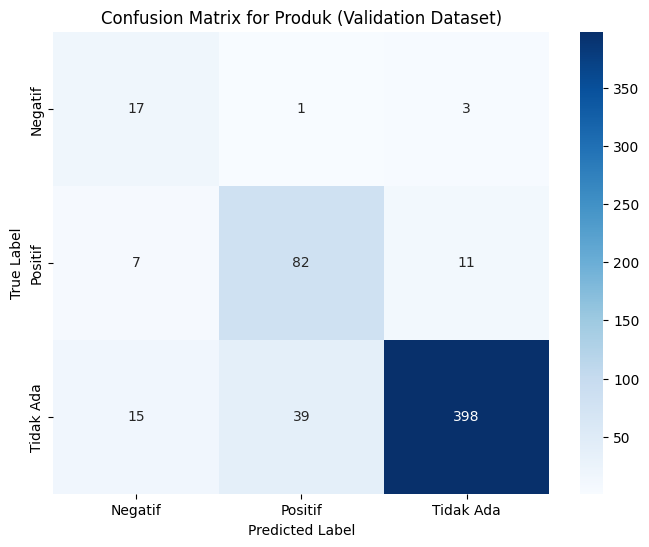

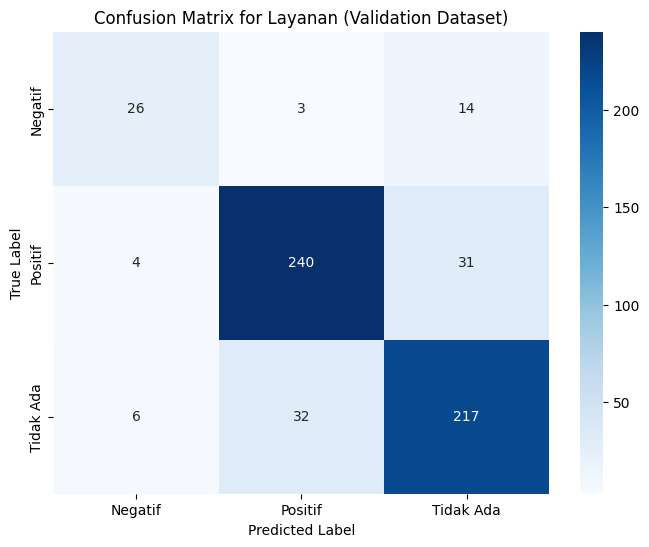

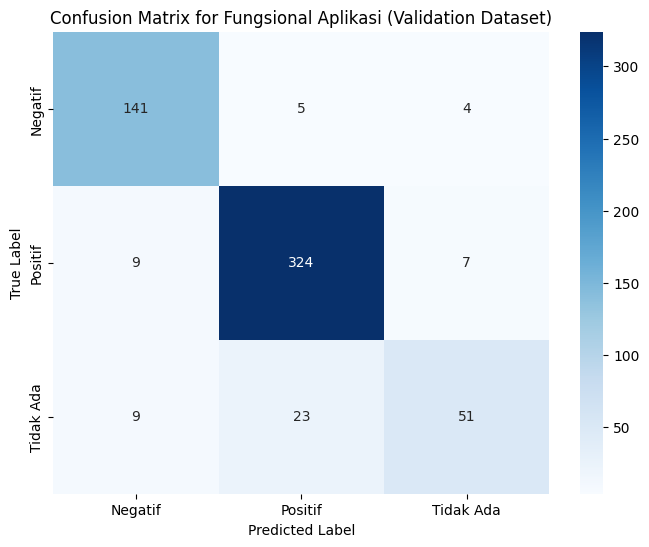

In [ ]:
import seaborn as sns # Import the seaborn library with the alias 'sns'
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Assuming sentiment_labels are defined (e.g., ['Positif', 'Negatif', 'Tidak Ada'])
sentiment_labels = ['Negatif', 'Positif', 'Tidak Ada'] # Define the sentiment labels


# Confusion Matrix for Produk (Validation Dataset)
cm_val_prod = confusion_matrix(y_val_produk, y_pred_val_produk)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_prod, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix for Produk (Validation Dataset)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Layanan (Validation Dataset)
cm_val_lay = confusion_matrix(y_val_layanan, y_pred_val_layanan)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_lay, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix for Layanan (Validation Dataset)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Fungsional Aplikasi (Validation Dataset)
cm_val_fung = confusion_matrix(y_val_fungsional, y_pred_val_fungsional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_fung, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix for Fungsional Aplikasi (Validation Dataset)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

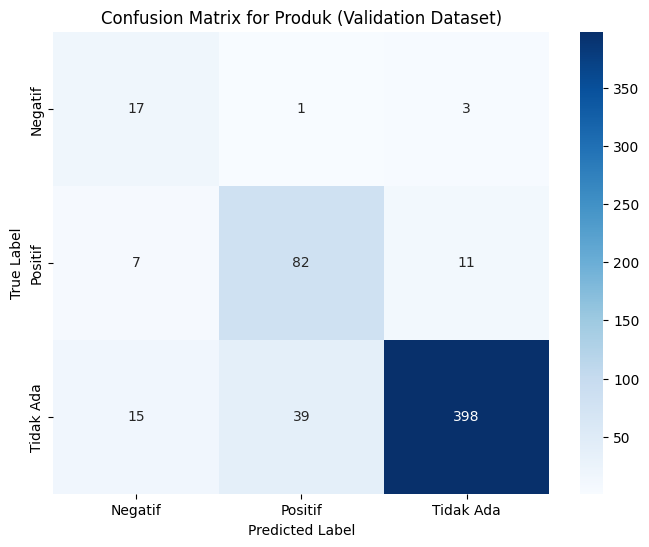

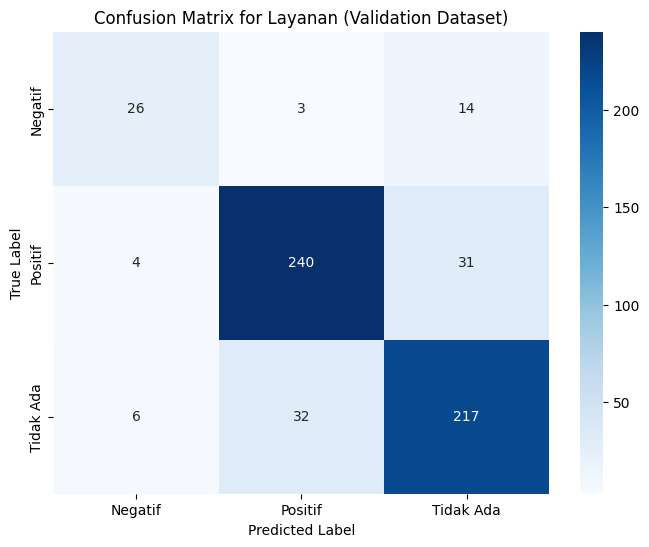

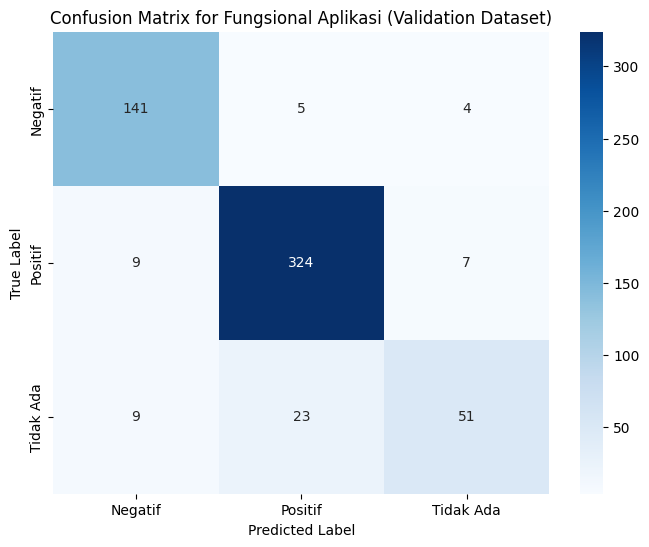

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


sentiment_labels = ['Negatif', 'Positif', 'Tidak Ada'] # Define the sentiment labels

def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
  plt.title(title)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Confusion Matrix for Produk (Validation Dataset)
plot_confusion_matrix(y_val_produk, y_pred_val_produk, 'Confusion Matrix for Produk (Validation Dataset)')

# Confusion Matrix for Layanan (Validation Dataset)
plot_confusion_matrix(y_val_layanan, y_pred_val_layanan, 'Confusion Matrix for Layanan (Validation Dataset)')

# Confusion Matrix for Fungsional Aplikasi (Validation Dataset)
plot_confusion_matrix(y_val_fungsional, y_pred_val_fungsional, 'Confusion Matrix for Fungsional Aplikasi (Validation Dataset)')


# **DEPLOYMENT**

**Membuat Pickle Data Preprocessing**

In [ ]:
!pip install Sastrawi
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import pandas as pd
import re
import nltk
import gdown
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('stopwords')

# 1. Case Folding
class CaseFoldingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text.lower() for text in X]

# 2. Data Cleaning
class DataCleaningTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.clean_text(text) for text in X]

    def clean_text(self, text):
        text = self.remove_emojis(text)
        text = self.remove_punctuation(text)
        text = self.remove_brackets_and_numbers(text)
        text = self.remove_double_quotes(text)
        text = self.remove_special_characters(text)
        return text

    def remove_emojis(self, text):
        emoji_pattern = re.compile(
            u"["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002600-\U000026FF"
            u"\U00002300-\U000023FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA70-\U0001FAFF"
            u"\U00002700-\U000027BF"
            u"\U000024C2-\U0001F251"
            u"\U0001F000-\U0001F02F"
            u"\U0001F0A0-\U0001F0FF"
            u"\U0001F300-\U0001F5FA"
            u"\U0001F680-\U0001F6C5"
            u"\U0001F700-\U0001F773"
            u"\u2764"
            u"\u2708-\u270F"
            u"\U0001F48C-\U0001F48F"
            u"\U0001F926-\U0001F937"
            u"\U00010000-\U0010FFFF"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"
            u"\u3030"
            "]", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_punctuation(self, text):
        return re.sub(r'[.,;!?]', '', text)

    def remove_brackets_and_numbers(self, text):
        return re.sub(r'[\(\)\[\]\{\}0-9]', '', text)

    def remove_double_quotes(self, text):
        return text.replace('"', '')

    def remove_special_characters(self, text):
        return re.sub(r"[-'²*#:+/“”–_…½~¡¡¡⁰⁰`><…‘’&]", '', text)

# 3. Normalization
class NormalizationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, file_id='1r-uJx9ZosLLj5EL4gspr53yUai-jpKJ0'):
        download_url = f'https://drive.google.com/uc?id={file_id}'
        output = 'Kamus Normalisasi.csv'
        gdown.download(download_url, output, quiet=False)
        self.normalizad_word = pd.read_csv(output)
        self.normalizad_word_dict = {row[0]: row[1] for _, row in self.normalizad_word.iterrows()}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.normalized_term(text) for text in X]

    def normalized_term(self, text):
        words = text.split()
        normalized_words = [self.normalizad_word_dict.get(word, word) for word in words]
        return " ".join(normalized_words)

# 4. Stopword Removal
class StopwordRemovalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.remove_stopwords(text) for text in X]

    def remove_stopwords(self, text):
        stopword_factory = StopWordRemoverFactory()
        sastrawi_stopwords = set(stopword_factory.get_stop_words())
        nltk_stopwords = set(nltk.corpus.stopwords.words('indonesian'))
        custom_stopwords = {'midi', 'kriing', 'midi kriing', 'untuk', 'pakai', 'belanja', 'beli', 'dapat', 'buat', 'tapi', 'jadi'}
        all_stopwords = sastrawi_stopwords | nltk_stopwords | custom_stopwords
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in all_stopwords]
        return " ".join(filtered_words)

# 5. Stemming
class StemmingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.stem_words(text) for text in X]

    def stem_words(self, text):
        stemmer = StemmerFactory().create_stemmer()
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        return " ".join(stemmed_words)

# Gabungan Preprocessing
pipeline_preprocessing = Pipeline([
    ('case_folding', CaseFoldingTransformer()),
    ('cleaning', DataCleaningTransformer()),
    ('normalization', NormalizationTransformer()),
    ('stopword_removal', StopwordRemovalTransformer()),
    ('stemming', StemmingTransformer())
])

joblib.dump(pipeline_preprocessing, 'preprocessing_pipeline.pkl')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Downloading...
From: https://drive.google.com/uc?id=1r-uJx9ZosLLj5EL4gspr53yUai-jpKJ0
To: /content/Kamus Normalisasi.csv
100%|██████████| 24.9k/24.9k [00:00<00:00, 30.0MB/s]
<ipython-input-1-b268cb34f46f>:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.normalizad_word_dict = {row[0]: row[1] for _, row in self.normalizad_word.iterrows()}


['preprocessing_pipeline.pkl']

**Pickle Model Aspek Produk**


In [ ]:
# === Instalasi & Import ===
!pip install gdown
!pip install imbalanced-learn
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

# === NLTK Resource Setup ===
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# === Download Dataset dari Google Drive ===
file_id = '1VlD4HgClOveuwYti5Dprg50DzbmVZU4C'  # Ganti kalau ID file berubah
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'Dataset_Model_Fix.csv'
gdown.download(download_url, output, quiet=False)

# === Baca Dataset ===
df = pd.read_csv('Dataset_Model_Fix.csv', encoding='latin1')

# === Ambil Kolom untuk Aspek Produk ===
X_produk = df['Stemming Text']       # Fitur teks yang udah distem
y_produk = df['Produk']              # Label sentimen untuk aspek produk

# === Preprocessing ===
X_produk_clean = pipeline_preprocessing.fit_transform(X_produk)

# === TF-IDF Vectorization ===
tfidf_produk = TfidfVectorizer()
X_produk_tfidf = tfidf_produk.fit_transform(X_produk_clean)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_produk_tfidf, y_produk, test_size=0.25, random_state=42)

# === SMOTE untuk mengatasi imbalance ===
smote = SMOTE(random_state=42)

# === Model Aspek Produk: SVM Linear C=1 ===
model_produk = SVC(kernel='linear', C=1, probability=True)

# === Pipeline (SMOTE + Model) ===
pipeline_produk = ImbPipeline([
    ('smote', smote),
    ('model', model_produk)
])

# === Training Model ===
pipeline_produk.fit(X_train, y_train)

# === Simpan Model & Vectorizer ===
joblib.dump(pipeline_produk, 'model_aspek_produk.pkl')
joblib.dump(tfidf_produk, 'tfidf_aspek_produk.pkl')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
Downloading...
From: https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C
To: /content/Dataset_Model_Fix.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 42.2MB/s]


['tfidf_aspek_produk.pkl']

**Pickle Model Aspek Layanan**


In [ ]:
# === Instalasi & Import ===
!pip install gdown
!pip install imbalanced-learn
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

# === NLTK Resource Setup ===
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# === Download Dataset dari Google Drive ===
file_id = '1VlD4HgClOveuwYti5Dprg50DzbmVZU4C'  # Ganti kalau ID file berubah
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'Dataset_Model_Fix.csv'
gdown.download(download_url, output, quiet=False)

# === Baca Dataset ===
df = pd.read_csv('Dataset_Model_Fix.csv', encoding='latin1')

# === Ambil Kolom untuk Aspek Layanan ===
X_layanan = df['Stemming Text']
y_layanan = df['Layanan']

# === Preprocessing ===
X_layanan_clean = pipeline_preprocessing.fit_transform(X_layanan)

# === TF-IDF Vectorization ===
tfidf_layanan = TfidfVectorizer()
X_layanan_tfidf = tfidf_layanan.fit_transform(X_layanan_clean)

# === Train-Test Split ===
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_layanan_tfidf, y_layanan, test_size=0.25, random_state=42)

# === Model Aspek Layanan: SVM RBF, C=10 (TANPA SMOTE) ===
model_layanan = SVC(kernel='rbf', C=10, probability=True)

# === Training Model ===
model_layanan.fit(X_train_l, y_train_l)

# === Simpan Model & Vectorizer ===
joblib.dump(model_layanan, 'model_aspek_layanan.pkl')
joblib.dump(tfidf_layanan, 'tfidf_aspek_layanan.pkl')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Downloading...
From: https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C
To: /content/Dataset_Model_Fix.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 77.7MB/s]


['tfidf_aspek_layanan.pkl']

**Pickle Model Aspek Fungsional Aplikasi**

In [ ]:
# === Instalasi & Import ===
!pip install gdown
!pip install imbalanced-learn
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

# === NLTK Resource Setup ===
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# === Download Dataset dari Google Drive ===
file_id = '1VlD4HgClOveuwYti5Dprg50DzbmVZU4C'  # Ganti kalau ID file berubah
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'Dataset_Model_Fix.csv'
gdown.download(download_url, output, quiet=False)

# === Baca Dataset ===
df = pd.read_csv('Dataset_Model_Fix.csv', encoding='latin1')

# === Ambil Kolom untuk Aspek Fungsional Aplikasi ===
X_fungsi = df['Stemming Text']
y_fungsi = df['Fungsional Aplikasi']

# === Preprocessing ===
X_fungsi_clean = pipeline_preprocessing.fit_transform(X_fungsi)

# === TF-IDF Vectorization ===
tfidf_fungsi = TfidfVectorizer()
X_fungsi_tfidf = tfidf_fungsi.fit_transform(X_fungsi_clean)

# === Train-Test Split ===
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fungsi_tfidf, y_fungsi, test_size=0.25, random_state=42)

# === Model Aspek Fungsional Aplikasi: SVM Linear, C=1 (TANPA SMOTE) ===
model_fungsi = SVC(kernel='linear', C=1, probability=True)

# === Training Model ===
model_fungsi.fit(X_train_f, y_train_f)

# === Simpan Model & Vectorizer ===
joblib.dump(model_fungsi, 'model_aspek_fungsional.pkl')
joblib.dump(tfidf_fungsi, 'tfidf_aspek_fungsional.pkl')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Downloading...
From: https://drive.google.com/uc?id=1VlD4HgClOveuwYti5Dprg50DzbmVZU4C
To: /content/Dataset_Model_Fix.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 30.5MB/s]


['tfidf_aspek_fungsional.pkl']

In [ ]:
import joblib

# === Load model & vectorizer aspek produk ===
model_produk = joblib.load('model_aspek_produk.pkl')
tfidf_produk = joblib.load('tfidf_aspek_produk.pkl')

# Load dan prediksi untuk aspek layanan
model_layanan = joblib.load('model_aspek_layanan.pkl')
tfidf_layanan = joblib.load('tfidf_aspek_layanan.pkl')


# Load dan prediksi untuk aspek fungsional
model_fungsi = joblib.load('model_aspek_fungsional.pkl')
tfidf_fungsi = joblib.load('tfidf_aspek_fungsional.pkl')





# **Perbedaan Resampling dan Tanpa Resampling**

In [ ]:
!pip install gdown
import gdown
# File ID dari Google Drive
file_id = '1e2SEfy91xlvHg0PTPOWoGORx_MM8tMX1'

# URL download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'Ulasan Pelabelan Final.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e2SEfy91xlvHg0PTPOWoGORx_MM8tMX1
To: /content/Ulasan Pelabelan Final.csv
100%|██████████| 620k/620k [00:00<00:00, 84.3MB/s]


'Ulasan Pelabelan Final.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('Ulasan Pelabelan Final.csv')
print("Jumlah Ulasan:", len(df), "Data")
df.head()

Jumlah Ulasan: 5724 Data


,Rating,Review Text,Produk,Layanan,Fungsional Aplikasi
0,1,penipuan !!! transaksi dibatalkan tapi uang ti...,Tidak Ada,Negatif,Negatif
1,5,mantap,Positif,Positif,Positif
2,3,kalau dah punya akun alfagift gak bisa download,Tidak Ada,Tidak Ada,Negatif
3,5,bingung,Tidak Ada,Tidak Ada,Negatif
4,5,"bagus aplikasinya, tapi sayang sekali di kabup...",Tidak Ada,Negatif,Positif


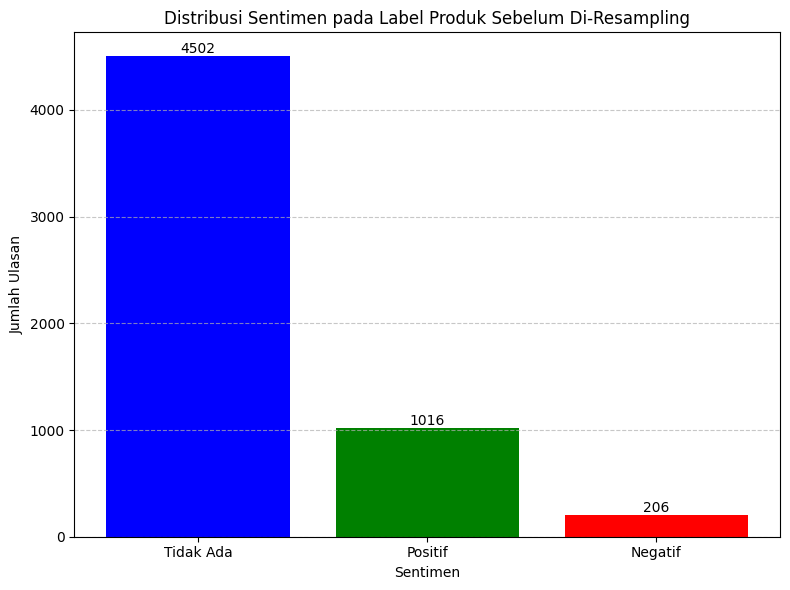

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv('Ulasan Pelabelan Final.csv')

# Hitung jumlah data untuk setiap sentimen pada kolom 'Produk'
sentiment_counts_produk = df['Produk'].value_counts()

# Atur urutan label sentimen: Netral, Positif, Negatif
ordered_sentiments = ['Tidak Ada', 'Positif', 'Negatif']
sentiment_counts_produk = sentiment_counts_produk.reindex(ordered_sentiments)

# Buat grafik batang
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts_produk.index, sentiment_counts_produk.values, color=['blue', 'green', 'red'])

# Tambahkan judul dan label sumbu
plt.title('Distribusi Sentimen pada Label Produk Sebelum Di-Resampling')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label jumlah di atas masing-masing batang
for bar in bars:
    yval = bar.get_height()
    if not pd.isna(yval):  # Pastikan nilai tidak NaN
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


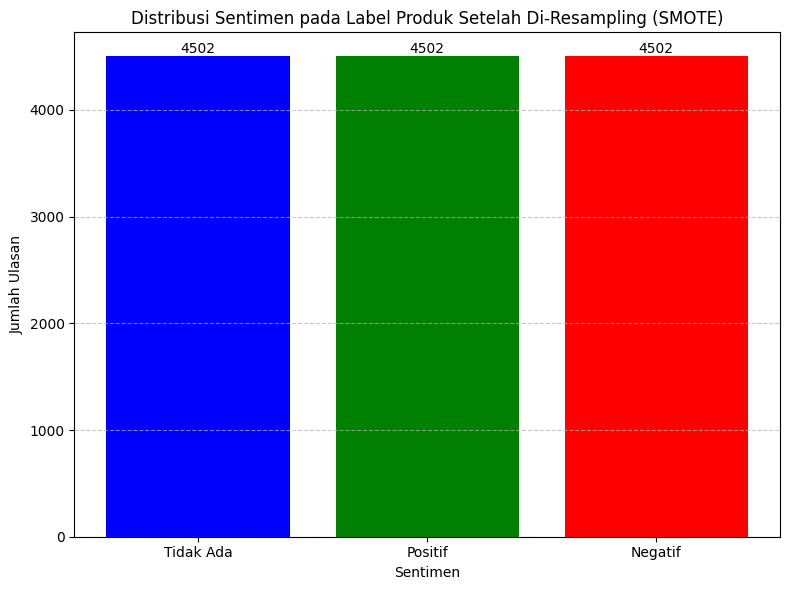

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE # Make sure imblearn is installed

# Make sure imblearn is installed
!pip install imbalanced-learn

# Baca dataset yang sudah distemming (Output_Stemming.csv)
# Load the dataset that includes the 'Stemming Text' column
df_stemmed = pd.read_csv('Output_Stemming.csv', encoding='latin1')

# Ambil data 'Produk' untuk resampling
X_prod = df_stemmed['Stemming Text'] # Access the 'Stemming Text' column from the correct DataFrame
y_prod = df_stemmed['Produk']

# Transformasi data menggunakan TF-IDF
vectorizer_prod = TfidfVectorizer()
X_prod_vec = vectorizer_prod.fit_transform(X_prod.astype(str)) # Ensure text data is string type

# Terapkan SMOTE untuk oversampling data Produk
smote_prod = SMOTE(random_state=42)
X_prod_resampled, y_prod_resampled = smote_prod.fit_resample(X_prod_vec, y_prod)

# Hitung jumlah data setelah resampling
sentiment_counts_prod_resampled = pd.Series(y_prod_resampled).value_counts()

# Atur urutan label sentimen: Tidak Ada, Positif, Negatif
ordered_sentiments = ['Tidak Ada', 'Positif', 'Negatif']
sentiment_counts_prod_resampled = sentiment_counts_prod_resampled.reindex(ordered_sentiments)

# Buat grafik batang untuk data setelah resampling
plt.figure(figsize=(8, 6))
bars_resampled = plt.bar(sentiment_counts_prod_resampled.index, sentiment_counts_prod_resampled.values, color=['blue', 'green', 'red'])

# Tambahkan judul dan label sumbu
plt.title('Distribusi Sentimen pada Label Produk Setelah Di-Resampling (SMOTE)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label jumlah di atas masing-masing batang
for bar in bars_resampled:
    yval = bar.get_height()
    if not pd.isna(yval):  # Pastikan nilai tidak NaN
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

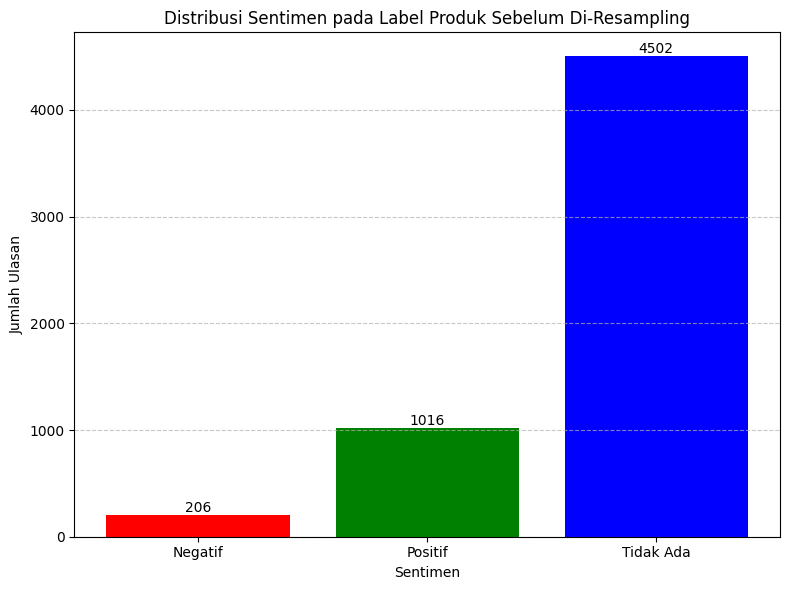

In [ ]:
# prompt: grafik distribusi data prouk

# Count sentiments for Produk (menggunakan urutan label: Negatif, Positif, Tidak Ada)
sentiment_counts_produk = df['Produk'].value_counts().reindex(['Negatif', 'Positif', 'Tidak Ada'])

# Buat grafik batang
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts_produk.index, sentiment_counts_produk.values, color=['red', 'green', 'blue'])

# Tambahkan judul dan label sumbu
plt.title('Distribusi Sentimen pada Label Produk Sebelum Di-Resampling')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label jumlah di atas masing-masing batang
for bar in bars:
    yval = bar.get_height()
    if not pd.isna(yval):  # Pastikan nilai tidak NaN
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
